<a href="https://colab.research.google.com/github/StickMonkey615/JHCSMod4/blob/main/ANN%20v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4 Guidance

This notebook is a template for module 4b and 4c, which will be tested in Google Colab, your code needs to run there.
The structure has been provided to improve consistency and make it easier for markers to understand your code but still give students the flexibility to be creative.  You need to populate the required functions to solve this problem.  All dependencies should be documented in the next cell.

You can:
    add further cells or text blocks to extend or further explain your solution
    add further functions

Dont:
    rename functions
   

In [1]:
# Fixed dependencies - do not remove or change.
import pytest
import pandas as pd
import numpy as np
from google.colab import drive
# drive.mount('/content/gdrive/')
# Import your dependencies
!pip install --upgrade xlrd > 1.2.0
import xlrd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras

In [2]:
# Import data

def import_local_data(file_path):
    """This function needs to import the data file into collab and return a pandas dataframe
    """
    raw_df = pd.read_excel(file_path)
    return raw_df

In [3]:
local_file_path = "breast-cancer.xls"

In [4]:
# Dont change
raw_data = import_local_data(local_file_path)

### Conduct exploratory data analysis and explain your key findings - Examine the data, explain its key features and what they look like.  Highlight any fields that are anomalous.

In [5]:
# Look at the different dataframe column headings
print(raw_data.columns)

Index(['age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'deg-malig',
       'breast', 'breast-quad', 'irradiat', 'Class'],
      dtype='object')


In [6]:
# Determine data types for each column
for i in range(0, len(raw_data.columns)):
    print(type(raw_data.values[1][i]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'int'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [7]:
#Look at the range of values for each field
from collections import Counter
rng_vals=[]
for i in range(0,len(raw_data.columns)):
    rng_vals.append(Counter(raw_data.iloc[:,i].values))
    print(f"{raw_data.columns[i]}: {rng_vals[i]}")
del rng_vals, i

age: Counter({'50-59': 96, '40-49': 90, '60-69': 57, '30-39': 36, '70-79': 6, '20-29': 1})
menopause: Counter({'premeno': 150, 'ge40': 129, 'lt40': 7})
tumor-size: Counter({'30-34': 60, '25-29': 54, '20-24': 50, '15-19': 30, datetime.datetime(2014, 10, 1, 0, 0): 28, '40-44': 22, '35-39': 19, '0-4': 8, '50-54': 8, datetime.datetime(2019, 9, 5, 0, 0): 4, '45-49': 3})
inv-nodes: Counter({'0-2': 213, datetime.datetime(2019, 5, 3, 0, 0): 36, datetime.datetime(2019, 8, 6, 0, 0): 17, datetime.datetime(2019, 11, 9, 0, 0): 10, '15-17': 6, datetime.datetime(2014, 12, 1, 0, 0): 3, '24-26': 1})
node-caps: Counter({'no': 222, 'yes': 56, '?': 8})
deg-malig: Counter({2: 130, 3: 85, 1: 71})
breast: Counter({'left': 152, 'right': 134})
breast-quad: Counter({'left_low': 110, 'left_up': 97, 'right_up': 33, 'right_low': 24, 'central': 21, '?': 1})
irradiat: Counter({'no': 218, 'yes': 68})
Class: Counter({'no-recurrence-events': 201, 'recurrence-events': 85})


**All fields look to contain data that is catagorical in nature.**

**Some contain data that appears erroneous:**
 
*   **'tumor-size' and 'inv-nodes' appear to contain some data in a datetime format and some in string.**
*   **'node-caps' and 'breast-quad' contain Question Marks.**

**Need a way to address these erroneous data inputs.**



In [8]:
# Look in more detail at the columns with datetime data.
print(raw_data.iloc[:, 2].values)

['15-19' '15-19' '35-39' '35-39' '30-34' '25-29' '40-44'
 datetime.datetime(2014, 10, 1, 0, 0) '0-4' '40-44' '25-29' '15-19'
 '30-34' '25-29' '25-29' '20-24' datetime.datetime(2014, 10, 1, 0, 0)
 '15-19' '40-44' '20-24' '20-24' '40-44' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) datetime.datetime(2014, 10, 1, 0, 0)
 '30-34' '15-19' '30-34' '25-29' '25-29' '20-24' '30-34' '15-19'
 datetime.datetime(2014, 10, 1, 0, 0) '45-49' '20-24'
 datetime.datetime(2014, 10, 1, 0, 0) '35-39' '35-39' '25-29' '20-24'
 '15-19' '30-34' datetime.datetime(2014, 10, 1, 0, 0) '35-39' '50-54'
 '40-44' '15-19' '30-34' '0-4' '40-44' '25-29' '25-29' '20-24' '35-39'
 '50-54' '0-4' '40-44' '30-34' '20-24' '30-34' '20-24' '15-19' '25-29'
 '15-19' '50-54' datetime.datetime(2014, 10, 1, 0, 0) '25-29' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '30-34' '25-29'
 datetime.datetime(2014, 10, 1, 0, 0) '15-19' '25-29' '25-29' '30-34'
 '15-19' '25-29' '30-34' '15-19'

In [9]:
# Look at output data
raw_data['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

Only 2 possible outputs, thus needs converting to binary format for use in classifier models.

In [10]:
# Check output balance
out = raw_data.iloc[:, -1].values
no_rows = len(raw_data)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
code_rows = le.fit_transform(out)
print("True outputs: {:.2f} %".format(sum(code_rows)/len(raw_data)*100))
pos = sum(code_rows)
neg = len(raw_data)-sum(code_rows)
del out, no_rows, le, code_rows

True outputs: 29.72 %


Clear imbalance between output data. Some degree of bias/weighting/sampling will be required to ensure that results accurately predict outcomes for both True and False outcomes.

In [11]:
# Explain your key findings

**Data set is made up of 9 independent variables all of which appear catagorical in nature. Although stored as an integer, 'deg-malig' can be viewed as  catagorical data as it can only contain 3 discrete values.**

**The inclusion of datetime data entries in both the 'tumor-size' and 'inv-nodes' fields appears to be caused by a formatting entry within Excel. For example, '10-14' being input erroneously as 10/14 thus Excel has interpreted (and converted) it to the datetime field 01/10/2014. A function will need to be written within the model to convert these back to correct format.**

**How to deal with '?' entries in fields that are otherwise boolean poses an interesting dilemma. If these are infact meant to signify that the presence is unknown because no diagnostic work has been conducted, then this woiuld signify a valid dat entry. If it is however just an incomplete data entry then there is a risk its inclusion could skew the model results. Without knowing which it seems wisest to remove this data from the dataset. Removal of the entire field could well deprive the model of important information, thus just removing these specific entries (rows) appears the most sensible option, particularly noting that there are relatively few occurences.**

**Data set is imbalanced, with dependent variable outputs only True in 30% of instances. The model applied will require this imbalance to be taken into account so as not to sacrifice results predicting this smaller class (surely the aim of cancer diagnosis) so as to achieve a high accuracy figure.**

**Output variable will need converting into binary output for use with a binary classification model.**

Create any data pre-processing that you will conduct on seen and unseen data.  Regardless of the model you use, this dataframe must contain only numeric features and have a strategy for any expected missing values. Any objects can that are needed to handle the test data that are dependent on the training data can be stored in the model class.  You are recommended to use sklearn Pipelines or similar functionality to ensure reproducibility.

In [12]:
# Correct date types in 'tumor-size' and 'inv-nodes' variables
for i in range(0, len(raw_data)):
    if type(raw_data['tumor-size'][i]) is not str:
        if raw_data['tumor-size'][i].day == 1:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].month) +'-' + str(raw_data['tumor-size'][i].year-2000)
        else:
            raw_data['tumor-size'][i] = str(raw_data['tumor-size'][i].day) + '-' + str(raw_data['tumor-size'][i].month)
    if type(raw_data['inv-nodes'][i]) is not str:
        if raw_data['inv-nodes'][i].day == 1:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].month) + '-' + str(raw_data['inv-nodes'][i].year-2000)
        else:
            raw_data['inv-nodes'][i] = str(raw_data['inv-nodes'][i].day) + '-' + str(raw_data['inv-nodes'][i].month)        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: Settin

In [13]:
# Remove all rows containing ? data
indx = raw_data[raw_data.isin(['?'])].stack(dropna=True).unstack().index
print(f"indx: {indx}")
raw_data = raw_data.drop(index=indx)

indx: Int64Index([20, 31, 50, 54, 71, 92, 149, 240, 264], dtype='int64')


In [14]:
# Split your data so that you can test the effectiveness of your model
# Split the data into a Training set and a Test set
dfs = np.split(raw_data, [len(raw_data.columns)-1], axis=1)
X = dfs[0]
y = dfs[1]

# Handle categorical values and drop dummy variable
# Remove non-categorical data
dm = X.pop('deg-malig')
# Encode the catagorical data (dummy variables)
proc_X = pd.get_dummies(data=X, prefix_sep='_', drop_first=True)
# Add back in non-categorical data
proc_X.insert(0, 'deg-malig', dm)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(proc_X, y, test_size = 0.25, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [15]:
# Populate preprocess_training_data and preprocess_test_data to preprocess data.
# You must process test and train separately so your model does not accidently gain information that a model wouldnt have in reality and therefore get better predictions

In [16]:
class Module4_Model:
    
    def __init__(self):
        self.model = None
        self.metrics = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='accuracy'),
            keras.metrics.Recall(name='recall'),
            keras.metrics.Precision(name='precision'),
        ]
        self.EPOCHS = 500
        self.BATCH = 100
        self.THR = 0.3
        self.stop_crit = keras.callbacks.EarlyStopping(
            monitor='val_prc',
            verbose=1,
            patience=10,
            mode='max',
            restore_best_weights=True)

    def preprocess_training_data(self, training_df):
        """
        This function should process the training data and store any features
        required in the class
        """         
        # Apply feature scaling
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        processed_df = sc.fit_transform(training_df)
        return processed_df, sc

    def preprocess_test_data(self, test_df):
        """
        This function should process the test data and store any features
        required in the class
        """
        # Apply feature scaling
        processed_df = self.scalar.transform(test_df)
        return processed_df

    def make_model(self,X_train_processed,output_bias=None):
        if output_bias is not None:
            output_bias = keras.initializers.Constant(output_bias)
        self.model = keras.Sequential([
            keras.layers.Dense(16,
                              activation='relu',
                              input_shape=(X_train_processed.shape[-1],)),
            keras.layers.Dropout(0.5),
            keras.layers.Dense(1,
                               activation='sigmoid',
                               bias_initializer=output_bias)
            ])
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                           loss=keras.losses.BinaryCrossentropy(),
                           metrics=self.metrics)


In [17]:
# Dont change
my_model = Module4_Model()

In [18]:
# Dont change
x_train_processed, my_model.scalar = my_model.preprocess_training_data(X_train)
x_val_processed = my_model.preprocess_test_data(X_val)

In [19]:
# Encode the output data
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = pd.DataFrame(lb.fit_transform(y_train))
y_val = pd.DataFrame(lb.transform(y_val))
y_test = pd.DataFrame(lb.transform(y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
# Create a model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,ELU,PReLU,Dropout

#classifier = Sequential()
#first hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu',input_dim=31))
#second hidden layer
#classifier.add(Dense(units=9,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
#classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [21]:
#classifier.summary()

In [22]:
#compiling the ANN
#classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
my_model.make_model(x_train_processed,np.log([pos/neg]))
my_model.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                512       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Dont change
x_test_processed = my_model.preprocess_test_data(X_test)

In [24]:
# Train your model
# Fitting the ANN to the training set
my_model.model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val))

Epoch 1/500
1/2 [==============>...............] - ETA: 1s - loss: 0.8294 - tp: 7.0000 - fp: 25.0000 - tn: 47.0000 - fn: 21.0000 - accuracy: 0.5400 - recall: 0.2500 - precision: 0.2188

2/2 [==============================] - 3s 798ms/step - loss: 0.8748 - tp: 13.0000 - fp: 42.0000 - tn: 76.0000 - fn: 34.0000 - accuracy: 0.5394 - recall: 0.2766 - precision: 0.2364 - val_loss: 0.8531 - val_tp: 2.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 13.0000 - val_accuracy: 0.5238 - val_recall: 0.1333 - val_precision: 0.2222
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.9019 - tp: 10.0000 - fp: 22.0000 - tn: 46.0000 - fn: 22.0000 - accuracy: 0.5600 - recall: 0.3125 - precision: 0.3125

2/2 [==============================] - 0s 34ms/step - loss: 0.8777 - tp: 14.0000 - fp: 40.0000 - tn: 78.0000 - fn: 33.0000 - accuracy: 0.5576 - recall: 0.2979 - precision: 0.2593 - val_loss: 0.8487 - val_tp: 2.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 13.0000 - val_accuracy: 0.5238 - val_recall: 0.1333 - val_precision: 0.2222
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.9459 - tp: 2.0000 - fp: 23.0000 - tn: 48.0000 - fn: 27.0000 - accuracy: 0.5000 - recall: 0.0690 - precision: 0.0800

2/2 [==============================] - 0s 43ms/step - loss: 0.9357 - tp: 5.0000 - fp: 39.0000 - tn: 79.0000 - fn: 42.0000 - accuracy: 0.5091 - recall: 0.1064 - precision: 0.1136 - val_loss: 0.8444 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 14.0000 - val_accuracy: 0.5238 - val_recall: 0.0667 - val_precision: 0.1429
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8310 - tp: 7.0000 - fp: 25.0000 - tn: 50.0000 - fn: 18.0000 - accuracy: 0.5700 - recall: 0.2800 - precision: 0.2188

2/2 [==============================] - 0s 34ms/step - loss: 0.8366 - tp: 13.0000 - fp: 36.0000 - tn: 82.0000 - fn: 34.0000 - accuracy: 0.5758 - recall: 0.2766 - precision: 0.2653 - val_loss: 0.8399 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 14.0000 - val_accuracy: 0.5238 - val_recall: 0.0667 - val_precision: 0.1429
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 1.0038 - tp: 3.0000 - fp: 29.0000 - tn: 42.0000 - fn: 26.0000 - accuracy: 0.4500 - recall: 0.1034 - precision: 0.0938

2/2 [==============================] - 0s 33ms/step - loss: 0.9013 - tp: 9.0000 - fp: 40.0000 - tn: 78.0000 - fn: 38.0000 - accuracy: 0.5273 - recall: 0.1915 - precision: 0.1837 - val_loss: 0.8353 - val_tp: 1.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 14.0000 - val_accuracy: 0.5238 - val_recall: 0.0667 - val_precision: 0.1429
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8963 - tp: 11.0000 - fp: 20.0000 - tn: 47.0000 - fn: 22.0000 - accuracy: 0.5800 - recall: 0.3333 - precision: 0.3548

2/2 [==============================] - 0s 36ms/step - loss: 0.9304 - tp: 14.0000 - fp: 44.0000 - tn: 74.0000 - fn: 33.0000 - accuracy: 0.5333 - recall: 0.2979 - precision: 0.2414 - val_loss: 0.8310 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8579 - tp: 9.0000 - fp: 25.0000 - tn: 47.0000 - fn: 19.0000 - accuracy: 0.5600 - recall: 0.3214 - precision: 0.2647

2/2 [==============================] - 0s 31ms/step - loss: 0.7983 - tp: 15.0000 - fp: 37.0000 - tn: 81.0000 - fn: 32.0000 - accuracy: 0.5818 - recall: 0.3191 - precision: 0.2885 - val_loss: 0.8269 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.9991 - tp: 7.0000 - fp: 24.0000 - tn: 46.0000 - fn: 23.0000 - accuracy: 0.5300 - recall: 0.2333 - precision: 0.2258

2/2 [==============================] - 0s 34ms/step - loss: 0.8836 - tp: 14.0000 - fp: 34.0000 - tn: 84.0000 - fn: 33.0000 - accuracy: 0.5939 - recall: 0.2979 - precision: 0.2917 - val_loss: 0.8230 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7489 - tp: 8.0000 - fp: 18.0000 - tn: 52.0000 - fn: 22.0000 - accuracy: 0.6000 - recall: 0.2667 - precision: 0.3077

2/2 [==============================] - 0s 40ms/step - loss: 0.7499 - tp: 12.0000 - fp: 32.0000 - tn: 86.0000 - fn: 35.0000 - accuracy: 0.5939 - recall: 0.2553 - precision: 0.2727 - val_loss: 0.8192 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8481 - tp: 6.0000 - fp: 21.0000 - tn: 51.0000 - fn: 22.0000 - accuracy: 0.5700 - recall: 0.2143 - precision: 0.2222

2/2 [==============================] - 0s 34ms/step - loss: 0.8678 - tp: 11.0000 - fp: 34.0000 - tn: 84.0000 - fn: 36.0000 - accuracy: 0.5758 - recall: 0.2340 - precision: 0.2444 - val_loss: 0.8153 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8221 - tp: 7.0000 - fp: 19.0000 - tn: 48.0000 - fn: 26.0000 - accuracy: 0.5500 - recall: 0.2121 - precision: 0.2692

2/2 [==============================] - 0s 43ms/step - loss: 0.8207 - tp: 8.0000 - fp: 34.0000 - tn: 84.0000 - fn: 39.0000 - accuracy: 0.5576 - recall: 0.1702 - precision: 0.1905 - val_loss: 0.8115 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7590 - tp: 6.0000 - fp: 20.0000 - tn: 52.0000 - fn: 22.0000 - accuracy: 0.5800 - recall: 0.2143 - precision: 0.2308

2/2 [==============================] - 0s 36ms/step - loss: 0.7935 - tp: 13.0000 - fp: 34.0000 - tn: 84.0000 - fn: 34.0000 - accuracy: 0.5879 - recall: 0.2766 - precision: 0.2766 - val_loss: 0.8078 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8596 - tp: 2.0000 - fp: 26.0000 - tn: 49.0000 - fn: 23.0000 - accuracy: 0.5100 - recall: 0.0800 - precision: 0.0714

2/2 [==============================] - 0s 32ms/step - loss: 0.8410 - tp: 8.0000 - fp: 36.0000 - tn: 82.0000 - fn: 39.0000 - accuracy: 0.5455 - recall: 0.1702 - precision: 0.1818 - val_loss: 0.8042 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8238 - tp: 7.0000 - fp: 23.0000 - tn: 49.0000 - fn: 21.0000 - accuracy: 0.5600 - recall: 0.2500 - precision: 0.2333

2/2 [==============================] - 0s 33ms/step - loss: 0.8202 - tp: 9.0000 - fp: 29.0000 - tn: 89.0000 - fn: 38.0000 - accuracy: 0.5939 - recall: 0.1915 - precision: 0.2368 - val_loss: 0.8007 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7824 - tp: 4.0000 - fp: 20.0000 - tn: 50.0000 - fn: 26.0000 - accuracy: 0.5400 - recall: 0.1333 - precision: 0.1667

2/2 [==============================] - 0s 56ms/step - loss: 0.7053 - tp: 8.0000 - fp: 26.0000 - tn: 92.0000 - fn: 39.0000 - accuracy: 0.6061 - recall: 0.1702 - precision: 0.2353 - val_loss: 0.7973 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 14.0000 - val_accuracy: 0.5476 - val_recall: 0.0667 - val_precision: 0.1667
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7790 - tp: 4.0000 - fp: 19.0000 - tn: 53.0000 - fn: 24.0000 - accuracy: 0.5700 - recall: 0.1429 - precision: 0.1739

2/2 [==============================] - 0s 33ms/step - loss: 0.7691 - tp: 6.0000 - fp: 31.0000 - tn: 87.0000 - fn: 41.0000 - accuracy: 0.5636 - recall: 0.1277 - precision: 0.1622 - val_loss: 0.7940 - val_tp: 1.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 14.0000 - val_accuracy: 0.5714 - val_recall: 0.0667 - val_precision: 0.2000
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7857 - tp: 7.0000 - fp: 15.0000 - tn: 53.0000 - fn: 25.0000 - accuracy: 0.6000 - recall: 0.2188 - precision: 0.3182

2/2 [==============================] - 0s 36ms/step - loss: 0.7842 - tp: 10.0000 - fp: 31.0000 - tn: 87.0000 - fn: 37.0000 - accuracy: 0.5879 - recall: 0.2128 - precision: 0.2439 - val_loss: 0.7908 - val_tp: 1.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 14.0000 - val_accuracy: 0.5952 - val_recall: 0.0667 - val_precision: 0.2500
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8443 - tp: 5.0000 - fp: 19.0000 - tn: 52.0000 - fn: 24.0000 - accuracy: 0.5700 - recall: 0.1724 - precision: 0.2083

2/2 [==============================] - 0s 37ms/step - loss: 0.7652 - tp: 8.0000 - fp: 28.0000 - tn: 90.0000 - fn: 39.0000 - accuracy: 0.5939 - recall: 0.1702 - precision: 0.2222 - val_loss: 0.7875 - val_tp: 1.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 14.0000 - val_accuracy: 0.5952 - val_recall: 0.0667 - val_precision: 0.2500
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7788 - tp: 5.0000 - fp: 18.0000 - tn: 51.0000 - fn: 26.0000 - accuracy: 0.5600 - recall: 0.1613 - precision: 0.2174

2/2 [==============================] - 0s 33ms/step - loss: 0.7646 - tp: 8.0000 - fp: 29.0000 - tn: 89.0000 - fn: 39.0000 - accuracy: 0.5879 - recall: 0.1702 - precision: 0.2162 - val_loss: 0.7845 - val_tp: 1.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 14.0000 - val_accuracy: 0.5952 - val_recall: 0.0667 - val_precision: 0.2500
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5937 - tp: 7.0000 - fp: 17.0000 - tn: 60.0000 - fn: 16.0000 - accuracy: 0.6700 - recall: 0.3043 - precision: 0.2917

2/2 [==============================] - 0s 59ms/step - loss: 0.6820 - tp: 11.0000 - fp: 24.0000 - tn: 94.0000 - fn: 36.0000 - accuracy: 0.6364 - recall: 0.2340 - precision: 0.3143 - val_loss: 0.7817 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6717 - tp: 4.0000 - fp: 11.0000 - tn: 59.0000 - fn: 26.0000 - accuracy: 0.6300 - recall: 0.1333 - precision: 0.2667

2/2 [==============================] - 0s 38ms/step - loss: 0.6741 - tp: 7.0000 - fp: 22.0000 - tn: 96.0000 - fn: 40.0000 - accuracy: 0.6242 - recall: 0.1489 - precision: 0.2414 - val_loss: 0.7788 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.8141 - tp: 3.0000 - fp: 17.0000 - tn: 53.0000 - fn: 27.0000 - accuracy: 0.5600 - recall: 0.1000 - precision: 0.1500

2/2 [==============================] - 0s 33ms/step - loss: 0.7842 - tp: 4.0000 - fp: 23.0000 - tn: 95.0000 - fn: 43.0000 - accuracy: 0.6000 - recall: 0.0851 - precision: 0.1481 - val_loss: 0.7759 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7454 - tp: 4.0000 - fp: 14.0000 - tn: 60.0000 - fn: 22.0000 - accuracy: 0.6400 - recall: 0.1538 - precision: 0.2222

2/2 [==============================] - 0s 37ms/step - loss: 0.7296 - tp: 10.0000 - fp: 25.0000 - tn: 93.0000 - fn: 37.0000 - accuracy: 0.6242 - recall: 0.2128 - precision: 0.2857 - val_loss: 0.7730 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7737 - tp: 7.0000 - fp: 17.0000 - tn: 51.0000 - fn: 25.0000 - accuracy: 0.5800 - recall: 0.2188 - precision: 0.2917

2/2 [==============================] - 0s 32ms/step - loss: 0.7545 - tp: 9.0000 - fp: 28.0000 - tn: 90.0000 - fn: 38.0000 - accuracy: 0.6000 - recall: 0.1915 - precision: 0.2432 - val_loss: 0.7701 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7437 - tp: 6.0000 - fp: 17.0000 - tn: 55.0000 - fn: 22.0000 - accuracy: 0.6100 - recall: 0.2143 - precision: 0.2609

2/2 [==============================] - 0s 34ms/step - loss: 0.7525 - tp: 7.0000 - fp: 30.0000 - tn: 88.0000 - fn: 40.0000 - accuracy: 0.5758 - recall: 0.1489 - precision: 0.1892 - val_loss: 0.7673 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7745 - tp: 3.0000 - fp: 16.0000 - tn: 55.0000 - fn: 26.0000 - accuracy: 0.5800 - recall: 0.1034 - precision: 0.1579

2/2 [==============================] - 0s 33ms/step - loss: 0.7406 - tp: 8.0000 - fp: 25.0000 - tn: 93.0000 - fn: 39.0000 - accuracy: 0.6121 - recall: 0.1702 - precision: 0.2424 - val_loss: 0.7644 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6455 - tp: 9.0000 - fp: 16.0000 - tn: 57.0000 - fn: 18.0000 - accuracy: 0.6600 - recall: 0.3333 - precision: 0.3600

2/2 [==============================] - 0s 32ms/step - loss: 0.6800 - tp: 14.0000 - fp: 29.0000 - tn: 89.0000 - fn: 33.0000 - accuracy: 0.6242 - recall: 0.2979 - precision: 0.3256 - val_loss: 0.7619 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6768 - tp: 4.0000 - fp: 11.0000 - tn: 60.0000 - fn: 25.0000 - accuracy: 0.6400 - recall: 0.1379 - precision: 0.2667

2/2 [==============================] - 0s 31ms/step - loss: 0.6835 - tp: 6.0000 - fp: 16.0000 - tn: 102.0000 - fn: 41.0000 - accuracy: 0.6545 - recall: 0.1277 - precision: 0.2727 - val_loss: 0.7594 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7186 - tp: 6.0000 - fp: 14.0000 - tn: 54.0000 - fn: 26.0000 - accuracy: 0.6000 - recall: 0.1875 - precision: 0.3000

2/2 [==============================] - 0s 40ms/step - loss: 0.7045 - tp: 8.0000 - fp: 20.0000 - tn: 98.0000 - fn: 39.0000 - accuracy: 0.6424 - recall: 0.1702 - precision: 0.2857 - val_loss: 0.7569 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6821 - tp: 3.0000 - fp: 14.0000 - tn: 59.0000 - fn: 24.0000 - accuracy: 0.6200 - recall: 0.1111 - precision: 0.1765

2/2 [==============================] - 0s 56ms/step - loss: 0.6849 - tp: 6.0000 - fp: 22.0000 - tn: 96.0000 - fn: 41.0000 - accuracy: 0.6182 - recall: 0.1277 - precision: 0.2143 - val_loss: 0.7546 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6459 - tp: 8.0000 - fp: 14.0000 - tn: 54.0000 - fn: 24.0000 - accuracy: 0.6200 - recall: 0.2500 - precision: 0.3636

2/2 [==============================] - 0s 53ms/step - loss: 0.6138 - tp: 14.0000 - fp: 23.0000 - tn: 95.0000 - fn: 33.0000 - accuracy: 0.6606 - recall: 0.2979 - precision: 0.3784 - val_loss: 0.7524 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7364 - tp: 4.0000 - fp: 16.0000 - tn: 54.0000 - fn: 26.0000 - accuracy: 0.5800 - recall: 0.1333 - precision: 0.2000

2/2 [==============================] - 0s 45ms/step - loss: 0.6793 - tp: 9.0000 - fp: 23.0000 - tn: 95.0000 - fn: 38.0000 - accuracy: 0.6303 - recall: 0.1915 - precision: 0.2812 - val_loss: 0.7502 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5896 - tp: 6.0000 - fp: 14.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.7100 - recall: 0.2857 - precision: 0.3000

2/2 [==============================] - 0s 63ms/step - loss: 0.6627 - tp: 9.0000 - fp: 21.0000 - tn: 97.0000 - fn: 38.0000 - accuracy: 0.6424 - recall: 0.1915 - precision: 0.3000 - val_loss: 0.7481 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7214 - tp: 7.0000 - fp: 16.0000 - tn: 56.0000 - fn: 21.0000 - accuracy: 0.6300 - recall: 0.2500 - precision: 0.3043

2/2 [==============================] - 0s 58ms/step - loss: 0.7073 - tp: 11.0000 - fp: 23.0000 - tn: 95.0000 - fn: 36.0000 - accuracy: 0.6424 - recall: 0.2340 - precision: 0.3235 - val_loss: 0.7459 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6451 - tp: 6.0000 - fp: 13.0000 - tn: 61.0000 - fn: 20.0000 - accuracy: 0.6700 - recall: 0.2308 - precision: 0.3158

2/2 [==============================] - 0s 52ms/step - loss: 0.6789 - tp: 12.0000 - fp: 25.0000 - tn: 93.0000 - fn: 35.0000 - accuracy: 0.6364 - recall: 0.2553 - precision: 0.3243 - val_loss: 0.7438 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6332 - tp: 5.0000 - fp: 15.0000 - tn: 55.0000 - fn: 25.0000 - accuracy: 0.6000 - recall: 0.1667 - precision: 0.2500

2/2 [==============================] - 0s 53ms/step - loss: 0.6079 - tp: 9.0000 - fp: 21.0000 - tn: 97.0000 - fn: 38.0000 - accuracy: 0.6424 - recall: 0.1915 - precision: 0.3000 - val_loss: 0.7417 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6232 - tp: 5.0000 - fp: 13.0000 - tn: 61.0000 - fn: 21.0000 - accuracy: 0.6600 - recall: 0.1923 - precision: 0.2778

2/2 [==============================] - 0s 38ms/step - loss: 0.6243 - tp: 14.0000 - fp: 19.0000 - tn: 99.0000 - fn: 33.0000 - accuracy: 0.6848 - recall: 0.2979 - precision: 0.4242 - val_loss: 0.7398 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6269 - tp: 7.0000 - fp: 14.0000 - tn: 56.0000 - fn: 23.0000 - accuracy: 0.6300 - recall: 0.2333 - precision: 0.3333

2/2 [==============================] - 0s 32ms/step - loss: 0.6459 - tp: 9.0000 - fp: 24.0000 - tn: 94.0000 - fn: 38.0000 - accuracy: 0.6242 - recall: 0.1915 - precision: 0.2727 - val_loss: 0.7380 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6092 - tp: 6.0000 - fp: 13.0000 - tn: 60.0000 - fn: 21.0000 - accuracy: 0.6600 - recall: 0.2222 - precision: 0.3158

2/2 [==============================] - 0s 38ms/step - loss: 0.6179 - tp: 12.0000 - fp: 18.0000 - tn: 100.0000 - fn: 35.0000 - accuracy: 0.6788 - recall: 0.2553 - precision: 0.4000 - val_loss: 0.7363 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.7169 - tp: 6.0000 - fp: 19.0000 - tn: 54.0000 - fn: 21.0000 - accuracy: 0.6000 - recall: 0.2222 - precision: 0.2400

2/2 [==============================] - 0s 60ms/step - loss: 0.6869 - tp: 11.0000 - fp: 25.0000 - tn: 93.0000 - fn: 36.0000 - accuracy: 0.6303 - recall: 0.2340 - precision: 0.3056 - val_loss: 0.7346 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6004 - tp: 7.0000 - fp: 9.0000 - tn: 64.0000 - fn: 20.0000 - accuracy: 0.7100 - recall: 0.2593 - precision: 0.4375

2/2 [==============================] - 0s 31ms/step - loss: 0.6173 - tp: 10.0000 - fp: 15.0000 - tn: 103.0000 - fn: 37.0000 - accuracy: 0.6848 - recall: 0.2128 - precision: 0.4000 - val_loss: 0.7329 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6121 - tp: 3.0000 - fp: 9.0000 - tn: 64.0000 - fn: 24.0000 - accuracy: 0.6700 - recall: 0.1111 - precision: 0.2500

2/2 [==============================] - 0s 32ms/step - loss: 0.6234 - tp: 8.0000 - fp: 17.0000 - tn: 101.0000 - fn: 39.0000 - accuracy: 0.6606 - recall: 0.1702 - precision: 0.3200 - val_loss: 0.7312 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6163 - tp: 5.0000 - fp: 13.0000 - tn: 63.0000 - fn: 19.0000 - accuracy: 0.6800 - recall: 0.2083 - precision: 0.2778

2/2 [==============================] - 0s 33ms/step - loss: 0.6314 - tp: 11.0000 - fp: 19.0000 - tn: 99.0000 - fn: 36.0000 - accuracy: 0.6667 - recall: 0.2340 - precision: 0.3667 - val_loss: 0.7296 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5854 - tp: 7.0000 - fp: 12.0000 - tn: 60.0000 - fn: 21.0000 - accuracy: 0.6700 - recall: 0.2500 - precision: 0.3684

2/2 [==============================] - 0s 30ms/step - loss: 0.5877 - tp: 12.0000 - fp: 16.0000 - tn: 102.0000 - fn: 35.0000 - accuracy: 0.6909 - recall: 0.2553 - precision: 0.4286 - val_loss: 0.7281 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5828 - tp: 9.0000 - fp: 6.0000 - tn: 63.0000 - fn: 22.0000 - accuracy: 0.7200 - recall: 0.2903 - precision: 0.6000

2/2 [==============================] - 0s 33ms/step - loss: 0.6108 - tp: 12.0000 - fp: 19.0000 - tn: 99.0000 - fn: 35.0000 - accuracy: 0.6727 - recall: 0.2553 - precision: 0.3871 - val_loss: 0.7266 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5816 - tp: 7.0000 - fp: 8.0000 - tn: 64.0000 - fn: 21.0000 - accuracy: 0.7100 - recall: 0.2500 - precision: 0.4667

2/2 [==============================] - 0s 33ms/step - loss: 0.6330 - tp: 11.0000 - fp: 14.0000 - tn: 104.0000 - fn: 36.0000 - accuracy: 0.6970 - recall: 0.2340 - precision: 0.4400 - val_loss: 0.7253 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6219 - tp: 7.0000 - fp: 9.0000 - tn: 60.0000 - fn: 24.0000 - accuracy: 0.6700 - recall: 0.2258 - precision: 0.4375

2/2 [==============================] - 0s 39ms/step - loss: 0.6247 - tp: 9.0000 - fp: 17.0000 - tn: 101.0000 - fn: 38.0000 - accuracy: 0.6667 - recall: 0.1915 - precision: 0.3462 - val_loss: 0.7239 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6229 - tp: 5.0000 - fp: 9.0000 - tn: 60.0000 - fn: 26.0000 - accuracy: 0.6500 - recall: 0.1613 - precision: 0.3571

2/2 [==============================] - 0s 39ms/step - loss: 0.5812 - tp: 10.0000 - fp: 15.0000 - tn: 103.0000 - fn: 37.0000 - accuracy: 0.6848 - recall: 0.2128 - precision: 0.4000 - val_loss: 0.7227 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5733 - tp: 9.0000 - fp: 9.0000 - tn: 61.0000 - fn: 21.0000 - accuracy: 0.7000 - recall: 0.3000 - precision: 0.5000

2/2 [==============================] - 0s 30ms/step - loss: 0.5856 - tp: 14.0000 - fp: 16.0000 - tn: 102.0000 - fn: 33.0000 - accuracy: 0.7030 - recall: 0.2979 - precision: 0.4667 - val_loss: 0.7216 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6585 - tp: 5.0000 - fp: 11.0000 - tn: 57.0000 - fn: 27.0000 - accuracy: 0.6200 - recall: 0.1562 - precision: 0.3125

2/2 [==============================] - 0s 39ms/step - loss: 0.6114 - tp: 8.0000 - fp: 18.0000 - tn: 100.0000 - fn: 39.0000 - accuracy: 0.6545 - recall: 0.1702 - precision: 0.3077 - val_loss: 0.7205 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5881 - tp: 10.0000 - fp: 12.0000 - tn: 60.0000 - fn: 18.0000 - accuracy: 0.7000 - recall: 0.3571 - precision: 0.4545

2/2 [==============================] - 0s 39ms/step - loss: 0.5881 - tp: 16.0000 - fp: 20.0000 - tn: 98.0000 - fn: 31.0000 - accuracy: 0.6909 - recall: 0.3404 - precision: 0.4444 - val_loss: 0.7194 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6245 - tp: 6.0000 - fp: 11.0000 - tn: 64.0000 - fn: 19.0000 - accuracy: 0.7000 - recall: 0.2400 - precision: 0.3529

2/2 [==============================] - 0s 34ms/step - loss: 0.6152 - tp: 14.0000 - fp: 16.0000 - tn: 102.0000 - fn: 33.0000 - accuracy: 0.7030 - recall: 0.2979 - precision: 0.4667 - val_loss: 0.7183 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6107 - tp: 4.0000 - fp: 13.0000 - tn: 61.0000 - fn: 22.0000 - accuracy: 0.6500 - recall: 0.1538 - precision: 0.2353

2/2 [==============================] - 0s 32ms/step - loss: 0.5899 - tp: 13.0000 - fp: 15.0000 - tn: 103.0000 - fn: 34.0000 - accuracy: 0.7030 - recall: 0.2766 - precision: 0.4643 - val_loss: 0.7173 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5647 - tp: 12.0000 - fp: 8.0000 - tn: 57.0000 - fn: 23.0000 - accuracy: 0.6900 - recall: 0.3429 - precision: 0.6000

2/2 [==============================] - 0s 35ms/step - loss: 0.5559 - tp: 14.0000 - fp: 16.0000 - tn: 102.0000 - fn: 33.0000 - accuracy: 0.7030 - recall: 0.2979 - precision: 0.4667 - val_loss: 0.7162 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6434 - tp: 9.0000 - fp: 13.0000 - tn: 57.0000 - fn: 21.0000 - accuracy: 0.6600 - recall: 0.3000 - precision: 0.4091

2/2 [==============================] - 0s 39ms/step - loss: 0.5979 - tp: 14.0000 - fp: 15.0000 - tn: 103.0000 - fn: 33.0000 - accuracy: 0.7091 - recall: 0.2979 - precision: 0.4828 - val_loss: 0.7153 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5779 - tp: 8.0000 - fp: 6.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.2963 - precision: 0.5714

2/2 [==============================] - 0s 48ms/step - loss: 0.5994 - tp: 11.0000 - fp: 12.0000 - tn: 106.0000 - fn: 36.0000 - accuracy: 0.7091 - recall: 0.2340 - precision: 0.4783 - val_loss: 0.7143 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5299 - tp: 7.0000 - fp: 8.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7300 - recall: 0.2692 - precision: 0.4667

2/2 [==============================] - 0s 42ms/step - loss: 0.5535 - tp: 11.0000 - fp: 14.0000 - tn: 104.0000 - fn: 36.0000 - accuracy: 0.6970 - recall: 0.2340 - precision: 0.4400 - val_loss: 0.7132 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5548 - tp: 5.0000 - fp: 4.0000 - tn: 67.0000 - fn: 24.0000 - accuracy: 0.7200 - recall: 0.1724 - precision: 0.5556

2/2 [==============================] - 0s 39ms/step - loss: 0.5663 - tp: 7.0000 - fp: 11.0000 - tn: 107.0000 - fn: 40.0000 - accuracy: 0.6909 - recall: 0.1489 - precision: 0.3889 - val_loss: 0.7119 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5392 - tp: 7.0000 - fp: 10.0000 - tn: 63.0000 - fn: 20.0000 - accuracy: 0.7000 - recall: 0.2593 - precision: 0.4118

2/2 [==============================] - 0s 36ms/step - loss: 0.5297 - tp: 16.0000 - fp: 14.0000 - tn: 104.0000 - fn: 31.0000 - accuracy: 0.7273 - recall: 0.3404 - precision: 0.5333 - val_loss: 0.7107 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6284 - tp: 4.0000 - fp: 14.0000 - tn: 57.0000 - fn: 25.0000 - accuracy: 0.6100 - recall: 0.1379 - precision: 0.2222

2/2 [==============================] - 0s 32ms/step - loss: 0.5845 - tp: 12.0000 - fp: 18.0000 - tn: 100.0000 - fn: 35.0000 - accuracy: 0.6788 - recall: 0.2553 - precision: 0.4000 - val_loss: 0.7095 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5600 - tp: 10.0000 - fp: 9.0000 - tn: 62.0000 - fn: 19.0000 - accuracy: 0.7200 - recall: 0.3448 - precision: 0.5263

2/2 [==============================] - 0s 36ms/step - loss: 0.5613 - tp: 14.0000 - fp: 15.0000 - tn: 103.0000 - fn: 33.0000 - accuracy: 0.7091 - recall: 0.2979 - precision: 0.4828 - val_loss: 0.7084 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4939 - tp: 9.0000 - fp: 11.0000 - tn: 61.0000 - fn: 19.0000 - accuracy: 0.7000 - recall: 0.3214 - precision: 0.4500

2/2 [==============================] - 0s 38ms/step - loss: 0.5022 - tp: 17.0000 - fp: 15.0000 - tn: 103.0000 - fn: 30.0000 - accuracy: 0.7273 - recall: 0.3617 - precision: 0.5312 - val_loss: 0.7073 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5745 - tp: 11.0000 - fp: 9.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7300 - recall: 0.3793 - precision: 0.5500

2/2 [==============================] - 0s 35ms/step - loss: 0.5442 - tp: 16.0000 - fp: 14.0000 - tn: 104.0000 - fn: 31.0000 - accuracy: 0.7273 - recall: 0.3404 - precision: 0.5333 - val_loss: 0.7061 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.6105 - tp: 5.0000 - fp: 11.0000 - tn: 59.0000 - fn: 25.0000 - accuracy: 0.6400 - recall: 0.1667 - precision: 0.3125

2/2 [==============================] - 0s 35ms/step - loss: 0.5614 - tp: 11.0000 - fp: 16.0000 - tn: 102.0000 - fn: 36.0000 - accuracy: 0.6848 - recall: 0.2340 - precision: 0.4074 - val_loss: 0.7050 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5296 - tp: 8.0000 - fp: 4.0000 - tn: 67.0000 - fn: 21.0000 - accuracy: 0.7500 - recall: 0.2759 - precision: 0.6667

2/2 [==============================] - 0s 33ms/step - loss: 0.5108 - tp: 16.0000 - fp: 6.0000 - tn: 112.0000 - fn: 31.0000 - accuracy: 0.7758 - recall: 0.3404 - precision: 0.7273 - val_loss: 0.7039 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5484 - tp: 6.0000 - fp: 8.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7300 - recall: 0.2400 - precision: 0.4286

2/2 [==============================] - 0s 33ms/step - loss: 0.5777 - tp: 10.0000 - fp: 11.0000 - tn: 107.0000 - fn: 37.0000 - accuracy: 0.7091 - recall: 0.2128 - precision: 0.4762 - val_loss: 0.7029 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4611 - tp: 12.0000 - fp: 5.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4444 - precision: 0.7059

2/2 [==============================] - 0s 36ms/step - loss: 0.5131 - tp: 19.0000 - fp: 10.0000 - tn: 108.0000 - fn: 28.0000 - accuracy: 0.7697 - recall: 0.4043 - precision: 0.6552 - val_loss: 0.7018 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5898 - tp: 7.0000 - fp: 10.0000 - tn: 64.0000 - fn: 19.0000 - accuracy: 0.7100 - recall: 0.2692 - precision: 0.4118

2/2 [==============================] - 0s 35ms/step - loss: 0.5899 - tp: 14.0000 - fp: 14.0000 - tn: 104.0000 - fn: 33.0000 - accuracy: 0.7152 - recall: 0.2979 - precision: 0.5000 - val_loss: 0.7009 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5681 - tp: 5.0000 - fp: 8.0000 - tn: 65.0000 - fn: 22.0000 - accuracy: 0.7000 - recall: 0.1852 - precision: 0.3846

2/2 [==============================] - 0s 36ms/step - loss: 0.5574 - tp: 10.0000 - fp: 12.0000 - tn: 106.0000 - fn: 37.0000 - accuracy: 0.7030 - recall: 0.2128 - precision: 0.4545 - val_loss: 0.7001 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5535 - tp: 8.0000 - fp: 10.0000 - tn: 65.0000 - fn: 17.0000 - accuracy: 0.7300 - recall: 0.3200 - precision: 0.4444

2/2 [==============================] - 0s 50ms/step - loss: 0.5683 - tp: 14.0000 - fp: 13.0000 - tn: 105.0000 - fn: 33.0000 - accuracy: 0.7212 - recall: 0.2979 - precision: 0.5185 - val_loss: 0.6995 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4975 - tp: 9.0000 - fp: 4.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.3333 - precision: 0.6923

2/2 [==============================] - 0s 30ms/step - loss: 0.5474 - tp: 13.0000 - fp: 6.0000 - tn: 112.0000 - fn: 34.0000 - accuracy: 0.7576 - recall: 0.2766 - precision: 0.6842 - val_loss: 0.6988 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5522 - tp: 7.0000 - fp: 8.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7300 - recall: 0.2692 - precision: 0.4667

2/2 [==============================] - 0s 36ms/step - loss: 0.5585 - tp: 11.0000 - fp: 13.0000 - tn: 105.0000 - fn: 36.0000 - accuracy: 0.7030 - recall: 0.2340 - precision: 0.4583 - val_loss: 0.6979 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5151 - tp: 9.0000 - fp: 7.0000 - tn: 67.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.3462 - precision: 0.5625

2/2 [==============================] - 0s 42ms/step - loss: 0.5245 - tp: 18.0000 - fp: 11.0000 - tn: 107.0000 - fn: 29.0000 - accuracy: 0.7576 - recall: 0.3830 - precision: 0.6207 - val_loss: 0.6971 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5660 - tp: 11.0000 - fp: 9.0000 - tn: 57.0000 - fn: 23.0000 - accuracy: 0.6800 - recall: 0.3235 - precision: 0.5500

2/2 [==============================] - 0s 40ms/step - loss: 0.5384 - tp: 15.0000 - fp: 14.0000 - tn: 104.0000 - fn: 32.0000 - accuracy: 0.7212 - recall: 0.3191 - precision: 0.5172 - val_loss: 0.6964 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5742 - tp: 8.0000 - fp: 5.0000 - tn: 62.0000 - fn: 25.0000 - accuracy: 0.7000 - recall: 0.2424 - precision: 0.6154

2/2 [==============================] - 0s 38ms/step - loss: 0.5231 - tp: 13.0000 - fp: 8.0000 - tn: 110.0000 - fn: 34.0000 - accuracy: 0.7455 - recall: 0.2766 - precision: 0.6190 - val_loss: 0.6959 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4664 - tp: 10.0000 - fp: 6.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.3448 - precision: 0.6250

2/2 [==============================] - 0s 37ms/step - loss: 0.5103 - tp: 16.0000 - fp: 14.0000 - tn: 104.0000 - fn: 31.0000 - accuracy: 0.7273 - recall: 0.3404 - precision: 0.5333 - val_loss: 0.6956 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4717 - tp: 11.0000 - fp: 5.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4074 - precision: 0.6875

2/2 [==============================] - 0s 35ms/step - loss: 0.5046 - tp: 17.0000 - fp: 10.0000 - tn: 108.0000 - fn: 30.0000 - accuracy: 0.7576 - recall: 0.3617 - precision: 0.6296 - val_loss: 0.6954 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5587 - tp: 6.0000 - fp: 7.0000 - tn: 66.0000 - fn: 21.0000 - accuracy: 0.7200 - recall: 0.2222 - precision: 0.4615

2/2 [==============================] - 0s 45ms/step - loss: 0.5471 - tp: 12.0000 - fp: 12.0000 - tn: 106.0000 - fn: 35.0000 - accuracy: 0.7152 - recall: 0.2553 - precision: 0.5000 - val_loss: 0.6952 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5329 - tp: 13.0000 - fp: 6.0000 - tn: 63.0000 - fn: 18.0000 - accuracy: 0.7600 - recall: 0.4194 - precision: 0.6842

2/2 [==============================] - 0s 35ms/step - loss: 0.5057 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.6949 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4743 - tp: 10.0000 - fp: 5.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3704 - precision: 0.6667

2/2 [==============================] - 0s 34ms/step - loss: 0.4776 - tp: 17.0000 - fp: 7.0000 - tn: 111.0000 - fn: 30.0000 - accuracy: 0.7758 - recall: 0.3617 - precision: 0.7083 - val_loss: 0.6945 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5132 - tp: 8.0000 - fp: 11.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7200 - recall: 0.3200 - precision: 0.4211

2/2 [==============================] - 0s 33ms/step - loss: 0.5234 - tp: 14.0000 - fp: 13.0000 - tn: 105.0000 - fn: 33.0000 - accuracy: 0.7212 - recall: 0.2979 - precision: 0.5185 - val_loss: 0.6941 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5580 - tp: 12.0000 - fp: 8.0000 - tn: 61.0000 - fn: 19.0000 - accuracy: 0.7300 - recall: 0.3871 - precision: 0.6000

2/2 [==============================] - 0s 31ms/step - loss: 0.5133 - tp: 17.0000 - fp: 12.0000 - tn: 106.0000 - fn: 30.0000 - accuracy: 0.7455 - recall: 0.3617 - precision: 0.5862 - val_loss: 0.6937 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5430 - tp: 8.0000 - fp: 10.0000 - tn: 62.0000 - fn: 20.0000 - accuracy: 0.7000 - recall: 0.2857 - precision: 0.4444

2/2 [==============================] - 0s 30ms/step - loss: 0.5717 - tp: 13.0000 - fp: 19.0000 - tn: 99.0000 - fn: 34.0000 - accuracy: 0.6788 - recall: 0.2766 - precision: 0.4062 - val_loss: 0.6933 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5503 - tp: 9.0000 - fp: 7.0000 - tn: 64.0000 - fn: 20.0000 - accuracy: 0.7300 - recall: 0.3103 - precision: 0.5625

2/2 [==============================] - 0s 40ms/step - loss: 0.5293 - tp: 16.0000 - fp: 11.0000 - tn: 107.0000 - fn: 31.0000 - accuracy: 0.7455 - recall: 0.3404 - precision: 0.5926 - val_loss: 0.6930 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5131 - tp: 10.0000 - fp: 4.0000 - tn: 64.0000 - fn: 22.0000 - accuracy: 0.7400 - recall: 0.3125 - precision: 0.7143

2/2 [==============================] - 0s 35ms/step - loss: 0.5305 - tp: 11.0000 - fp: 9.0000 - tn: 109.0000 - fn: 36.0000 - accuracy: 0.7273 - recall: 0.2340 - precision: 0.5500 - val_loss: 0.6928 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4772 - tp: 14.0000 - fp: 9.0000 - tn: 61.0000 - fn: 16.0000 - accuracy: 0.7500 - recall: 0.4667 - precision: 0.6087

2/2 [==============================] - 0s 44ms/step - loss: 0.4997 - tp: 18.0000 - fp: 11.0000 - tn: 107.0000 - fn: 29.0000 - accuracy: 0.7576 - recall: 0.3830 - precision: 0.6207 - val_loss: 0.6926 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5659 - tp: 10.0000 - fp: 8.0000 - tn: 58.0000 - fn: 24.0000 - accuracy: 0.6800 - recall: 0.2941 - precision: 0.5556

2/2 [==============================] - 0s 33ms/step - loss: 0.5045 - tp: 14.0000 - fp: 10.0000 - tn: 108.0000 - fn: 33.0000 - accuracy: 0.7394 - recall: 0.2979 - precision: 0.5833 - val_loss: 0.6923 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4630 - tp: 10.0000 - fp: 5.0000 - tn: 70.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4000 - precision: 0.6667

2/2 [==============================] - 0s 35ms/step - loss: 0.5005 - tp: 16.0000 - fp: 14.0000 - tn: 104.0000 - fn: 31.0000 - accuracy: 0.7273 - recall: 0.3404 - precision: 0.5333 - val_loss: 0.6920 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5826 - tp: 10.0000 - fp: 9.0000 - tn: 62.0000 - fn: 19.0000 - accuracy: 0.7200 - recall: 0.3448 - precision: 0.5263

2/2 [==============================] - 0s 45ms/step - loss: 0.5487 - tp: 16.0000 - fp: 16.0000 - tn: 102.0000 - fn: 31.0000 - accuracy: 0.7152 - recall: 0.3404 - precision: 0.5000 - val_loss: 0.6917 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4768 - tp: 6.0000 - fp: 6.0000 - tn: 70.0000 - fn: 18.0000 - accuracy: 0.7600 - recall: 0.2500 - precision: 0.5000

2/2 [==============================] - 0s 36ms/step - loss: 0.4825 - tp: 15.0000 - fp: 7.0000 - tn: 111.0000 - fn: 32.0000 - accuracy: 0.7636 - recall: 0.3191 - precision: 0.6818 - val_loss: 0.6913 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4658 - tp: 12.0000 - fp: 5.0000 - tn: 65.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4000 - precision: 0.7059

2/2 [==============================] - 0s 39ms/step - loss: 0.4616 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.6907 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4957 - tp: 10.0000 - fp: 3.0000 - tn: 68.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3448 - precision: 0.7692

2/2 [==============================] - 0s 41ms/step - loss: 0.4974 - tp: 14.0000 - fp: 7.0000 - tn: 111.0000 - fn: 33.0000 - accuracy: 0.7576 - recall: 0.2979 - precision: 0.6667 - val_loss: 0.6902 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4850 - tp: 10.0000 - fp: 6.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.3448 - precision: 0.6250

2/2 [==============================] - 0s 47ms/step - loss: 0.4575 - tp: 19.0000 - fp: 9.0000 - tn: 109.0000 - fn: 28.0000 - accuracy: 0.7758 - recall: 0.4043 - precision: 0.6786 - val_loss: 0.6897 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4595 - tp: 10.0000 - fp: 5.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3704 - precision: 0.6667

2/2 [==============================] - 0s 32ms/step - loss: 0.4856 - tp: 18.0000 - fp: 10.0000 - tn: 108.0000 - fn: 29.0000 - accuracy: 0.7636 - recall: 0.3830 - precision: 0.6429 - val_loss: 0.6895 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4929 - tp: 8.0000 - fp: 6.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.2963 - precision: 0.5714

2/2 [==============================] - 0s 39ms/step - loss: 0.5034 - tp: 17.0000 - fp: 12.0000 - tn: 106.0000 - fn: 30.0000 - accuracy: 0.7455 - recall: 0.3617 - precision: 0.5862 - val_loss: 0.6892 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5061 - tp: 9.0000 - fp: 5.0000 - tn: 68.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.3333 - precision: 0.6429

2/2 [==============================] - 0s 39ms/step - loss: 0.5271 - tp: 16.0000 - fp: 12.0000 - tn: 106.0000 - fn: 31.0000 - accuracy: 0.7394 - recall: 0.3404 - precision: 0.5714 - val_loss: 0.6889 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5204 - tp: 8.0000 - fp: 4.0000 - tn: 66.0000 - fn: 22.0000 - accuracy: 0.7400 - recall: 0.2667 - precision: 0.6667

2/2 [==============================] - 0s 38ms/step - loss: 0.4846 - tp: 12.0000 - fp: 8.0000 - tn: 110.0000 - fn: 35.0000 - accuracy: 0.7394 - recall: 0.2553 - precision: 0.6000 - val_loss: 0.6886 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4847 - tp: 5.0000 - fp: 8.0000 - tn: 64.0000 - fn: 23.0000 - accuracy: 0.6900 - recall: 0.1786 - precision: 0.3846

2/2 [==============================] - 0s 32ms/step - loss: 0.4936 - tp: 12.0000 - fp: 11.0000 - tn: 107.0000 - fn: 35.0000 - accuracy: 0.7212 - recall: 0.2553 - precision: 0.5217 - val_loss: 0.6882 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4691 - tp: 9.0000 - fp: 8.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.7700 - recall: 0.3750 - precision: 0.5294

2/2 [==============================] - 0s 42ms/step - loss: 0.5077 - tp: 16.0000 - fp: 11.0000 - tn: 107.0000 - fn: 31.0000 - accuracy: 0.7455 - recall: 0.3404 - precision: 0.5926 - val_loss: 0.6880 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4691 - tp: 8.0000 - fp: 5.0000 - tn: 67.0000 - fn: 20.0000 - accuracy: 0.7500 - recall: 0.2857 - precision: 0.6154

2/2 [==============================] - 0s 34ms/step - loss: 0.4898 - tp: 14.0000 - fp: 9.0000 - tn: 109.0000 - fn: 33.0000 - accuracy: 0.7455 - recall: 0.2979 - precision: 0.6087 - val_loss: 0.6876 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5020 - tp: 10.0000 - fp: 6.0000 - tn: 63.0000 - fn: 21.0000 - accuracy: 0.7300 - recall: 0.3226 - precision: 0.6250

2/2 [==============================] - 0s 36ms/step - loss: 0.4951 - tp: 15.0000 - fp: 10.0000 - tn: 108.0000 - fn: 32.0000 - accuracy: 0.7455 - recall: 0.3191 - precision: 0.6000 - val_loss: 0.6874 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 15.0000 - val_accuracy: 0.6429 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5116 - tp: 11.0000 - fp: 3.0000 - tn: 65.0000 - fn: 21.0000 - accuracy: 0.7600 - recall: 0.3438 - precision: 0.7857

2/2 [==============================] - 0s 41ms/step - loss: 0.5119 - tp: 15.0000 - fp: 9.0000 - tn: 109.0000 - fn: 32.0000 - accuracy: 0.7515 - recall: 0.3191 - precision: 0.6250 - val_loss: 0.6871 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4953 - tp: 8.0000 - fp: 4.0000 - tn: 69.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.2963 - precision: 0.6667

2/2 [==============================] - 0s 33ms/step - loss: 0.4912 - tp: 16.0000 - fp: 7.0000 - tn: 111.0000 - fn: 31.0000 - accuracy: 0.7697 - recall: 0.3404 - precision: 0.6957 - val_loss: 0.6868 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4939 - tp: 14.0000 - fp: 8.0000 - tn: 61.0000 - fn: 17.0000 - accuracy: 0.7500 - recall: 0.4516 - precision: 0.6364

2/2 [==============================] - 0s 38ms/step - loss: 0.5049 - tp: 21.0000 - fp: 17.0000 - tn: 101.0000 - fn: 26.0000 - accuracy: 0.7394 - recall: 0.4468 - precision: 0.5526 - val_loss: 0.6867 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4557 - tp: 8.0000 - fp: 5.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.3077 - precision: 0.6154

2/2 [==============================] - 0s 34ms/step - loss: 0.5043 - tp: 16.0000 - fp: 12.0000 - tn: 106.0000 - fn: 31.0000 - accuracy: 0.7394 - recall: 0.3404 - precision: 0.5714 - val_loss: 0.6867 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4437 - tp: 8.0000 - fp: 9.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.7800 - recall: 0.3810 - precision: 0.4706

2/2 [==============================] - 0s 37ms/step - loss: 0.4565 - tp: 21.0000 - fp: 10.0000 - tn: 108.0000 - fn: 26.0000 - accuracy: 0.7818 - recall: 0.4468 - precision: 0.6774 - val_loss: 0.6868 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4584 - tp: 14.0000 - fp: 6.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7600 - recall: 0.4375 - precision: 0.7000

2/2 [==============================] - 0s 42ms/step - loss: 0.4411 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.6868 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5347 - tp: 9.0000 - fp: 9.0000 - tn: 62.0000 - fn: 20.0000 - accuracy: 0.7100 - recall: 0.3103 - precision: 0.5000

2/2 [==============================] - 0s 38ms/step - loss: 0.4907 - tp: 15.0000 - fp: 13.0000 - tn: 105.0000 - fn: 32.0000 - accuracy: 0.7273 - recall: 0.3191 - precision: 0.5357 - val_loss: 0.6869 - val_tp: 1.0000 - val_fp: 0.0000e+00 - val_tn: 27.0000 - val_fn: 14.0000 - val_accuracy: 0.6667 - val_recall: 0.0667 - val_precision: 1.0000
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4298 - tp: 9.0000 - fp: 5.0000 - tn: 69.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.3462 - precision: 0.6429

2/2 [==============================] - 0s 45ms/step - loss: 0.4584 - tp: 16.0000 - fp: 6.0000 - tn: 112.0000 - fn: 31.0000 - accuracy: 0.7758 - recall: 0.3404 - precision: 0.7273 - val_loss: 0.6868 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4295 - tp: 10.0000 - fp: 4.0000 - tn: 68.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.3571 - precision: 0.7143

2/2 [==============================] - 0s 37ms/step - loss: 0.4809 - tp: 16.0000 - fp: 11.0000 - tn: 107.0000 - fn: 31.0000 - accuracy: 0.7455 - recall: 0.3404 - precision: 0.5926 - val_loss: 0.6869 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4671 - tp: 9.0000 - fp: 8.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7500 - recall: 0.3462 - precision: 0.5294

2/2 [==============================] - 0s 49ms/step - loss: 0.4996 - tp: 14.0000 - fp: 11.0000 - tn: 107.0000 - fn: 33.0000 - accuracy: 0.7333 - recall: 0.2979 - precision: 0.5600 - val_loss: 0.6871 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4615 - tp: 12.0000 - fp: 5.0000 - tn: 65.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4000 - precision: 0.7059

2/2 [==============================] - 0s 37ms/step - loss: 0.4789 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.6874 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4733 - tp: 11.0000 - fp: 6.0000 - tn: 65.0000 - fn: 18.0000 - accuracy: 0.7600 - recall: 0.3793 - precision: 0.6471

2/2 [==============================] - 0s 37ms/step - loss: 0.4768 - tp: 16.0000 - fp: 10.0000 - tn: 108.0000 - fn: 31.0000 - accuracy: 0.7515 - recall: 0.3404 - precision: 0.6154 - val_loss: 0.6875 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5013 - tp: 10.0000 - fp: 6.0000 - tn: 66.0000 - fn: 18.0000 - accuracy: 0.7600 - recall: 0.3571 - precision: 0.6250

2/2 [==============================] - 0s 39ms/step - loss: 0.4888 - tp: 17.0000 - fp: 11.0000 - tn: 107.0000 - fn: 30.0000 - accuracy: 0.7515 - recall: 0.3617 - precision: 0.6071 - val_loss: 0.6875 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4798 - tp: 11.0000 - fp: 5.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.3667 - precision: 0.6875

2/2 [==============================] - 0s 38ms/step - loss: 0.4524 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.6875 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4996 - tp: 10.0000 - fp: 6.0000 - tn: 64.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.3333 - precision: 0.6250

2/2 [==============================] - 0s 39ms/step - loss: 0.4616 - tp: 18.0000 - fp: 10.0000 - tn: 108.0000 - fn: 29.0000 - accuracy: 0.7636 - recall: 0.3830 - precision: 0.6429 - val_loss: 0.6876 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3873 - tp: 14.0000 - fp: 4.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5185 - precision: 0.7778

2/2 [==============================] - 0s 38ms/step - loss: 0.4512 - tp: 16.0000 - fp: 7.0000 - tn: 111.0000 - fn: 31.0000 - accuracy: 0.7697 - recall: 0.3404 - precision: 0.6957 - val_loss: 0.6876 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4988 - tp: 7.0000 - fp: 4.0000 - tn: 72.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.2917 - precision: 0.6364

2/2 [==============================] - 0s 53ms/step - loss: 0.4966 - tp: 16.0000 - fp: 9.0000 - tn: 109.0000 - fn: 31.0000 - accuracy: 0.7576 - recall: 0.3404 - precision: 0.6400 - val_loss: 0.6878 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4213 - tp: 10.0000 - fp: 3.0000 - tn: 72.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4000 - precision: 0.7692

2/2 [==============================] - 0s 103ms/step - loss: 0.4765 - tp: 16.0000 - fp: 8.0000 - tn: 110.0000 - fn: 31.0000 - accuracy: 0.7636 - recall: 0.3404 - precision: 0.6667 - val_loss: 0.6880 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5263 - tp: 11.0000 - fp: 8.0000 - tn: 61.0000 - fn: 20.0000 - accuracy: 0.7200 - recall: 0.3548 - precision: 0.5789

2/2 [==============================] - 0s 118ms/step - loss: 0.4946 - tp: 18.0000 - fp: 12.0000 - tn: 106.0000 - fn: 29.0000 - accuracy: 0.7515 - recall: 0.3830 - precision: 0.6000 - val_loss: 0.6882 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4583 - tp: 11.0000 - fp: 10.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7400 - recall: 0.4074 - precision: 0.5238

2/2 [==============================] - 0s 52ms/step - loss: 0.4715 - tp: 20.0000 - fp: 14.0000 - tn: 104.0000 - fn: 27.0000 - accuracy: 0.7515 - recall: 0.4255 - precision: 0.5882 - val_loss: 0.6884 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5041 - tp: 11.0000 - fp: 9.0000 - tn: 64.0000 - fn: 16.0000 - accuracy: 0.7500 - recall: 0.4074 - precision: 0.5500

2/2 [==============================] - 0s 49ms/step - loss: 0.4702 - tp: 20.0000 - fp: 12.0000 - tn: 106.0000 - fn: 27.0000 - accuracy: 0.7636 - recall: 0.4255 - precision: 0.6250 - val_loss: 0.6886 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5455 - tp: 6.0000 - fp: 6.0000 - tn: 67.0000 - fn: 21.0000 - accuracy: 0.7300 - recall: 0.2222 - precision: 0.5000

2/2 [==============================] - 0s 69ms/step - loss: 0.5237 - tp: 13.0000 - fp: 13.0000 - tn: 105.0000 - fn: 34.0000 - accuracy: 0.7152 - recall: 0.2766 - precision: 0.5000 - val_loss: 0.6887 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4466 - tp: 12.0000 - fp: 2.0000 - tn: 66.0000 - fn: 20.0000 - accuracy: 0.7800 - recall: 0.3750 - precision: 0.8571

2/2 [==============================] - 0s 62ms/step - loss: 0.4671 - tp: 17.0000 - fp: 8.0000 - tn: 110.0000 - fn: 30.0000 - accuracy: 0.7697 - recall: 0.3617 - precision: 0.6800 - val_loss: 0.6887 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4241 - tp: 9.0000 - fp: 4.0000 - tn: 69.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.3333 - precision: 0.6923

2/2 [==============================] - 0s 52ms/step - loss: 0.4691 - tp: 16.0000 - fp: 10.0000 - tn: 108.0000 - fn: 31.0000 - accuracy: 0.7515 - recall: 0.3404 - precision: 0.6154 - val_loss: 0.6887 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4305 - tp: 10.0000 - fp: 4.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.3846 - precision: 0.7143

2/2 [==============================] - 0s 104ms/step - loss: 0.4403 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.6887 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4472 - tp: 8.0000 - fp: 5.0000 - tn: 66.0000 - fn: 21.0000 - accuracy: 0.7400 - recall: 0.2759 - precision: 0.6154

2/2 [==============================] - 0s 70ms/step - loss: 0.4510 - tp: 15.0000 - fp: 9.0000 - tn: 109.0000 - fn: 32.0000 - accuracy: 0.7515 - recall: 0.3191 - precision: 0.6250 - val_loss: 0.6887 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5107 - tp: 9.0000 - fp: 6.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.3214 - precision: 0.6000

2/2 [==============================] - 0s 59ms/step - loss: 0.4638 - tp: 20.0000 - fp: 11.0000 - tn: 107.0000 - fn: 27.0000 - accuracy: 0.7697 - recall: 0.4255 - precision: 0.6452 - val_loss: 0.6887 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4243 - tp: 9.0000 - fp: 4.0000 - tn: 71.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.3600 - precision: 0.6923

2/2 [==============================] - 0s 60ms/step - loss: 0.4691 - tp: 17.0000 - fp: 9.0000 - tn: 109.0000 - fn: 30.0000 - accuracy: 0.7636 - recall: 0.3617 - precision: 0.6538 - val_loss: 0.6888 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4170 - tp: 14.0000 - fp: 4.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5185 - precision: 0.7778

2/2 [==============================] - 0s 63ms/step - loss: 0.4397 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.6889 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4879 - tp: 15.0000 - fp: 8.0000 - tn: 61.0000 - fn: 16.0000 - accuracy: 0.7600 - recall: 0.4839 - precision: 0.6522

2/2 [==============================] - 0s 48ms/step - loss: 0.4766 - tp: 22.0000 - fp: 13.0000 - tn: 105.0000 - fn: 25.0000 - accuracy: 0.7697 - recall: 0.4681 - precision: 0.6286 - val_loss: 0.6892 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4680 - tp: 11.0000 - fp: 4.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.3667 - precision: 0.7333

2/2 [==============================] - 0s 67ms/step - loss: 0.4639 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.6895 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5315 - tp: 9.0000 - fp: 4.0000 - tn: 67.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.3103 - precision: 0.6923

2/2 [==============================] - 0s 144ms/step - loss: 0.4827 - tp: 19.0000 - fp: 6.0000 - tn: 112.0000 - fn: 28.0000 - accuracy: 0.7939 - recall: 0.4043 - precision: 0.7600 - val_loss: 0.6898 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4752 - tp: 11.0000 - fp: 4.0000 - tn: 65.0000 - fn: 20.0000 - accuracy: 0.7600 - recall: 0.3548 - precision: 0.7333

2/2 [==============================] - 0s 88ms/step - loss: 0.4350 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.6900 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4522 - tp: 7.0000 - fp: 7.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.7900 - recall: 0.3333 - precision: 0.5000

2/2 [==============================] - 0s 76ms/step - loss: 0.4379 - tp: 21.0000 - fp: 10.0000 - tn: 108.0000 - fn: 26.0000 - accuracy: 0.7818 - recall: 0.4468 - precision: 0.6774 - val_loss: 0.6902 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5040 - tp: 9.0000 - fp: 5.0000 - tn: 65.0000 - fn: 21.0000 - accuracy: 0.7400 - recall: 0.3000 - precision: 0.6429

2/2 [==============================] - 0s 52ms/step - loss: 0.4849 - tp: 16.0000 - fp: 11.0000 - tn: 107.0000 - fn: 31.0000 - accuracy: 0.7455 - recall: 0.3404 - precision: 0.5926 - val_loss: 0.6905 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4399 - tp: 12.0000 - fp: 4.0000 - tn: 67.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4138 - precision: 0.7500

2/2 [==============================] - 0s 87ms/step - loss: 0.4593 - tp: 19.0000 - fp: 9.0000 - tn: 109.0000 - fn: 28.0000 - accuracy: 0.7758 - recall: 0.4043 - precision: 0.6786 - val_loss: 0.6906 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4618 - tp: 11.0000 - fp: 5.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4074 - precision: 0.6875

2/2 [==============================] - 0s 85ms/step - loss: 0.4598 - tp: 17.0000 - fp: 7.0000 - tn: 111.0000 - fn: 30.0000 - accuracy: 0.7758 - recall: 0.3617 - precision: 0.7083 - val_loss: 0.6907 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4788 - tp: 12.0000 - fp: 9.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.7400 - recall: 0.4138 - precision: 0.5714

2/2 [==============================] - 0s 67ms/step - loss: 0.4855 - tp: 16.0000 - fp: 11.0000 - tn: 107.0000 - fn: 31.0000 - accuracy: 0.7455 - recall: 0.3404 - precision: 0.5926 - val_loss: 0.6908 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4588 - tp: 14.0000 - fp: 4.0000 - tn: 64.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.4375 - precision: 0.7778

2/2 [==============================] - 0s 61ms/step - loss: 0.4430 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.6909 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4500 - tp: 12.0000 - fp: 5.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4286 - precision: 0.7059

2/2 [==============================] - 0s 52ms/step - loss: 0.4576 - tp: 20.0000 - fp: 10.0000 - tn: 108.0000 - fn: 27.0000 - accuracy: 0.7758 - recall: 0.4255 - precision: 0.6667 - val_loss: 0.6911 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4539 - tp: 10.0000 - fp: 4.0000 - tn: 71.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4000 - precision: 0.7143

2/2 [==============================] - 0s 84ms/step - loss: 0.4675 - tp: 19.0000 - fp: 10.0000 - tn: 108.0000 - fn: 28.0000 - accuracy: 0.7697 - recall: 0.4043 - precision: 0.6552 - val_loss: 0.6913 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4357 - tp: 17.0000 - fp: 4.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5484 - precision: 0.8095

2/2 [==============================] - 0s 91ms/step - loss: 0.4568 - tp: 22.0000 - fp: 10.0000 - tn: 108.0000 - fn: 25.0000 - accuracy: 0.7879 - recall: 0.4681 - precision: 0.6875 - val_loss: 0.6918 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4388 - tp: 12.0000 - fp: 6.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.4444 - precision: 0.6667

2/2 [==============================] - 0s 62ms/step - loss: 0.4465 - tp: 19.0000 - fp: 10.0000 - tn: 108.0000 - fn: 28.0000 - accuracy: 0.7697 - recall: 0.4043 - precision: 0.6552 - val_loss: 0.6923 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4834 - tp: 15.0000 - fp: 8.0000 - tn: 61.0000 - fn: 16.0000 - accuracy: 0.7600 - recall: 0.4839 - precision: 0.6522

2/2 [==============================] - 0s 63ms/step - loss: 0.4580 - tp: 22.0000 - fp: 12.0000 - tn: 106.0000 - fn: 25.0000 - accuracy: 0.7758 - recall: 0.4681 - precision: 0.6471 - val_loss: 0.6927 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4364 - tp: 10.0000 - fp: 7.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.3704 - precision: 0.5882

2/2 [==============================] - 0s 60ms/step - loss: 0.4558 - tp: 19.0000 - fp: 10.0000 - tn: 108.0000 - fn: 28.0000 - accuracy: 0.7697 - recall: 0.4043 - precision: 0.6552 - val_loss: 0.6931 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4748 - tp: 9.0000 - fp: 5.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.3214 - precision: 0.6429

2/2 [==============================] - 0s 49ms/step - loss: 0.4780 - tp: 15.0000 - fp: 8.0000 - tn: 110.0000 - fn: 32.0000 - accuracy: 0.7576 - recall: 0.3191 - precision: 0.6522 - val_loss: 0.6935 - val_tp: 1.0000 - val_fp: 1.0000 - val_tn: 26.0000 - val_fn: 14.0000 - val_accuracy: 0.6429 - val_recall: 0.0667 - val_precision: 0.5000
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4501 - tp: 13.0000 - fp: 4.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4483 - precision: 0.7647

2/2 [==============================] - 0s 76ms/step - loss: 0.4242 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.6938 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3734 - tp: 8.0000 - fp: 4.0000 - tn: 74.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.3636 - precision: 0.6667

2/2 [==============================] - 0s 61ms/step - loss: 0.4306 - tp: 16.0000 - fp: 7.0000 - tn: 111.0000 - fn: 31.0000 - accuracy: 0.7697 - recall: 0.3404 - precision: 0.6957 - val_loss: 0.6941 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4077 - tp: 15.0000 - fp: 7.0000 - tn: 64.0000 - fn: 14.0000 - accuracy: 0.7900 - recall: 0.5172 - precision: 0.6818

2/2 [==============================] - 0s 78ms/step - loss: 0.4117 - tp: 23.0000 - fp: 11.0000 - tn: 107.0000 - fn: 24.0000 - accuracy: 0.7879 - recall: 0.4894 - precision: 0.6765 - val_loss: 0.6945 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3930 - tp: 10.0000 - fp: 3.0000 - tn: 73.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4167 - precision: 0.7692

2/2 [==============================] - 0s 128ms/step - loss: 0.4259 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.6951 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4079 - tp: 11.0000 - fp: 6.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.4583 - precision: 0.6471

2/2 [==============================] - 0s 87ms/step - loss: 0.4260 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.6955 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5082 - tp: 10.0000 - fp: 9.0000 - tn: 60.0000 - fn: 21.0000 - accuracy: 0.7000 - recall: 0.3226 - precision: 0.5263

2/2 [==============================] - 0s 67ms/step - loss: 0.4512 - tp: 18.0000 - fp: 13.0000 - tn: 105.0000 - fn: 29.0000 - accuracy: 0.7455 - recall: 0.3830 - precision: 0.5806 - val_loss: 0.6959 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4558 - tp: 10.0000 - fp: 4.0000 - tn: 65.0000 - fn: 21.0000 - accuracy: 0.7500 - recall: 0.3226 - precision: 0.7143

2/2 [==============================] - 0s 98ms/step - loss: 0.4434 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.6962 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4212 - tp: 11.0000 - fp: 6.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.3929 - precision: 0.6471

2/2 [==============================] - 0s 91ms/step - loss: 0.4283 - tp: 21.0000 - fp: 11.0000 - tn: 107.0000 - fn: 26.0000 - accuracy: 0.7758 - recall: 0.4468 - precision: 0.6562 - val_loss: 0.6967 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4264 - tp: 12.0000 - fp: 7.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.7900 - recall: 0.4615 - precision: 0.6316

2/2 [==============================] - 0s 74ms/step - loss: 0.4532 - tp: 23.0000 - fp: 10.0000 - tn: 108.0000 - fn: 24.0000 - accuracy: 0.7939 - recall: 0.4894 - precision: 0.6970 - val_loss: 0.6972 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4731 - tp: 13.0000 - fp: 4.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4333 - precision: 0.7647

2/2 [==============================] - 0s 53ms/step - loss: 0.4197 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.6977 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4424 - tp: 12.0000 - fp: 5.0000 - tn: 65.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4000 - precision: 0.7059

2/2 [==============================] - 0s 96ms/step - loss: 0.4256 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.6982 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4031 - tp: 13.0000 - fp: 5.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4643 - precision: 0.7222

2/2 [==============================] - 0s 52ms/step - loss: 0.4077 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.6985 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4353 - tp: 9.0000 - fp: 4.0000 - tn: 73.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.3913 - precision: 0.6923

2/2 [==============================] - 0s 57ms/step - loss: 0.4698 - tp: 18.0000 - fp: 7.0000 - tn: 111.0000 - fn: 29.0000 - accuracy: 0.7818 - recall: 0.3830 - precision: 0.7200 - val_loss: 0.6988 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4461 - tp: 6.0000 - fp: 4.0000 - tn: 71.0000 - fn: 19.0000 - accuracy: 0.7700 - recall: 0.2400 - precision: 0.6000

2/2 [==============================] - 0s 52ms/step - loss: 0.4217 - tp: 17.0000 - fp: 6.0000 - tn: 112.0000 - fn: 30.0000 - accuracy: 0.7818 - recall: 0.3617 - precision: 0.7391 - val_loss: 0.6990 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4591 - tp: 11.0000 - fp: 1.0000 - tn: 67.0000 - fn: 21.0000 - accuracy: 0.7800 - recall: 0.3438 - precision: 0.9167

2/2 [==============================] - 0s 69ms/step - loss: 0.4460 - tp: 16.0000 - fp: 4.0000 - tn: 114.0000 - fn: 31.0000 - accuracy: 0.7879 - recall: 0.3404 - precision: 0.8000 - val_loss: 0.6992 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4855 - tp: 8.0000 - fp: 6.0000 - tn: 66.0000 - fn: 20.0000 - accuracy: 0.7400 - recall: 0.2857 - precision: 0.5714

2/2 [==============================] - 0s 119ms/step - loss: 0.4579 - tp: 17.0000 - fp: 12.0000 - tn: 106.0000 - fn: 30.0000 - accuracy: 0.7455 - recall: 0.3617 - precision: 0.5862 - val_loss: 0.6996 - val_tp: 1.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 14.0000 - val_accuracy: 0.6190 - val_recall: 0.0667 - val_precision: 0.3333
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4355 - tp: 16.0000 - fp: 4.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5161 - precision: 0.8000

2/2 [==============================] - 0s 83ms/step - loss: 0.4339 - tp: 23.0000 - fp: 10.0000 - tn: 108.0000 - fn: 24.0000 - accuracy: 0.7939 - recall: 0.4894 - precision: 0.6970 - val_loss: 0.6999 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4388 - tp: 13.0000 - fp: 4.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4333 - precision: 0.7647

2/2 [==============================] - 0s 81ms/step - loss: 0.4308 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.7002 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.5051 - tp: 10.0000 - fp: 6.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7500 - recall: 0.3448 - precision: 0.6250

2/2 [==============================] - 0s 122ms/step - loss: 0.4576 - tp: 21.0000 - fp: 8.0000 - tn: 110.0000 - fn: 26.0000 - accuracy: 0.7939 - recall: 0.4468 - precision: 0.7241 - val_loss: 0.7003 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4423 - tp: 15.0000 - fp: 6.0000 - tn: 64.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.5000 - precision: 0.7143

2/2 [==============================] - 0s 116ms/step - loss: 0.4237 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.7005 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4904 - tp: 11.0000 - fp: 3.0000 - tn: 64.0000 - fn: 22.0000 - accuracy: 0.7500 - recall: 0.3333 - precision: 0.7857

2/2 [==============================] - 0s 71ms/step - loss: 0.4242 - tp: 19.0000 - fp: 6.0000 - tn: 112.0000 - fn: 28.0000 - accuracy: 0.7939 - recall: 0.4043 - precision: 0.7600 - val_loss: 0.7005 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3910 - tp: 14.0000 - fp: 4.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5185 - precision: 0.7778

2/2 [==============================] - 0s 96ms/step - loss: 0.4120 - tp: 25.0000 - fp: 10.0000 - tn: 108.0000 - fn: 22.0000 - accuracy: 0.8061 - recall: 0.5319 - precision: 0.7143 - val_loss: 0.7006 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3939 - tp: 10.0000 - fp: 6.0000 - tn: 71.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.4348 - precision: 0.6250

2/2 [==============================] - 0s 77ms/step - loss: 0.4263 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.7008 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4330 - tp: 14.0000 - fp: 4.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4828 - precision: 0.7778

2/2 [==============================] - 0s 150ms/step - loss: 0.4129 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.7009 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4322 - tp: 11.0000 - fp: 3.0000 - tn: 69.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.3929 - precision: 0.7857

2/2 [==============================] - 0s 75ms/step - loss: 0.4360 - tp: 22.0000 - fp: 11.0000 - tn: 107.0000 - fn: 25.0000 - accuracy: 0.7818 - recall: 0.4681 - precision: 0.6667 - val_loss: 0.7013 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4347 - tp: 16.0000 - fp: 7.0000 - tn: 64.0000 - fn: 13.0000 - accuracy: 0.8000 - recall: 0.5517 - precision: 0.6957

2/2 [==============================] - 0s 58ms/step - loss: 0.4249 - tp: 25.0000 - fp: 10.0000 - tn: 108.0000 - fn: 22.0000 - accuracy: 0.8061 - recall: 0.5319 - precision: 0.7143 - val_loss: 0.7017 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4509 - tp: 14.0000 - fp: 5.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7368

2/2 [==============================] - 0s 69ms/step - loss: 0.4427 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.7022 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4431 - tp: 14.0000 - fp: 5.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.4516 - precision: 0.7368

2/2 [==============================] - 0s 55ms/step - loss: 0.4084 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.7025 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4913 - tp: 13.0000 - fp: 5.0000 - tn: 65.0000 - fn: 17.0000 - accuracy: 0.7800 - recall: 0.4333 - precision: 0.7222

2/2 [==============================] - 0s 108ms/step - loss: 0.4520 - tp: 19.0000 - fp: 9.0000 - tn: 109.0000 - fn: 28.0000 - accuracy: 0.7758 - recall: 0.4043 - precision: 0.6786 - val_loss: 0.7028 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4320 - tp: 17.0000 - fp: 5.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5862 - precision: 0.7727

2/2 [==============================] - 0s 68ms/step - loss: 0.4097 - tp: 25.0000 - fp: 9.0000 - tn: 109.0000 - fn: 22.0000 - accuracy: 0.8121 - recall: 0.5319 - precision: 0.7353 - val_loss: 0.7032 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3630 - tp: 14.0000 - fp: 6.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.5185 - precision: 0.7000

2/2 [==============================] - 0s 72ms/step - loss: 0.4204 - tp: 20.0000 - fp: 12.0000 - tn: 106.0000 - fn: 27.0000 - accuracy: 0.7636 - recall: 0.4255 - precision: 0.6250 - val_loss: 0.7038 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3668 - tp: 15.0000 - fp: 3.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5357 - precision: 0.8333

2/2 [==============================] - 0s 63ms/step - loss: 0.3943 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.7044 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3933 - tp: 10.0000 - fp: 6.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.4167 - precision: 0.6250

2/2 [==============================] - 0s 85ms/step - loss: 0.4160 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.7050 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4075 - tp: 10.0000 - fp: 1.0000 - tn: 72.0000 - fn: 17.0000 - accuracy: 0.8200 - recall: 0.3704 - precision: 0.9091

2/2 [==============================] - 0s 55ms/step - loss: 0.3883 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.7055 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4157 - tp: 13.0000 - fp: 2.0000 - tn: 67.0000 - fn: 18.0000 - accuracy: 0.8000 - recall: 0.4194 - precision: 0.8667

2/2 [==============================] - 0s 53ms/step - loss: 0.4277 - tp: 19.0000 - fp: 5.0000 - tn: 113.0000 - fn: 28.0000 - accuracy: 0.8000 - recall: 0.4043 - precision: 0.7917 - val_loss: 0.7059 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4081 - tp: 14.0000 - fp: 4.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7778

2/2 [==============================] - 0s 56ms/step - loss: 0.4446 - tp: 21.0000 - fp: 9.0000 - tn: 109.0000 - fn: 26.0000 - accuracy: 0.7879 - recall: 0.4468 - precision: 0.7000 - val_loss: 0.7062 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4012 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 49ms/step - loss: 0.4374 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.7068 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4516 - tp: 12.0000 - fp: 7.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7600 - recall: 0.4138 - precision: 0.6316

2/2 [==============================] - 0s 92ms/step - loss: 0.4100 - tp: 19.0000 - fp: 8.0000 - tn: 110.0000 - fn: 28.0000 - accuracy: 0.7818 - recall: 0.4043 - precision: 0.7037 - val_loss: 0.7072 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3926 - tp: 10.0000 - fp: 3.0000 - tn: 72.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4000 - precision: 0.7692

2/2 [==============================] - 0s 52ms/step - loss: 0.4423 - tp: 16.0000 - fp: 6.0000 - tn: 112.0000 - fn: 31.0000 - accuracy: 0.7758 - recall: 0.3404 - precision: 0.7273 - val_loss: 0.7074 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3755 - tp: 12.0000 - fp: 2.0000 - tn: 73.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.4800 - precision: 0.8571

2/2 [==============================] - 0s 52ms/step - loss: 0.3778 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.7077 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4493 - tp: 12.0000 - fp: 5.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4286 - precision: 0.7059

2/2 [==============================] - 0s 56ms/step - loss: 0.4339 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.7079 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4211 - tp: 15.0000 - fp: 5.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5357 - precision: 0.7500

2/2 [==============================] - 0s 142ms/step - loss: 0.3916 - tp: 26.0000 - fp: 8.0000 - tn: 110.0000 - fn: 21.0000 - accuracy: 0.8242 - recall: 0.5532 - precision: 0.7647 - val_loss: 0.7082 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4010 - tp: 12.0000 - fp: 4.0000 - tn: 66.0000 - fn: 18.0000 - accuracy: 0.7800 - recall: 0.4000 - precision: 0.7500

2/2 [==============================] - 0s 47ms/step - loss: 0.3904 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7085 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4553 - tp: 10.0000 - fp: 9.0000 - tn: 63.0000 - fn: 18.0000 - accuracy: 0.7300 - recall: 0.3571 - precision: 0.5263

2/2 [==============================] - 0s 73ms/step - loss: 0.4491 - tp: 18.0000 - fp: 15.0000 - tn: 103.0000 - fn: 29.0000 - accuracy: 0.7333 - recall: 0.3830 - precision: 0.5455 - val_loss: 0.7089 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3918 - tp: 16.0000 - fp: 7.0000 - tn: 64.0000 - fn: 13.0000 - accuracy: 0.8000 - recall: 0.5517 - precision: 0.6957

2/2 [==============================] - 0s 58ms/step - loss: 0.4016 - tp: 22.0000 - fp: 9.0000 - tn: 109.0000 - fn: 25.0000 - accuracy: 0.7939 - recall: 0.4681 - precision: 0.7097 - val_loss: 0.7094 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4256 - tp: 14.0000 - fp: 6.0000 - tn: 63.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.4516 - precision: 0.7000

2/2 [==============================] - 0s 51ms/step - loss: 0.4411 - tp: 22.0000 - fp: 14.0000 - tn: 104.0000 - fn: 25.0000 - accuracy: 0.7636 - recall: 0.4681 - precision: 0.6111 - val_loss: 0.7098 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4010 - tp: 14.0000 - fp: 6.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.5600 - precision: 0.7000

2/2 [==============================] - 0s 59ms/step - loss: 0.4257 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7102 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4386 - tp: 10.0000 - fp: 5.0000 - tn: 65.0000 - fn: 20.0000 - accuracy: 0.7500 - recall: 0.3333 - precision: 0.6667

2/2 [==============================] - 0s 51ms/step - loss: 0.4213 - tp: 19.0000 - fp: 7.0000 - tn: 111.0000 - fn: 28.0000 - accuracy: 0.7879 - recall: 0.4043 - precision: 0.7308 - val_loss: 0.7106 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4358 - tp: 15.0000 - fp: 7.0000 - tn: 63.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.5000 - precision: 0.6818

2/2 [==============================] - 0s 73ms/step - loss: 0.4290 - tp: 22.0000 - fp: 11.0000 - tn: 107.0000 - fn: 25.0000 - accuracy: 0.7818 - recall: 0.4681 - precision: 0.6667 - val_loss: 0.7110 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3637 - tp: 16.0000 - fp: 5.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5714 - precision: 0.7619

2/2 [==============================] - 0s 90ms/step - loss: 0.4077 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.7115 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3631 - tp: 15.0000 - fp: 5.0000 - tn: 68.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5556 - precision: 0.7500

2/2 [==============================] - 0s 65ms/step - loss: 0.3886 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.7121 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4579 - tp: 12.0000 - fp: 6.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.4286 - precision: 0.6667

2/2 [==============================] - 0s 78ms/step - loss: 0.4086 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.7126 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4322 - tp: 10.0000 - fp: 8.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.7700 - recall: 0.4000 - precision: 0.5556

2/2 [==============================] - 0s 68ms/step - loss: 0.4342 - tp: 23.0000 - fp: 11.0000 - tn: 107.0000 - fn: 24.0000 - accuracy: 0.7879 - recall: 0.4894 - precision: 0.6765 - val_loss: 0.7130 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4472 - tp: 14.0000 - fp: 4.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4828 - precision: 0.7778

2/2 [==============================] - 0s 100ms/step - loss: 0.4216 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.7133 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4328 - tp: 16.0000 - fp: 10.0000 - tn: 62.0000 - fn: 12.0000 - accuracy: 0.7800 - recall: 0.5714 - precision: 0.6154

2/2 [==============================] - 0s 72ms/step - loss: 0.4119 - tp: 26.0000 - fp: 13.0000 - tn: 105.0000 - fn: 21.0000 - accuracy: 0.7939 - recall: 0.5532 - precision: 0.6667 - val_loss: 0.7135 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4382 - tp: 15.0000 - fp: 6.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.4688 - precision: 0.7143

2/2 [==============================] - 0s 77ms/step - loss: 0.3996 - tp: 24.0000 - fp: 8.0000 - tn: 110.0000 - fn: 23.0000 - accuracy: 0.8121 - recall: 0.5106 - precision: 0.7500 - val_loss: 0.7139 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4348 - tp: 16.0000 - fp: 4.0000 - tn: 63.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4848 - precision: 0.8000

2/2 [==============================] - 0s 91ms/step - loss: 0.4007 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.7143 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4188 - tp: 12.0000 - fp: 3.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4138 - precision: 0.8000

2/2 [==============================] - 0s 76ms/step - loss: 0.4176 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.7148 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4208 - tp: 15.0000 - fp: 5.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.5000 - precision: 0.7500

2/2 [==============================] - 0s 106ms/step - loss: 0.4189 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.7153 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4252 - tp: 13.0000 - fp: 4.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4483 - precision: 0.7647

2/2 [==============================] - 0s 79ms/step - loss: 0.4144 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.7158 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4893 - tp: 9.0000 - fp: 6.0000 - tn: 62.0000 - fn: 23.0000 - accuracy: 0.7100 - recall: 0.2812 - precision: 0.6000

2/2 [==============================] - 0s 46ms/step - loss: 0.4189 - tp: 18.0000 - fp: 9.0000 - tn: 109.0000 - fn: 29.0000 - accuracy: 0.7697 - recall: 0.3830 - precision: 0.6667 - val_loss: 0.7163 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4152 - tp: 9.0000 - fp: 7.0000 - tn: 71.0000 - fn: 13.0000 - accuracy: 0.8000 - recall: 0.4091 - precision: 0.5625

2/2 [==============================] - 0s 72ms/step - loss: 0.4491 - tp: 18.0000 - fp: 12.0000 - tn: 106.0000 - fn: 29.0000 - accuracy: 0.7515 - recall: 0.3830 - precision: 0.6000 - val_loss: 0.7170 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4409 - tp: 13.0000 - fp: 1.0000 - tn: 67.0000 - fn: 19.0000 - accuracy: 0.8000 - recall: 0.4062 - precision: 0.9286

2/2 [==============================] - 0s 99ms/step - loss: 0.4104 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7177 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4168 - tp: 14.0000 - fp: 4.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4828 - precision: 0.7778

2/2 [==============================] - 0s 102ms/step - loss: 0.4264 - tp: 21.0000 - fp: 8.0000 - tn: 110.0000 - fn: 26.0000 - accuracy: 0.7939 - recall: 0.4468 - precision: 0.7241 - val_loss: 0.7184 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4713 - tp: 13.0000 - fp: 3.0000 - tn: 65.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.4062 - precision: 0.8125

2/2 [==============================] - 0s 63ms/step - loss: 0.4335 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.7190 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3797 - tp: 16.0000 - fp: 5.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5333 - precision: 0.7619

2/2 [==============================] - 0s 90ms/step - loss: 0.3902 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.7196 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4046 - tp: 14.0000 - fp: 6.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.5185 - precision: 0.7000

2/2 [==============================] - 0s 83ms/step - loss: 0.4113 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7202 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3906 - tp: 11.0000 - fp: 6.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.4583 - precision: 0.6471

2/2 [==============================] - 0s 62ms/step - loss: 0.4003 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.7207 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3856 - tp: 14.0000 - fp: 4.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.4828 - precision: 0.7778

2/2 [==============================] - 0s 97ms/step - loss: 0.3941 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.7212 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3958 - tp: 12.0000 - fp: 7.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.4444 - precision: 0.6316

2/2 [==============================] - 0s 87ms/step - loss: 0.4029 - tp: 21.0000 - fp: 9.0000 - tn: 109.0000 - fn: 26.0000 - accuracy: 0.7879 - recall: 0.4468 - precision: 0.7000 - val_loss: 0.7216 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3977 - tp: 11.0000 - fp: 4.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.3929 - precision: 0.7333

2/2 [==============================] - 0s 125ms/step - loss: 0.3730 - tp: 20.0000 - fp: 6.0000 - tn: 112.0000 - fn: 27.0000 - accuracy: 0.8000 - recall: 0.4255 - precision: 0.7692 - val_loss: 0.7221 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3413 - tp: 16.0000 - fp: 1.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.5926 - precision: 0.9412

2/2 [==============================] - 0s 81ms/step - loss: 0.3463 - tp: 28.0000 - fp: 3.0000 - tn: 115.0000 - fn: 19.0000 - accuracy: 0.8667 - recall: 0.5957 - precision: 0.9032 - val_loss: 0.7226 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3650 - tp: 13.0000 - fp: 3.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4643 - precision: 0.8125

2/2 [==============================] - 0s 71ms/step - loss: 0.3853 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7231 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4075 - tp: 16.0000 - fp: 5.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5333 - precision: 0.7619

2/2 [==============================] - 0s 68ms/step - loss: 0.3709 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.7237 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3687 - tp: 14.0000 - fp: 5.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5385 - precision: 0.7368

2/2 [==============================] - 0s 56ms/step - loss: 0.4022 - tp: 21.0000 - fp: 8.0000 - tn: 110.0000 - fn: 26.0000 - accuracy: 0.7939 - recall: 0.4468 - precision: 0.7241 - val_loss: 0.7243 - val_tp: 2.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 13.0000 - val_accuracy: 0.6429 - val_recall: 0.1333 - val_precision: 0.5000
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4174 - tp: 13.0000 - fp: 8.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.7500 - recall: 0.4333 - precision: 0.6190

2/2 [==============================] - 0s 69ms/step - loss: 0.4342 - tp: 17.0000 - fp: 10.0000 - tn: 108.0000 - fn: 30.0000 - accuracy: 0.7576 - recall: 0.3617 - precision: 0.6296 - val_loss: 0.7248 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4055 - tp: 14.0000 - fp: 4.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4667 - precision: 0.7778

2/2 [==============================] - 0s 66ms/step - loss: 0.3837 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.7253 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3878 - tp: 14.0000 - fp: 4.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7778

2/2 [==============================] - 0s 114ms/step - loss: 0.3789 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.7259 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4010 - tp: 18.0000 - fp: 4.0000 - tn: 62.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.5294 - precision: 0.8182

2/2 [==============================] - 0s 161ms/step - loss: 0.3825 - tp: 25.0000 - fp: 12.0000 - tn: 106.0000 - fn: 22.0000 - accuracy: 0.7939 - recall: 0.5319 - precision: 0.6757 - val_loss: 0.7264 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3753 - tp: 11.0000 - fp: 2.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.3929 - precision: 0.8462

2/2 [==============================] - 0s 78ms/step - loss: 0.3638 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.7272 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4123 - tp: 10.0000 - fp: 2.0000 - tn: 70.0000 - fn: 18.0000 - accuracy: 0.8000 - recall: 0.3571 - precision: 0.8333

2/2 [==============================] - 0s 93ms/step - loss: 0.4089 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.7281 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4905 - tp: 11.0000 - fp: 9.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7300 - recall: 0.3793 - precision: 0.5500

2/2 [==============================] - 0s 50ms/step - loss: 0.4513 - tp: 22.0000 - fp: 14.0000 - tn: 104.0000 - fn: 25.0000 - accuracy: 0.7636 - recall: 0.4681 - precision: 0.6111 - val_loss: 0.7288 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4499 - tp: 8.0000 - fp: 7.0000 - tn: 65.0000 - fn: 20.0000 - accuracy: 0.7300 - recall: 0.2857 - precision: 0.5333

2/2 [==============================] - 0s 45ms/step - loss: 0.4066 - tp: 19.0000 - fp: 9.0000 - tn: 109.0000 - fn: 28.0000 - accuracy: 0.7758 - recall: 0.4043 - precision: 0.6786 - val_loss: 0.7296 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3647 - tp: 18.0000 - fp: 3.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6000 - precision: 0.8571

2/2 [==============================] - 0s 82ms/step - loss: 0.3991 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.7301 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3270 - tp: 13.0000 - fp: 3.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4815 - precision: 0.8125

2/2 [==============================] - 0s 104ms/step - loss: 0.3711 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.7307 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4470 - tp: 13.0000 - fp: 5.0000 - tn: 64.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4194 - precision: 0.7222

2/2 [==============================] - 0s 54ms/step - loss: 0.4068 - tp: 22.0000 - fp: 9.0000 - tn: 109.0000 - fn: 25.0000 - accuracy: 0.7939 - recall: 0.4681 - precision: 0.7097 - val_loss: 0.7313 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3726 - tp: 11.0000 - fp: 5.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4231 - precision: 0.6875

2/2 [==============================] - 0s 71ms/step - loss: 0.3684 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.7319 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4960 - tp: 14.0000 - fp: 5.0000 - tn: 62.0000 - fn: 19.0000 - accuracy: 0.7600 - recall: 0.4242 - precision: 0.7368

2/2 [==============================] - 0s 67ms/step - loss: 0.4398 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.7326 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 236/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3623 - tp: 15.0000 - fp: 5.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.5769 - precision: 0.7500

2/2 [==============================] - 0s 83ms/step - loss: 0.3790 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.7334 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3807 - tp: 18.0000 - fp: 3.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.5294 - precision: 0.8571

2/2 [==============================] - 0s 80ms/step - loss: 0.3654 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.7342 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4301 - tp: 12.0000 - fp: 9.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7500 - recall: 0.4286 - precision: 0.5714

2/2 [==============================] - 0s 106ms/step - loss: 0.3882 - tp: 22.0000 - fp: 9.0000 - tn: 109.0000 - fn: 25.0000 - accuracy: 0.7939 - recall: 0.4681 - precision: 0.7097 - val_loss: 0.7349 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4354 - tp: 16.0000 - fp: 2.0000 - tn: 65.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.4848 - precision: 0.8889

2/2 [==============================] - 0s 129ms/step - loss: 0.4187 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.7357 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4116 - tp: 15.0000 - fp: 4.0000 - tn: 65.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4839 - precision: 0.7895

2/2 [==============================] - 0s 55ms/step - loss: 0.3832 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.7363 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3818 - tp: 14.0000 - fp: 3.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5385 - precision: 0.8235

2/2 [==============================] - 0s 86ms/step - loss: 0.3737 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.7371 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4716 - tp: 12.0000 - fp: 10.0000 - tn: 62.0000 - fn: 16.0000 - accuracy: 0.7400 - recall: 0.4286 - precision: 0.5455

2/2 [==============================] - 0s 144ms/step - loss: 0.4160 - tp: 24.0000 - fp: 10.0000 - tn: 108.0000 - fn: 23.0000 - accuracy: 0.8000 - recall: 0.5106 - precision: 0.7059 - val_loss: 0.7379 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3225 - tp: 15.0000 - fp: 6.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.6250 - precision: 0.7143

2/2 [==============================] - 0s 89ms/step - loss: 0.3381 - tp: 28.0000 - fp: 9.0000 - tn: 109.0000 - fn: 19.0000 - accuracy: 0.8303 - recall: 0.5957 - precision: 0.7568 - val_loss: 0.7387 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4392 - tp: 12.0000 - fp: 7.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.4444 - precision: 0.6316

2/2 [==============================] - 0s 92ms/step - loss: 0.4113 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.7394 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4052 - tp: 19.0000 - fp: 8.0000 - tn: 63.0000 - fn: 10.0000 - accuracy: 0.8200 - recall: 0.6552 - precision: 0.7037

2/2 [==============================] - 0s 60ms/step - loss: 0.4089 - tp: 28.0000 - fp: 11.0000 - tn: 107.0000 - fn: 19.0000 - accuracy: 0.8182 - recall: 0.5957 - precision: 0.7179 - val_loss: 0.7398 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3727 - tp: 13.0000 - fp: 5.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7222

2/2 [==============================] - 0s 122ms/step - loss: 0.3811 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.7403 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3580 - tp: 18.0000 - fp: 3.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6000 - precision: 0.8571

2/2 [==============================] - 0s 168ms/step - loss: 0.3595 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.7408 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4070 - tp: 12.0000 - fp: 3.0000 - tn: 66.0000 - fn: 19.0000 - accuracy: 0.7800 - recall: 0.3871 - precision: 0.8000

2/2 [==============================] - 0s 66ms/step - loss: 0.4022 - tp: 19.0000 - fp: 5.0000 - tn: 113.0000 - fn: 28.0000 - accuracy: 0.8000 - recall: 0.4043 - precision: 0.7917 - val_loss: 0.7414 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4248 - tp: 15.0000 - fp: 8.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8100 - recall: 0.5769 - precision: 0.6522

2/2 [==============================] - 0s 79ms/step - loss: 0.3989 - tp: 24.0000 - fp: 10.0000 - tn: 108.0000 - fn: 23.0000 - accuracy: 0.8000 - recall: 0.5106 - precision: 0.7059 - val_loss: 0.7417 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4625 - tp: 17.0000 - fp: 6.0000 - tn: 60.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.5000 - precision: 0.7391

2/2 [==============================] - 0s 95ms/step - loss: 0.4155 - tp: 25.0000 - fp: 11.0000 - tn: 107.0000 - fn: 22.0000 - accuracy: 0.8000 - recall: 0.5319 - precision: 0.6944 - val_loss: 0.7420 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4076 - tp: 12.0000 - fp: 4.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.4615 - precision: 0.7500

2/2 [==============================] - 0s 66ms/step - loss: 0.3912 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.7424 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4820 - tp: 11.0000 - fp: 9.0000 - tn: 57.0000 - fn: 23.0000 - accuracy: 0.6800 - recall: 0.3235 - precision: 0.5500

2/2 [==============================] - 0s 109ms/step - loss: 0.4188 - tp: 18.0000 - fp: 11.0000 - tn: 107.0000 - fn: 29.0000 - accuracy: 0.7576 - recall: 0.3830 - precision: 0.6207 - val_loss: 0.7429 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3473 - tp: 14.0000 - fp: 5.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5185 - precision: 0.7368

2/2 [==============================] - 0s 132ms/step - loss: 0.3657 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.7433 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3933 - tp: 16.0000 - fp: 5.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5714 - precision: 0.7619

2/2 [==============================] - 0s 60ms/step - loss: 0.3941 - tp: 24.0000 - fp: 7.0000 - tn: 111.0000 - fn: 23.0000 - accuracy: 0.8182 - recall: 0.5106 - precision: 0.7742 - val_loss: 0.7438 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3676 - tp: 13.0000 - fp: 3.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4483 - precision: 0.8125

2/2 [==============================] - 0s 95ms/step - loss: 0.3785 - tp: 24.0000 - fp: 8.0000 - tn: 110.0000 - fn: 23.0000 - accuracy: 0.8121 - recall: 0.5106 - precision: 0.7500 - val_loss: 0.7443 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3643 - tp: 14.0000 - fp: 4.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5385 - precision: 0.7778

2/2 [==============================] - 0s 85ms/step - loss: 0.3920 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.7450 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4326 - tp: 15.0000 - fp: 6.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.4839 - precision: 0.7143

2/2 [==============================] - 0s 76ms/step - loss: 0.4262 - tp: 23.0000 - fp: 8.0000 - tn: 110.0000 - fn: 24.0000 - accuracy: 0.8061 - recall: 0.4894 - precision: 0.7419 - val_loss: 0.7457 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4208 - tp: 13.0000 - fp: 4.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4483 - precision: 0.7647

2/2 [==============================] - 0s 83ms/step - loss: 0.4081 - tp: 21.0000 - fp: 6.0000 - tn: 112.0000 - fn: 26.0000 - accuracy: 0.8061 - recall: 0.4468 - precision: 0.7778 - val_loss: 0.7464 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4031 - tp: 11.0000 - fp: 7.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.4231 - precision: 0.6111

2/2 [==============================] - 0s 64ms/step - loss: 0.3813 - tp: 20.0000 - fp: 8.0000 - tn: 110.0000 - fn: 27.0000 - accuracy: 0.7879 - recall: 0.4255 - precision: 0.7143 - val_loss: 0.7471 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3433 - tp: 12.0000 - fp: 3.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4615 - precision: 0.8000

2/2 [==============================] - 0s 66ms/step - loss: 0.3772 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.7477 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3712 - tp: 16.0000 - fp: 4.0000 - tn: 69.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5926 - precision: 0.8000

2/2 [==============================] - 0s 71ms/step - loss: 0.3731 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.7483 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3995 - tp: 13.0000 - fp: 4.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4333 - precision: 0.7647

2/2 [==============================] - 0s 78ms/step - loss: 0.4031 - tp: 20.0000 - fp: 7.0000 - tn: 111.0000 - fn: 27.0000 - accuracy: 0.7939 - recall: 0.4255 - precision: 0.7407 - val_loss: 0.7490 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3796 - tp: 19.0000 - fp: 5.0000 - tn: 63.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5938 - precision: 0.7917

2/2 [==============================] - 0s 86ms/step - loss: 0.3776 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.7497 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3860 - tp: 16.0000 - fp: 5.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5714 - precision: 0.7619

2/2 [==============================] - 0s 84ms/step - loss: 0.3665 - tp: 26.0000 - fp: 8.0000 - tn: 110.0000 - fn: 21.0000 - accuracy: 0.8242 - recall: 0.5532 - precision: 0.7647 - val_loss: 0.7504 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3903 - tp: 13.0000 - fp: 1.0000 - tn: 71.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.4643 - precision: 0.9286

2/2 [==============================] - 0s 101ms/step - loss: 0.3856 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.7510 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3945 - tp: 15.0000 - fp: 8.0000 - tn: 60.0000 - fn: 17.0000 - accuracy: 0.7500 - recall: 0.4688 - precision: 0.6522

2/2 [==============================] - 0s 99ms/step - loss: 0.3880 - tp: 22.0000 - fp: 9.0000 - tn: 109.0000 - fn: 25.0000 - accuracy: 0.7939 - recall: 0.4681 - precision: 0.7097 - val_loss: 0.7515 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4508 - tp: 11.0000 - fp: 3.0000 - tn: 68.0000 - fn: 18.0000 - accuracy: 0.7900 - recall: 0.3793 - precision: 0.7857

2/2 [==============================] - 0s 101ms/step - loss: 0.3986 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7520 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4088 - tp: 13.0000 - fp: 2.0000 - tn: 69.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4483 - precision: 0.8667

2/2 [==============================] - 0s 96ms/step - loss: 0.3976 - tp: 22.0000 - fp: 5.0000 - tn: 113.0000 - fn: 25.0000 - accuracy: 0.8182 - recall: 0.4681 - precision: 0.8148 - val_loss: 0.7524 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3717 - tp: 19.0000 - fp: 5.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.6333 - precision: 0.7917

2/2 [==============================] - 0s 89ms/step - loss: 0.3658 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.7529 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3587 - tp: 14.0000 - fp: 6.0000 - tn: 68.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.5385 - precision: 0.7000

2/2 [==============================] - 0s 64ms/step - loss: 0.3766 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.7536 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4096 - tp: 13.0000 - fp: 5.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4483 - precision: 0.7222

2/2 [==============================] - 0s 49ms/step - loss: 0.4005 - tp: 24.0000 - fp: 11.0000 - tn: 107.0000 - fn: 23.0000 - accuracy: 0.7939 - recall: 0.5106 - precision: 0.6857 - val_loss: 0.7542 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4073 - tp: 8.0000 - fp: 3.0000 - tn: 74.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.3478 - precision: 0.7273

2/2 [==============================] - 0s 103ms/step - loss: 0.4017 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.7550 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3734 - tp: 14.0000 - fp: 2.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5000 - precision: 0.8750

2/2 [==============================] - 0s 83ms/step - loss: 0.3629 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.7558 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3642 - tp: 9.0000 - fp: 1.0000 - tn: 71.0000 - fn: 19.0000 - accuracy: 0.8000 - recall: 0.3214 - precision: 0.9000

2/2 [==============================] - 0s 74ms/step - loss: 0.3842 - tp: 20.0000 - fp: 4.0000 - tn: 114.0000 - fn: 27.0000 - accuracy: 0.8121 - recall: 0.4255 - precision: 0.8333 - val_loss: 0.7564 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4205 - tp: 13.0000 - fp: 7.0000 - tn: 64.0000 - fn: 16.0000 - accuracy: 0.7700 - recall: 0.4483 - precision: 0.6500

2/2 [==============================] - 0s 76ms/step - loss: 0.3910 - tp: 22.0000 - fp: 10.0000 - tn: 108.0000 - fn: 25.0000 - accuracy: 0.7879 - recall: 0.4681 - precision: 0.6875 - val_loss: 0.7572 - val_tp: 3.0000 - val_fp: 2.0000 - val_tn: 25.0000 - val_fn: 12.0000 - val_accuracy: 0.6667 - val_recall: 0.2000 - val_precision: 0.6000
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4077 - tp: 14.0000 - fp: 4.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4667 - precision: 0.7778

2/2 [==============================] - 0s 87ms/step - loss: 0.3672 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.7579 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3506 - tp: 16.0000 - fp: 4.0000 - tn: 66.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5333 - precision: 0.8000

2/2 [==============================] - 0s 64ms/step - loss: 0.3491 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.7585 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3587 - tp: 23.0000 - fp: 2.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.6765 - precision: 0.9200

2/2 [==============================] - 0s 79ms/step - loss: 0.3437 - tp: 29.0000 - fp: 4.0000 - tn: 114.0000 - fn: 18.0000 - accuracy: 0.8667 - recall: 0.6170 - precision: 0.8788 - val_loss: 0.7590 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4034 - tp: 12.0000 - fp: 3.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4138 - precision: 0.8000

2/2 [==============================] - 0s 78ms/step - loss: 0.3979 - tp: 21.0000 - fp: 7.0000 - tn: 111.0000 - fn: 26.0000 - accuracy: 0.8000 - recall: 0.4468 - precision: 0.7500 - val_loss: 0.7593 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3470 - tp: 13.0000 - fp: 4.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5200 - precision: 0.7647

2/2 [==============================] - 0s 53ms/step - loss: 0.3716 - tp: 28.0000 - fp: 9.0000 - tn: 109.0000 - fn: 19.0000 - accuracy: 0.8303 - recall: 0.5957 - precision: 0.7568 - val_loss: 0.7596 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3895 - tp: 12.0000 - fp: 3.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4615 - precision: 0.8000

2/2 [==============================] - 0s 125ms/step - loss: 0.4078 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.7599 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4227 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 128ms/step - loss: 0.4049 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.7603 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3785 - tp: 15.0000 - fp: 6.0000 - tn: 69.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.6000 - precision: 0.7143

2/2 [==============================] - 0s 50ms/step - loss: 0.3740 - tp: 26.0000 - fp: 9.0000 - tn: 109.0000 - fn: 21.0000 - accuracy: 0.8182 - recall: 0.5532 - precision: 0.7429 - val_loss: 0.7607 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3444 - tp: 18.0000 - fp: 4.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.6000 - precision: 0.8182

2/2 [==============================] - 0s 71ms/step - loss: 0.3780 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.7611 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3233 - tp: 16.0000 - fp: 5.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6400 - precision: 0.7619

2/2 [==============================] - 0s 88ms/step - loss: 0.3500 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.7616 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3405 - tp: 14.0000 - fp: 5.0000 - tn: 71.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.5833 - precision: 0.7368

2/2 [==============================] - 0s 82ms/step - loss: 0.3944 - tp: 24.0000 - fp: 7.0000 - tn: 111.0000 - fn: 23.0000 - accuracy: 0.8182 - recall: 0.5106 - precision: 0.7742 - val_loss: 0.7619 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4204 - tp: 12.0000 - fp: 9.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.7700 - recall: 0.4615 - precision: 0.5714

2/2 [==============================] - 0s 106ms/step - loss: 0.4071 - tp: 24.0000 - fp: 11.0000 - tn: 107.0000 - fn: 23.0000 - accuracy: 0.7939 - recall: 0.5106 - precision: 0.6857 - val_loss: 0.7622 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3373 - tp: 16.0000 - fp: 5.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5517 - precision: 0.7619

2/2 [==============================] - 0s 121ms/step - loss: 0.3599 - tp: 26.0000 - fp: 8.0000 - tn: 110.0000 - fn: 21.0000 - accuracy: 0.8242 - recall: 0.5532 - precision: 0.7647 - val_loss: 0.7623 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3707 - tp: 13.0000 - fp: 4.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.7647

2/2 [==============================] - 0s 52ms/step - loss: 0.3477 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.7628 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3425 - tp: 21.0000 - fp: 2.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.6562 - precision: 0.9130

2/2 [==============================] - 0s 60ms/step - loss: 0.3583 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.7631 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3520 - tp: 16.0000 - fp: 2.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5714 - precision: 0.8889

2/2 [==============================] - 0s 60ms/step - loss: 0.3649 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.7634 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4408 - tp: 13.0000 - fp: 7.0000 - tn: 66.0000 - fn: 14.0000 - accuracy: 0.7900 - recall: 0.4815 - precision: 0.6500

2/2 [==============================] - 0s 128ms/step - loss: 0.3960 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.7636 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3443 - tp: 17.0000 - fp: 4.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5862 - precision: 0.8095

2/2 [==============================] - 0s 75ms/step - loss: 0.3693 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.7639 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3653 - tp: 19.0000 - fp: 3.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5938 - precision: 0.8636

2/2 [==============================] - 0s 111ms/step - loss: 0.3596 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.7643 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3661 - tp: 20.0000 - fp: 4.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.6250 - precision: 0.8333

2/2 [==============================] - 0s 80ms/step - loss: 0.3797 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.7648 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3611 - tp: 15.0000 - fp: 2.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5357 - precision: 0.8824

2/2 [==============================] - 0s 116ms/step - loss: 0.3855 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.7654 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3341 - tp: 13.0000 - fp: 4.0000 - tn: 73.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.5652 - precision: 0.7647

2/2 [==============================] - 0s 138ms/step - loss: 0.3677 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7661 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4214 - tp: 15.0000 - fp: 5.0000 - tn: 65.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.5000 - precision: 0.7500

2/2 [==============================] - 0s 96ms/step - loss: 0.3881 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.7669 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4091 - tp: 19.0000 - fp: 4.0000 - tn: 60.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.5278 - precision: 0.8261

2/2 [==============================] - 0s 92ms/step - loss: 0.3765 - tp: 24.0000 - fp: 7.0000 - tn: 111.0000 - fn: 23.0000 - accuracy: 0.8182 - recall: 0.5106 - precision: 0.7742 - val_loss: 0.7677 - val_tp: 4.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 11.0000 - val_accuracy: 0.6667 - val_recall: 0.2667 - val_precision: 0.5714
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4503 - tp: 12.0000 - fp: 7.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.4444 - precision: 0.6316

2/2 [==============================] - 0s 98ms/step - loss: 0.4050 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.7684 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4124 - tp: 10.0000 - fp: 8.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.7800 - recall: 0.4167 - precision: 0.5556

2/2 [==============================] - 0s 109ms/step - loss: 0.3730 - tp: 25.0000 - fp: 10.0000 - tn: 108.0000 - fn: 22.0000 - accuracy: 0.8061 - recall: 0.5319 - precision: 0.7143 - val_loss: 0.7690 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3738 - tp: 17.0000 - fp: 7.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8100 - recall: 0.5862 - precision: 0.7083

2/2 [==============================] - 0s 107ms/step - loss: 0.3739 - tp: 24.0000 - fp: 10.0000 - tn: 108.0000 - fn: 23.0000 - accuracy: 0.8000 - recall: 0.5106 - precision: 0.7059 - val_loss: 0.7695 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3838 - tp: 17.0000 - fp: 5.0000 - tn: 64.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5484 - precision: 0.7727

2/2 [==============================] - 0s 88ms/step - loss: 0.3748 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.7701 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4149 - tp: 11.0000 - fp: 6.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.4074 - precision: 0.6471

2/2 [==============================] - 0s 110ms/step - loss: 0.3927 - tp: 21.0000 - fp: 10.0000 - tn: 108.0000 - fn: 26.0000 - accuracy: 0.7818 - recall: 0.4468 - precision: 0.6774 - val_loss: 0.7706 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3171 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 109ms/step - loss: 0.3294 - tp: 26.0000 - fp: 3.0000 - tn: 115.0000 - fn: 21.0000 - accuracy: 0.8545 - recall: 0.5532 - precision: 0.8966 - val_loss: 0.7711 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3473 - tp: 13.0000 - fp: 4.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.5200 - precision: 0.7647

2/2 [==============================] - 0s 109ms/step - loss: 0.3625 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.7719 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3854 - tp: 15.0000 - fp: 6.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.4839 - precision: 0.7143

2/2 [==============================] - 0s 131ms/step - loss: 0.3900 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.7728 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3611 - tp: 14.0000 - fp: 4.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4667 - precision: 0.7778

2/2 [==============================] - 0s 98ms/step - loss: 0.3807 - tp: 22.0000 - fp: 11.0000 - tn: 107.0000 - fn: 25.0000 - accuracy: 0.7818 - recall: 0.4681 - precision: 0.6667 - val_loss: 0.7738 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3522 - tp: 16.0000 - fp: 3.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5926 - precision: 0.8421

2/2 [==============================] - 0s 75ms/step - loss: 0.3567 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.7745 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3670 - tp: 16.0000 - fp: 3.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.4848 - precision: 0.8421

2/2 [==============================] - 0s 65ms/step - loss: 0.3554 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7751 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3866 - tp: 12.0000 - fp: 2.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4286 - precision: 0.8571

2/2 [==============================] - 0s 47ms/step - loss: 0.3894 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.7758 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3599 - tp: 16.0000 - fp: 4.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5517 - precision: 0.8000

2/2 [==============================] - 0s 66ms/step - loss: 0.3620 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.7765 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3365 - tp: 15.0000 - fp: 2.0000 - tn: 69.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5172 - precision: 0.8824

2/2 [==============================] - 0s 137ms/step - loss: 0.3769 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.7773 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3693 - tp: 11.0000 - fp: 4.0000 - tn: 72.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.4583 - precision: 0.7333

2/2 [==============================] - 0s 105ms/step - loss: 0.3730 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.7781 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3844 - tp: 12.0000 - fp: 1.0000 - tn: 70.0000 - fn: 17.0000 - accuracy: 0.8200 - recall: 0.4138 - precision: 0.9231

2/2 [==============================] - 0s 63ms/step - loss: 0.3847 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7789 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3420 - tp: 13.0000 - fp: 4.0000 - tn: 70.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.7647

2/2 [==============================] - 0s 63ms/step - loss: 0.3695 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.7796 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3971 - tp: 15.0000 - fp: 1.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.5000 - precision: 0.9375

2/2 [==============================] - 0s 76ms/step - loss: 0.3743 - tp: 25.0000 - fp: 2.0000 - tn: 116.0000 - fn: 22.0000 - accuracy: 0.8545 - recall: 0.5319 - precision: 0.9259 - val_loss: 0.7803 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3497 - tp: 19.0000 - fp: 3.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5938 - precision: 0.8636

2/2 [==============================] - 0s 87ms/step - loss: 0.3747 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.7809 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3585 - tp: 16.0000 - fp: 3.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5926 - precision: 0.8421

2/2 [==============================] - 0s 94ms/step - loss: 0.3854 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.7815 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3616 - tp: 19.0000 - fp: 6.0000 - tn: 63.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.6129 - precision: 0.7600

2/2 [==============================] - 0s 97ms/step - loss: 0.3374 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.7820 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3995 - tp: 11.0000 - fp: 4.0000 - tn: 68.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.3929 - precision: 0.7333

2/2 [==============================] - 0s 113ms/step - loss: 0.3538 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.7827 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3489 - tp: 15.0000 - fp: 1.0000 - tn: 73.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.5769 - precision: 0.9375

2/2 [==============================] - 0s 154ms/step - loss: 0.3738 - tp: 25.0000 - fp: 3.0000 - tn: 115.0000 - fn: 22.0000 - accuracy: 0.8485 - recall: 0.5319 - precision: 0.8929 - val_loss: 0.7833 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3553 - tp: 18.0000 - fp: 4.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5806 - precision: 0.8182

2/2 [==============================] - 0s 127ms/step - loss: 0.3428 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.7840 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3789 - tp: 14.0000 - fp: 5.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7368

2/2 [==============================] - 0s 124ms/step - loss: 0.3785 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7845 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3585 - tp: 19.0000 - fp: 6.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.6333 - precision: 0.7600

2/2 [==============================] - 0s 82ms/step - loss: 0.3499 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.7849 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3261 - tp: 16.0000 - fp: 3.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5517 - precision: 0.8421

2/2 [==============================] - 0s 49ms/step - loss: 0.3344 - tp: 30.0000 - fp: 9.0000 - tn: 109.0000 - fn: 17.0000 - accuracy: 0.8424 - recall: 0.6383 - precision: 0.7692 - val_loss: 0.7854 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3767 - tp: 18.0000 - fp: 7.0000 - tn: 63.0000 - fn: 12.0000 - accuracy: 0.8100 - recall: 0.6000 - precision: 0.7200

2/2 [==============================] - 0s 134ms/step - loss: 0.3469 - tp: 28.0000 - fp: 9.0000 - tn: 109.0000 - fn: 19.0000 - accuracy: 0.8303 - recall: 0.5957 - precision: 0.7568 - val_loss: 0.7859 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3341 - tp: 16.0000 - fp: 2.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5161 - precision: 0.8889

2/2 [==============================] - 0s 123ms/step - loss: 0.3505 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.7864 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4333 - tp: 19.0000 - fp: 6.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.6333 - precision: 0.7600

2/2 [==============================] - 0s 94ms/step - loss: 0.4047 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.7869 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3330 - tp: 14.0000 - fp: 2.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.4667 - precision: 0.8750

2/2 [==============================] - 0s 105ms/step - loss: 0.3284 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.7873 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3351 - tp: 19.0000 - fp: 4.0000 - tn: 69.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.7037 - precision: 0.8261

2/2 [==============================] - 0s 55ms/step - loss: 0.3718 - tp: 27.0000 - fp: 9.0000 - tn: 109.0000 - fn: 20.0000 - accuracy: 0.8242 - recall: 0.5745 - precision: 0.7500 - val_loss: 0.7878 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3575 - tp: 17.0000 - fp: 1.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.5312 - precision: 0.9444

2/2 [==============================] - 0s 130ms/step - loss: 0.3664 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.7883 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3415 - tp: 20.0000 - fp: 4.0000 - tn: 66.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6667 - precision: 0.8333

2/2 [==============================] - 0s 158ms/step - loss: 0.3180 - tp: 31.0000 - fp: 5.0000 - tn: 113.0000 - fn: 16.0000 - accuracy: 0.8727 - recall: 0.6596 - precision: 0.8611 - val_loss: 0.7887 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3452 - tp: 20.0000 - fp: 5.0000 - tn: 63.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.6250 - precision: 0.8000

2/2 [==============================] - 0s 164ms/step - loss: 0.3564 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.7891 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3761 - tp: 19.0000 - fp: 5.0000 - tn: 64.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.6129 - precision: 0.7917

2/2 [==============================] - 0s 157ms/step - loss: 0.3572 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.7894 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3797 - tp: 12.0000 - fp: 1.0000 - tn: 65.0000 - fn: 22.0000 - accuracy: 0.7700 - recall: 0.3529 - precision: 0.9231

2/2 [==============================] - 0s 206ms/step - loss: 0.3570 - tp: 21.0000 - fp: 5.0000 - tn: 113.0000 - fn: 26.0000 - accuracy: 0.8121 - recall: 0.4468 - precision: 0.8077 - val_loss: 0.7900 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3726 - tp: 23.0000 - fp: 2.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.6765 - precision: 0.9200

2/2 [==============================] - 0s 175ms/step - loss: 0.3664 - tp: 28.0000 - fp: 5.0000 - tn: 113.0000 - fn: 19.0000 - accuracy: 0.8545 - recall: 0.5957 - precision: 0.8485 - val_loss: 0.7906 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3628 - tp: 15.0000 - fp: 3.0000 - tn: 70.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5556 - precision: 0.8333

2/2 [==============================] - 0s 169ms/step - loss: 0.3800 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.7913 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2914 - tp: 10.0000 - fp: 4.0000 - tn: 76.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.5000 - precision: 0.7143

2/2 [==============================] - 0s 61ms/step - loss: 0.3478 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.7920 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3791 - tp: 13.0000 - fp: 4.0000 - tn: 66.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4333 - precision: 0.7647

2/2 [==============================] - 0s 100ms/step - loss: 0.3410 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.7927 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3658 - tp: 12.0000 - fp: 5.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4286 - precision: 0.7059

2/2 [==============================] - 0s 59ms/step - loss: 0.3797 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7934 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3397 - tp: 14.0000 - fp: 5.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5185 - precision: 0.7368

2/2 [==============================] - 0s 95ms/step - loss: 0.3519 - tp: 25.0000 - fp: 7.0000 - tn: 111.0000 - fn: 22.0000 - accuracy: 0.8242 - recall: 0.5319 - precision: 0.7812 - val_loss: 0.7940 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3870 - tp: 15.0000 - fp: 5.0000 - tn: 68.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5556 - precision: 0.7500

2/2 [==============================] - 0s 72ms/step - loss: 0.3819 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.7945 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3901 - tp: 12.0000 - fp: 4.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.4286 - precision: 0.7500

2/2 [==============================] - 0s 63ms/step - loss: 0.3570 - tp: 24.0000 - fp: 6.0000 - tn: 112.0000 - fn: 23.0000 - accuracy: 0.8242 - recall: 0.5106 - precision: 0.8000 - val_loss: 0.7950 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3553 - tp: 17.0000 - fp: 5.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5862 - precision: 0.7727

2/2 [==============================] - 0s 66ms/step - loss: 0.3713 - tp: 24.0000 - fp: 10.0000 - tn: 108.0000 - fn: 23.0000 - accuracy: 0.8000 - recall: 0.5106 - precision: 0.7059 - val_loss: 0.7956 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3628 - tp: 19.0000 - fp: 5.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.6333 - precision: 0.7917

2/2 [==============================] - 0s 57ms/step - loss: 0.3682 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.7962 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4440 - tp: 18.0000 - fp: 3.0000 - tn: 62.0000 - fn: 17.0000 - accuracy: 0.8000 - recall: 0.5143 - precision: 0.8571

2/2 [==============================] - 0s 58ms/step - loss: 0.3800 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.7967 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3298 - tp: 15.0000 - fp: 4.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5769 - precision: 0.7895

2/2 [==============================] - 0s 99ms/step - loss: 0.3484 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.7973 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3685 - tp: 17.0000 - fp: 4.0000 - tn: 65.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5484 - precision: 0.8095

2/2 [==============================] - 0s 56ms/step - loss: 0.3378 - tp: 30.0000 - fp: 6.0000 - tn: 112.0000 - fn: 17.0000 - accuracy: 0.8606 - recall: 0.6383 - precision: 0.8333 - val_loss: 0.7981 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3276 - tp: 14.0000 - fp: 0.0000e+00 - tn: 74.0000 - fn: 12.0000 - accuracy: 0.8800 - recall: 0.5385 - precision: 1.0000

2/2 [==============================] - 0s 82ms/step - loss: 0.3391 - tp: 24.0000 - fp: 1.0000 - tn: 117.0000 - fn: 23.0000 - accuracy: 0.8545 - recall: 0.5106 - precision: 0.9600 - val_loss: 0.7989 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3941 - tp: 14.0000 - fp: 4.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8200 - recall: 0.5000 - precision: 0.7778

2/2 [==============================] - 0s 70ms/step - loss: 0.3859 - tp: 22.0000 - fp: 8.0000 - tn: 110.0000 - fn: 25.0000 - accuracy: 0.8000 - recall: 0.4681 - precision: 0.7333 - val_loss: 0.7997 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3599 - tp: 14.0000 - fp: 3.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4828 - precision: 0.8235

2/2 [==============================] - 0s 49ms/step - loss: 0.3730 - tp: 22.0000 - fp: 6.0000 - tn: 112.0000 - fn: 25.0000 - accuracy: 0.8121 - recall: 0.4681 - precision: 0.7857 - val_loss: 0.8007 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3863 - tp: 13.0000 - fp: 5.0000 - tn: 68.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.4815 - precision: 0.7222

2/2 [==============================] - 0s 96ms/step - loss: 0.3959 - tp: 25.0000 - fp: 10.0000 - tn: 108.0000 - fn: 22.0000 - accuracy: 0.8061 - recall: 0.5319 - precision: 0.7143 - val_loss: 0.8014 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3254 - tp: 16.0000 - fp: 2.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5517 - precision: 0.8889

2/2 [==============================] - 0s 84ms/step - loss: 0.3383 - tp: 23.0000 - fp: 3.0000 - tn: 115.0000 - fn: 24.0000 - accuracy: 0.8364 - recall: 0.4894 - precision: 0.8846 - val_loss: 0.8021 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3019 - tp: 15.0000 - fp: 4.0000 - tn: 72.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6250 - precision: 0.7895

2/2 [==============================] - 0s 73ms/step - loss: 0.3564 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.8029 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3085 - tp: 15.0000 - fp: 2.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5769 - precision: 0.8824

2/2 [==============================] - 0s 64ms/step - loss: 0.3440 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8037 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3451 - tp: 11.0000 - fp: 2.0000 - tn: 74.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.4583 - precision: 0.8462

2/2 [==============================] - 0s 62ms/step - loss: 0.3538 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.8046 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3651 - tp: 16.0000 - fp: 3.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.5161 - precision: 0.8421

2/2 [==============================] - 0s 100ms/step - loss: 0.3402 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.8053 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4102 - tp: 11.0000 - fp: 6.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.4231 - precision: 0.6471

2/2 [==============================] - 0s 93ms/step - loss: 0.3813 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.8061 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3179 - tp: 16.0000 - fp: 3.0000 - tn: 73.0000 - fn: 8.0000 - accuracy: 0.8900 - recall: 0.6667 - precision: 0.8421

2/2 [==============================] - 0s 80ms/step - loss: 0.3318 - tp: 30.0000 - fp: 5.0000 - tn: 113.0000 - fn: 17.0000 - accuracy: 0.8667 - recall: 0.6383 - precision: 0.8571 - val_loss: 0.8070 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3447 - tp: 17.0000 - fp: 2.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5484 - precision: 0.8947

2/2 [==============================] - 0s 61ms/step - loss: 0.3205 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.8078 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3099 - tp: 22.0000 - fp: 6.0000 - tn: 64.0000 - fn: 8.0000 - accuracy: 0.8600 - recall: 0.7333 - precision: 0.7857

2/2 [==============================] - 0s 153ms/step - loss: 0.3508 - tp: 29.0000 - fp: 9.0000 - tn: 109.0000 - fn: 18.0000 - accuracy: 0.8364 - recall: 0.6170 - precision: 0.7632 - val_loss: 0.8087 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3552 - tp: 13.0000 - fp: 5.0000 - tn: 66.0000 - fn: 16.0000 - accuracy: 0.7900 - recall: 0.4483 - precision: 0.7222

2/2 [==============================] - 0s 61ms/step - loss: 0.3703 - tp: 20.0000 - fp: 9.0000 - tn: 109.0000 - fn: 27.0000 - accuracy: 0.7818 - recall: 0.4255 - precision: 0.6897 - val_loss: 0.8096 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3403 - tp: 17.0000 - fp: 5.0000 - tn: 70.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.6800 - precision: 0.7727

2/2 [==============================] - 0s 107ms/step - loss: 0.3354 - tp: 30.0000 - fp: 6.0000 - tn: 112.0000 - fn: 17.0000 - accuracy: 0.8606 - recall: 0.6383 - precision: 0.8333 - val_loss: 0.8107 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2906 - tp: 16.0000 - fp: 2.0000 - tn: 72.0000 - fn: 10.0000 - accuracy: 0.8800 - recall: 0.6154 - precision: 0.8889

2/2 [==============================] - 0s 91ms/step - loss: 0.3343 - tp: 27.0000 - fp: 2.0000 - tn: 116.0000 - fn: 20.0000 - accuracy: 0.8667 - recall: 0.5745 - precision: 0.9310 - val_loss: 0.8117 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3286 - tp: 16.0000 - fp: 3.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5517 - precision: 0.8421

2/2 [==============================] - 0s 56ms/step - loss: 0.3472 - tp: 26.0000 - fp: 8.0000 - tn: 110.0000 - fn: 21.0000 - accuracy: 0.8242 - recall: 0.5532 - precision: 0.7647 - val_loss: 0.8126 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3500 - tp: 13.0000 - fp: 3.0000 - tn: 68.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4483 - precision: 0.8125

2/2 [==============================] - 0s 53ms/step - loss: 0.3499 - tp: 23.0000 - fp: 6.0000 - tn: 112.0000 - fn: 24.0000 - accuracy: 0.8182 - recall: 0.4894 - precision: 0.7931 - val_loss: 0.8133 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3352 - tp: 19.0000 - fp: 3.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6129 - precision: 0.8636

2/2 [==============================] - 0s 79ms/step - loss: 0.3284 - tp: 30.0000 - fp: 8.0000 - tn: 110.0000 - fn: 17.0000 - accuracy: 0.8485 - recall: 0.6383 - precision: 0.7895 - val_loss: 0.8140 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3106 - tp: 16.0000 - fp: 3.0000 - tn: 71.0000 - fn: 10.0000 - accuracy: 0.8700 - recall: 0.6154 - precision: 0.8421

2/2 [==============================] - 0s 55ms/step - loss: 0.3445 - tp: 29.0000 - fp: 9.0000 - tn: 109.0000 - fn: 18.0000 - accuracy: 0.8364 - recall: 0.6170 - precision: 0.7632 - val_loss: 0.8148 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3958 - tp: 11.0000 - fp: 3.0000 - tn: 70.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4074 - precision: 0.7857

2/2 [==============================] - 0s 94ms/step - loss: 0.3690 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.8158 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3179 - tp: 14.0000 - fp: 3.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5600 - precision: 0.8235

2/2 [==============================] - 0s 139ms/step - loss: 0.3605 - tp: 24.0000 - fp: 3.0000 - tn: 115.0000 - fn: 23.0000 - accuracy: 0.8424 - recall: 0.5106 - precision: 0.8889 - val_loss: 0.8166 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3261 - tp: 9.0000 - fp: 4.0000 - tn: 76.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.4500 - precision: 0.6923

2/2 [==============================] - 0s 172ms/step - loss: 0.3730 - tp: 21.0000 - fp: 4.0000 - tn: 114.0000 - fn: 26.0000 - accuracy: 0.8182 - recall: 0.4468 - precision: 0.8400 - val_loss: 0.8172 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4037 - tp: 10.0000 - fp: 5.0000 - tn: 71.0000 - fn: 14.0000 - accuracy: 0.8100 - recall: 0.4167 - precision: 0.6667

2/2 [==============================] - 0s 77ms/step - loss: 0.3901 - tp: 22.0000 - fp: 7.0000 - tn: 111.0000 - fn: 25.0000 - accuracy: 0.8061 - recall: 0.4681 - precision: 0.7586 - val_loss: 0.8178 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3333 - tp: 21.0000 - fp: 4.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6562 - precision: 0.8400

2/2 [==============================] - 0s 48ms/step - loss: 0.3315 - tp: 30.0000 - fp: 8.0000 - tn: 110.0000 - fn: 17.0000 - accuracy: 0.8485 - recall: 0.6383 - precision: 0.7895 - val_loss: 0.8184 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3161 - tp: 19.0000 - fp: 4.0000 - tn: 69.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.7037 - precision: 0.8261

2/2 [==============================] - 0s 41ms/step - loss: 0.3121 - tp: 30.0000 - fp: 4.0000 - tn: 114.0000 - fn: 17.0000 - accuracy: 0.8727 - recall: 0.6383 - precision: 0.8824 - val_loss: 0.8192 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3439 - tp: 18.0000 - fp: 5.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6429 - precision: 0.7826

2/2 [==============================] - 0s 44ms/step - loss: 0.3304 - tp: 29.0000 - fp: 6.0000 - tn: 112.0000 - fn: 18.0000 - accuracy: 0.8545 - recall: 0.6170 - precision: 0.8286 - val_loss: 0.8201 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3440 - tp: 17.0000 - fp: 5.0000 - tn: 68.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6296 - precision: 0.7727

2/2 [==============================] - 0s 52ms/step - loss: 0.3696 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.8207 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3673 - tp: 16.0000 - fp: 3.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5714 - precision: 0.8421

2/2 [==============================] - 0s 44ms/step - loss: 0.3431 - tp: 28.0000 - fp: 4.0000 - tn: 114.0000 - fn: 19.0000 - accuracy: 0.8606 - recall: 0.5957 - precision: 0.8750 - val_loss: 0.8213 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3246 - tp: 20.0000 - fp: 5.0000 - tn: 66.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6897 - precision: 0.8000

2/2 [==============================] - 0s 50ms/step - loss: 0.3464 - tp: 27.0000 - fp: 9.0000 - tn: 109.0000 - fn: 20.0000 - accuracy: 0.8242 - recall: 0.5745 - precision: 0.7500 - val_loss: 0.8217 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3517 - tp: 17.0000 - fp: 6.0000 - tn: 65.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.5862 - precision: 0.7391

2/2 [==============================] - 0s 50ms/step - loss: 0.3459 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.8222 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3233 - tp: 20.0000 - fp: 6.0000 - tn: 67.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7407 - precision: 0.7692

2/2 [==============================] - 0s 39ms/step - loss: 0.3506 - tp: 33.0000 - fp: 11.0000 - tn: 107.0000 - fn: 14.0000 - accuracy: 0.8485 - recall: 0.7021 - precision: 0.7500 - val_loss: 0.8228 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3152 - tp: 18.0000 - fp: 3.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.6667 - precision: 0.8571

2/2 [==============================] - 0s 50ms/step - loss: 0.3356 - tp: 29.0000 - fp: 3.0000 - tn: 115.0000 - fn: 18.0000 - accuracy: 0.8727 - recall: 0.6170 - precision: 0.9062 - val_loss: 0.8232 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3457 - tp: 16.0000 - fp: 6.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.5714 - precision: 0.7273

2/2 [==============================] - 0s 45ms/step - loss: 0.3510 - tp: 27.0000 - fp: 11.0000 - tn: 107.0000 - fn: 20.0000 - accuracy: 0.8121 - recall: 0.5745 - precision: 0.7105 - val_loss: 0.8236 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3551 - tp: 18.0000 - fp: 4.0000 - tn: 62.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.5294 - precision: 0.8182

2/2 [==============================] - 0s 57ms/step - loss: 0.3639 - tp: 23.0000 - fp: 9.0000 - tn: 109.0000 - fn: 24.0000 - accuracy: 0.8000 - recall: 0.4894 - precision: 0.7188 - val_loss: 0.8237 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3389 - tp: 19.0000 - fp: 5.0000 - tn: 69.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7308 - precision: 0.7917

2/2 [==============================] - 0s 40ms/step - loss: 0.3637 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.8239 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3512 - tp: 19.0000 - fp: 4.0000 - tn: 65.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.6129 - precision: 0.8261

2/2 [==============================] - 0s 50ms/step - loss: 0.3523 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.8244 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3517 - tp: 17.0000 - fp: 5.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8200 - recall: 0.5667 - precision: 0.7727

2/2 [==============================] - 0s 62ms/step - loss: 0.3313 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8248 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3553 - tp: 13.0000 - fp: 3.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4643 - precision: 0.8125

2/2 [==============================] - 0s 48ms/step - loss: 0.3241 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.8253 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3288 - tp: 16.0000 - fp: 2.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5161 - precision: 0.8889

2/2 [==============================] - 0s 52ms/step - loss: 0.3318 - tp: 24.0000 - fp: 3.0000 - tn: 115.0000 - fn: 23.0000 - accuracy: 0.8424 - recall: 0.5106 - precision: 0.8889 - val_loss: 0.8257 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3379 - tp: 14.0000 - fp: 4.0000 - tn: 71.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5600 - precision: 0.7778

2/2 [==============================] - 0s 40ms/step - loss: 0.3599 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8259 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3607 - tp: 16.0000 - fp: 3.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5333 - precision: 0.8421

2/2 [==============================] - 0s 42ms/step - loss: 0.3403 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.8260 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3296 - tp: 21.0000 - fp: 6.0000 - tn: 63.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.6774 - precision: 0.7778

2/2 [==============================] - 0s 45ms/step - loss: 0.3299 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.8262 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3771 - tp: 15.0000 - fp: 4.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.7900 - recall: 0.4688 - precision: 0.7895

2/2 [==============================] - 0s 42ms/step - loss: 0.3661 - tp: 24.0000 - fp: 9.0000 - tn: 109.0000 - fn: 23.0000 - accuracy: 0.8061 - recall: 0.5106 - precision: 0.7273 - val_loss: 0.8264 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3278 - tp: 17.0000 - fp: 2.0000 - tn: 67.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5484 - precision: 0.8947

2/2 [==============================] - 0s 41ms/step - loss: 0.3264 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.8266 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3188 - tp: 13.0000 - fp: 4.0000 - tn: 74.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.5909 - precision: 0.7647

2/2 [==============================] - 0s 41ms/step - loss: 0.3281 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.8268 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3568 - tp: 13.0000 - fp: 3.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4643 - precision: 0.8125

2/2 [==============================] - 0s 42ms/step - loss: 0.3421 - tp: 23.0000 - fp: 5.0000 - tn: 113.0000 - fn: 24.0000 - accuracy: 0.8242 - recall: 0.4894 - precision: 0.8214 - val_loss: 0.8272 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3252 - tp: 18.0000 - fp: 4.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5806 - precision: 0.8182

2/2 [==============================] - 0s 42ms/step - loss: 0.3296 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8278 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3072 - tp: 18.0000 - fp: 3.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6000 - precision: 0.8571

2/2 [==============================] - 0s 51ms/step - loss: 0.3218 - tp: 28.0000 - fp: 3.0000 - tn: 115.0000 - fn: 19.0000 - accuracy: 0.8667 - recall: 0.5957 - precision: 0.9032 - val_loss: 0.8284 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3609 - tp: 18.0000 - fp: 4.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.6000 - precision: 0.8182

2/2 [==============================] - 0s 63ms/step - loss: 0.3370 - tp: 26.0000 - fp: 4.0000 - tn: 114.0000 - fn: 21.0000 - accuracy: 0.8485 - recall: 0.5532 - precision: 0.8667 - val_loss: 0.8289 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3425 - tp: 19.0000 - fp: 6.0000 - tn: 66.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.6786 - precision: 0.7600

2/2 [==============================] - 0s 43ms/step - loss: 0.3429 - tp: 29.0000 - fp: 9.0000 - tn: 109.0000 - fn: 18.0000 - accuracy: 0.8364 - recall: 0.6170 - precision: 0.7632 - val_loss: 0.8296 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3439 - tp: 16.0000 - fp: 4.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5517 - precision: 0.8000

2/2 [==============================] - 0s 47ms/step - loss: 0.3380 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.8303 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2709 - tp: 17.0000 - fp: 1.0000 - tn: 71.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.6071 - precision: 0.9444

2/2 [==============================] - 0s 51ms/step - loss: 0.3035 - tp: 28.0000 - fp: 3.0000 - tn: 115.0000 - fn: 19.0000 - accuracy: 0.8667 - recall: 0.5957 - precision: 0.9032 - val_loss: 0.8309 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3298 - tp: 18.0000 - fp: 5.0000 - tn: 69.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.6923 - precision: 0.7826

2/2 [==============================] - 0s 41ms/step - loss: 0.3259 - tp: 31.0000 - fp: 7.0000 - tn: 111.0000 - fn: 16.0000 - accuracy: 0.8606 - recall: 0.6596 - precision: 0.8158 - val_loss: 0.8319 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3920 - tp: 15.0000 - fp: 2.0000 - tn: 68.0000 - fn: 15.0000 - accuracy: 0.8300 - recall: 0.5000 - precision: 0.8824

2/2 [==============================] - 0s 47ms/step - loss: 0.3655 - tp: 25.0000 - fp: 3.0000 - tn: 115.0000 - fn: 22.0000 - accuracy: 0.8485 - recall: 0.5319 - precision: 0.8929 - val_loss: 0.8327 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4061 - tp: 15.0000 - fp: 5.0000 - tn: 62.0000 - fn: 18.0000 - accuracy: 0.7700 - recall: 0.4545 - precision: 0.7500

2/2 [==============================] - 0s 39ms/step - loss: 0.3336 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8334 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3083 - tp: 19.0000 - fp: 3.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6129 - precision: 0.8636

2/2 [==============================] - 0s 60ms/step - loss: 0.3208 - tp: 25.0000 - fp: 5.0000 - tn: 113.0000 - fn: 22.0000 - accuracy: 0.8364 - recall: 0.5319 - precision: 0.8333 - val_loss: 0.8341 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3257 - tp: 12.0000 - fp: 2.0000 - tn: 72.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.4615 - precision: 0.8571

2/2 [==============================] - 0s 65ms/step - loss: 0.3441 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.8347 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3415 - tp: 21.0000 - fp: 6.0000 - tn: 62.0000 - fn: 11.0000 - accuracy: 0.8300 - recall: 0.6562 - precision: 0.7778

2/2 [==============================] - 0s 48ms/step - loss: 0.3302 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.8355 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3385 - tp: 14.0000 - fp: 1.0000 - tn: 70.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.4828 - precision: 0.9333

2/2 [==============================] - 0s 42ms/step - loss: 0.3261 - tp: 25.0000 - fp: 4.0000 - tn: 114.0000 - fn: 22.0000 - accuracy: 0.8424 - recall: 0.5319 - precision: 0.8621 - val_loss: 0.8361 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2961 - tp: 19.0000 - fp: 2.0000 - tn: 67.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.6129 - precision: 0.9048

2/2 [==============================] - 0s 39ms/step - loss: 0.3359 - tp: 24.0000 - fp: 5.0000 - tn: 113.0000 - fn: 23.0000 - accuracy: 0.8303 - recall: 0.5106 - precision: 0.8276 - val_loss: 0.8366 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3716 - tp: 15.0000 - fp: 4.0000 - tn: 66.0000 - fn: 15.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.7895

2/2 [==============================] - 0s 66ms/step - loss: 0.3389 - tp: 26.0000 - fp: 7.0000 - tn: 111.0000 - fn: 21.0000 - accuracy: 0.8303 - recall: 0.5532 - precision: 0.7879 - val_loss: 0.8371 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3112 - tp: 16.0000 - fp: 2.0000 - tn: 71.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5926 - precision: 0.8889

2/2 [==============================] - 0s 54ms/step - loss: 0.3353 - tp: 26.0000 - fp: 6.0000 - tn: 112.0000 - fn: 21.0000 - accuracy: 0.8364 - recall: 0.5532 - precision: 0.8125 - val_loss: 0.8375 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3667 - tp: 11.0000 - fp: 2.0000 - tn: 74.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.4583 - precision: 0.8462

2/2 [==============================] - 0s 60ms/step - loss: 0.3340 - tp: 26.0000 - fp: 3.0000 - tn: 115.0000 - fn: 21.0000 - accuracy: 0.8545 - recall: 0.5532 - precision: 0.8966 - val_loss: 0.8382 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3032 - tp: 17.0000 - fp: 4.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6538 - precision: 0.8095

2/2 [==============================] - 0s 55ms/step - loss: 0.3346 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.8390 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3388 - tp: 20.0000 - fp: 5.0000 - tn: 63.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.6250 - precision: 0.8000

2/2 [==============================] - 0s 44ms/step - loss: 0.3208 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8398 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3378 - tp: 20.0000 - fp: 2.0000 - tn: 62.0000 - fn: 16.0000 - accuracy: 0.8200 - recall: 0.5556 - precision: 0.9091

2/2 [==============================] - 0s 46ms/step - loss: 0.3338 - tp: 30.0000 - fp: 9.0000 - tn: 109.0000 - fn: 17.0000 - accuracy: 0.8424 - recall: 0.6383 - precision: 0.7692 - val_loss: 0.8405 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3183 - tp: 19.0000 - fp: 5.0000 - tn: 67.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6786 - precision: 0.7917

2/2 [==============================] - 0s 53ms/step - loss: 0.3268 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8413 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3646 - tp: 15.0000 - fp: 6.0000 - tn: 63.0000 - fn: 16.0000 - accuracy: 0.7800 - recall: 0.4839 - precision: 0.7143

2/2 [==============================] - 0s 50ms/step - loss: 0.3411 - tp: 27.0000 - fp: 10.0000 - tn: 108.0000 - fn: 20.0000 - accuracy: 0.8182 - recall: 0.5745 - precision: 0.7297 - val_loss: 0.8421 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2984 - tp: 15.0000 - fp: 2.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.5556 - precision: 0.8824

2/2 [==============================] - 0s 66ms/step - loss: 0.3187 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.8428 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3507 - tp: 16.0000 - fp: 3.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.5714 - precision: 0.8421

2/2 [==============================] - 0s 49ms/step - loss: 0.3386 - tp: 29.0000 - fp: 7.0000 - tn: 111.0000 - fn: 18.0000 - accuracy: 0.8485 - recall: 0.6170 - precision: 0.8056 - val_loss: 0.8435 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3772 - tp: 18.0000 - fp: 6.0000 - tn: 59.0000 - fn: 17.0000 - accuracy: 0.7700 - recall: 0.5143 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.3313 - tp: 25.0000 - fp: 9.0000 - tn: 109.0000 - fn: 22.0000 - accuracy: 0.8121 - recall: 0.5319 - precision: 0.7353 - val_loss: 0.8439 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3181 - tp: 16.0000 - fp: 5.0000 - tn: 68.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.5926 - precision: 0.7619

2/2 [==============================] - 0s 69ms/step - loss: 0.3482 - tp: 29.0000 - fp: 8.0000 - tn: 110.0000 - fn: 18.0000 - accuracy: 0.8424 - recall: 0.6170 - precision: 0.7838 - val_loss: 0.8445 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2983 - tp: 16.0000 - fp: 1.0000 - tn: 71.0000 - fn: 12.0000 - accuracy: 0.8700 - recall: 0.5714 - precision: 0.9412

2/2 [==============================] - 0s 45ms/step - loss: 0.3119 - tp: 26.0000 - fp: 2.0000 - tn: 116.0000 - fn: 21.0000 - accuracy: 0.8606 - recall: 0.5532 - precision: 0.9286 - val_loss: 0.8451 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3385 - tp: 19.0000 - fp: 4.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6333 - precision: 0.8261

2/2 [==============================] - 0s 44ms/step - loss: 0.3358 - tp: 27.0000 - fp: 7.0000 - tn: 111.0000 - fn: 20.0000 - accuracy: 0.8364 - recall: 0.5745 - precision: 0.7941 - val_loss: 0.8459 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3339 - tp: 14.0000 - fp: 4.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5185 - precision: 0.7778

2/2 [==============================] - 0s 44ms/step - loss: 0.3452 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8465 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3207 - tp: 16.0000 - fp: 2.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5517 - precision: 0.8889

2/2 [==============================] - 0s 41ms/step - loss: 0.3115 - tp: 29.0000 - fp: 4.0000 - tn: 114.0000 - fn: 18.0000 - accuracy: 0.8667 - recall: 0.6170 - precision: 0.8788 - val_loss: 0.8471 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2822 - tp: 21.0000 - fp: 2.0000 - tn: 70.0000 - fn: 7.0000 - accuracy: 0.9100 - recall: 0.7500 - precision: 0.9130

2/2 [==============================] - 0s 48ms/step - loss: 0.2970 - tp: 31.0000 - fp: 6.0000 - tn: 112.0000 - fn: 16.0000 - accuracy: 0.8667 - recall: 0.6596 - precision: 0.8378 - val_loss: 0.8477 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4179 - tp: 19.0000 - fp: 6.0000 - tn: 61.0000 - fn: 14.0000 - accuracy: 0.8000 - recall: 0.5758 - precision: 0.7600

2/2 [==============================] - 0s 49ms/step - loss: 0.3901 - tp: 25.0000 - fp: 9.0000 - tn: 109.0000 - fn: 22.0000 - accuracy: 0.8121 - recall: 0.5319 - precision: 0.7353 - val_loss: 0.8485 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3363 - tp: 16.0000 - fp: 8.0000 - tn: 68.0000 - fn: 8.0000 - accuracy: 0.8400 - recall: 0.6667 - precision: 0.6667

2/2 [==============================] - 0s 40ms/step - loss: 0.3696 - tp: 28.0000 - fp: 11.0000 - tn: 107.0000 - fn: 19.0000 - accuracy: 0.8182 - recall: 0.5957 - precision: 0.7179 - val_loss: 0.8491 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3257 - tp: 24.0000 - fp: 2.0000 - tn: 62.0000 - fn: 12.0000 - accuracy: 0.8600 - recall: 0.6667 - precision: 0.9231

2/2 [==============================] - 0s 40ms/step - loss: 0.2889 - tp: 31.0000 - fp: 3.0000 - tn: 115.0000 - fn: 16.0000 - accuracy: 0.8848 - recall: 0.6596 - precision: 0.9118 - val_loss: 0.8498 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3201 - tp: 21.0000 - fp: 1.0000 - tn: 67.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.6562 - precision: 0.9545

2/2 [==============================] - 0s 41ms/step - loss: 0.3228 - tp: 28.0000 - fp: 1.0000 - tn: 117.0000 - fn: 19.0000 - accuracy: 0.8788 - recall: 0.5957 - precision: 0.9655 - val_loss: 0.8506 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3135 - tp: 18.0000 - fp: 1.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.6207 - precision: 0.9474

2/2 [==============================] - 0s 46ms/step - loss: 0.3502 - tp: 25.0000 - fp: 6.0000 - tn: 112.0000 - fn: 22.0000 - accuracy: 0.8303 - recall: 0.5319 - precision: 0.8065 - val_loss: 0.8512 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3538 - tp: 18.0000 - fp: 5.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6667 - precision: 0.7826

2/2 [==============================] - 0s 58ms/step - loss: 0.3168 - tp: 32.0000 - fp: 7.0000 - tn: 111.0000 - fn: 15.0000 - accuracy: 0.8667 - recall: 0.6809 - precision: 0.8205 - val_loss: 0.8516 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3833 - tp: 14.0000 - fp: 5.0000 - tn: 69.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.5385 - precision: 0.7368

2/2 [==============================] - 0s 39ms/step - loss: 0.3438 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.8525 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3391 - tp: 13.0000 - fp: 3.0000 - tn: 70.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.4815 - precision: 0.8125

2/2 [==============================] - 0s 45ms/step - loss: 0.3641 - tp: 25.0000 - fp: 8.0000 - tn: 110.0000 - fn: 22.0000 - accuracy: 0.8182 - recall: 0.5319 - precision: 0.7576 - val_loss: 0.8533 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3042 - tp: 17.0000 - fp: 5.0000 - tn: 69.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.6538 - precision: 0.7727

2/2 [==============================] - 0s 43ms/step - loss: 0.3197 - tp: 33.0000 - fp: 7.0000 - tn: 111.0000 - fn: 14.0000 - accuracy: 0.8727 - recall: 0.7021 - precision: 0.8250 - val_loss: 0.8541 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2900 - tp: 17.0000 - fp: 2.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.6071 - precision: 0.8947

2/2 [==============================] - 0s 42ms/step - loss: 0.3023 - tp: 29.0000 - fp: 6.0000 - tn: 112.0000 - fn: 18.0000 - accuracy: 0.8545 - recall: 0.6170 - precision: 0.8286 - val_loss: 0.8549 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3004 - tp: 21.0000 - fp: 2.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8800 - recall: 0.6774 - precision: 0.9130

2/2 [==============================] - 0s 45ms/step - loss: 0.3166 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.8555 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3287 - tp: 12.0000 - fp: 6.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.4444 - precision: 0.6667

2/2 [==============================] - 0s 49ms/step - loss: 0.3333 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.8562 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3106 - tp: 18.0000 - fp: 3.0000 - tn: 71.0000 - fn: 8.0000 - accuracy: 0.8900 - recall: 0.6923 - precision: 0.8571

2/2 [==============================] - 0s 49ms/step - loss: 0.3194 - tp: 30.0000 - fp: 6.0000 - tn: 112.0000 - fn: 17.0000 - accuracy: 0.8606 - recall: 0.6383 - precision: 0.8333 - val_loss: 0.8566 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3562 - tp: 13.0000 - fp: 3.0000 - tn: 69.0000 - fn: 15.0000 - accuracy: 0.8200 - recall: 0.4643 - precision: 0.8125

2/2 [==============================] - 0s 47ms/step - loss: 0.3432 - tp: 22.0000 - fp: 4.0000 - tn: 114.0000 - fn: 25.0000 - accuracy: 0.8242 - recall: 0.4681 - precision: 0.8462 - val_loss: 0.8570 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3181 - tp: 19.0000 - fp: 2.0000 - tn: 70.0000 - fn: 9.0000 - accuracy: 0.8900 - recall: 0.6786 - precision: 0.9048

2/2 [==============================] - 0s 49ms/step - loss: 0.3084 - tp: 31.0000 - fp: 2.0000 - tn: 116.0000 - fn: 16.0000 - accuracy: 0.8909 - recall: 0.6596 - precision: 0.9394 - val_loss: 0.8575 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3592 - tp: 17.0000 - fp: 3.0000 - tn: 66.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5484 - precision: 0.8500

2/2 [==============================] - 0s 44ms/step - loss: 0.3394 - tp: 27.0000 - fp: 5.0000 - tn: 113.0000 - fn: 20.0000 - accuracy: 0.8485 - recall: 0.5745 - precision: 0.8438 - val_loss: 0.8583 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3917 - tp: 17.0000 - fp: 2.0000 - tn: 64.0000 - fn: 17.0000 - accuracy: 0.8100 - recall: 0.5000 - precision: 0.8947

2/2 [==============================] - 0s 50ms/step - loss: 0.3846 - tp: 24.0000 - fp: 10.0000 - tn: 108.0000 - fn: 23.0000 - accuracy: 0.8000 - recall: 0.5106 - precision: 0.7059 - val_loss: 0.8591 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3845 - tp: 16.0000 - fp: 6.0000 - tn: 65.0000 - fn: 13.0000 - accuracy: 0.8100 - recall: 0.5517 - precision: 0.7273

2/2 [==============================] - 0s 47ms/step - loss: 0.3777 - tp: 26.0000 - fp: 8.0000 - tn: 110.0000 - fn: 21.0000 - accuracy: 0.8242 - recall: 0.5532 - precision: 0.7647 - val_loss: 0.8601 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2805 - tp: 18.0000 - fp: 1.0000 - tn: 71.0000 - fn: 10.0000 - accuracy: 0.8900 - recall: 0.6429 - precision: 0.9474

2/2 [==============================] - 0s 47ms/step - loss: 0.3046 - tp: 30.0000 - fp: 3.0000 - tn: 115.0000 - fn: 17.0000 - accuracy: 0.8788 - recall: 0.6383 - precision: 0.9091 - val_loss: 0.8611 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3240 - tp: 17.0000 - fp: 4.0000 - tn: 69.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6296 - precision: 0.8095

2/2 [==============================] - 0s 43ms/step - loss: 0.3362 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.8620 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3388 - tp: 16.0000 - fp: 5.0000 - tn: 69.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6154 - precision: 0.7619

2/2 [==============================] - 0s 41ms/step - loss: 0.3467 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.8629 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3825 - tp: 17.0000 - fp: 5.0000 - tn: 63.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.5312 - precision: 0.7727

2/2 [==============================] - 0s 41ms/step - loss: 0.3387 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.8637 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3940 - tp: 17.0000 - fp: 4.0000 - tn: 66.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.5667 - precision: 0.8095

2/2 [==============================] - 0s 58ms/step - loss: 0.3508 - tp: 28.0000 - fp: 7.0000 - tn: 111.0000 - fn: 19.0000 - accuracy: 0.8424 - recall: 0.5957 - precision: 0.8000 - val_loss: 0.8645 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3260 - tp: 21.0000 - fp: 3.0000 - tn: 67.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.7000 - precision: 0.8750

2/2 [==============================] - 0s 68ms/step - loss: 0.3151 - tp: 32.0000 - fp: 4.0000 - tn: 114.0000 - fn: 15.0000 - accuracy: 0.8848 - recall: 0.6809 - precision: 0.8889 - val_loss: 0.8654 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2927 - tp: 17.0000 - fp: 1.0000 - tn: 69.0000 - fn: 13.0000 - accuracy: 0.8600 - recall: 0.5667 - precision: 0.9444

2/2 [==============================] - 0s 43ms/step - loss: 0.3292 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8663 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3115 - tp: 20.0000 - fp: 4.0000 - tn: 66.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6667 - precision: 0.8333

2/2 [==============================] - 0s 65ms/step - loss: 0.3270 - tp: 32.0000 - fp: 7.0000 - tn: 111.0000 - fn: 15.0000 - accuracy: 0.8667 - recall: 0.6809 - precision: 0.8205 - val_loss: 0.8672 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3563 - tp: 22.0000 - fp: 4.0000 - tn: 63.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6667 - precision: 0.8462

2/2 [==============================] - 0s 41ms/step - loss: 0.3105 - tp: 32.0000 - fp: 5.0000 - tn: 113.0000 - fn: 15.0000 - accuracy: 0.8788 - recall: 0.6809 - precision: 0.8649 - val_loss: 0.8680 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3350 - tp: 21.0000 - fp: 5.0000 - tn: 62.0000 - fn: 12.0000 - accuracy: 0.8300 - recall: 0.6364 - precision: 0.8077

2/2 [==============================] - 0s 69ms/step - loss: 0.3386 - tp: 27.0000 - fp: 8.0000 - tn: 110.0000 - fn: 20.0000 - accuracy: 0.8303 - recall: 0.5745 - precision: 0.7714 - val_loss: 0.8690 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3343 - tp: 20.0000 - fp: 4.0000 - tn: 63.0000 - fn: 13.0000 - accuracy: 0.8300 - recall: 0.6061 - precision: 0.8333

2/2 [==============================] - 0s 52ms/step - loss: 0.3058 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.8698 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2820 - tp: 22.0000 - fp: 1.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8900 - recall: 0.6875 - precision: 0.9565

2/2 [==============================] - 0s 44ms/step - loss: 0.3221 - tp: 29.0000 - fp: 4.0000 - tn: 114.0000 - fn: 18.0000 - accuracy: 0.8667 - recall: 0.6170 - precision: 0.8788 - val_loss: 0.8708 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3160 - tp: 16.0000 - fp: 6.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.5714 - precision: 0.7273

2/2 [==============================] - 0s 43ms/step - loss: 0.3101 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.8719 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2787 - tp: 23.0000 - fp: 4.0000 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.9000 - recall: 0.7931 - precision: 0.8519

2/2 [==============================] - 0s 44ms/step - loss: 0.2790 - tp: 35.0000 - fp: 6.0000 - tn: 112.0000 - fn: 12.0000 - accuracy: 0.8909 - recall: 0.7447 - precision: 0.8537 - val_loss: 0.8728 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3355 - tp: 10.0000 - fp: 1.0000 - tn: 73.0000 - fn: 16.0000 - accuracy: 0.8300 - recall: 0.3846 - precision: 0.9091

2/2 [==============================] - 0s 41ms/step - loss: 0.3233 - tp: 22.0000 - fp: 3.0000 - tn: 115.0000 - fn: 25.0000 - accuracy: 0.8303 - recall: 0.4681 - precision: 0.8800 - val_loss: 0.8733 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3112 - tp: 23.0000 - fp: 4.0000 - tn: 65.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.7419 - precision: 0.8519

2/2 [==============================] - 0s 61ms/step - loss: 0.3175 - tp: 31.0000 - fp: 6.0000 - tn: 112.0000 - fn: 16.0000 - accuracy: 0.8667 - recall: 0.6596 - precision: 0.8378 - val_loss: 0.8738 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2708 - tp: 20.0000 - fp: 4.0000 - tn: 72.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8333 - precision: 0.8333

2/2 [==============================] - 0s 62ms/step - loss: 0.3062 - tp: 33.0000 - fp: 5.0000 - tn: 113.0000 - fn: 14.0000 - accuracy: 0.8848 - recall: 0.7021 - precision: 0.8684 - val_loss: 0.8741 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3095 - tp: 20.0000 - fp: 7.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7407 - precision: 0.7407

2/2 [==============================] - 0s 41ms/step - loss: 0.2920 - tp: 35.0000 - fp: 10.0000 - tn: 108.0000 - fn: 12.0000 - accuracy: 0.8667 - recall: 0.7447 - precision: 0.7778 - val_loss: 0.8746 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3213 - tp: 14.0000 - fp: 6.0000 - tn: 70.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.5833 - precision: 0.7000

2/2 [==============================] - 0s 43ms/step - loss: 0.3193 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.8747 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3086 - tp: 17.0000 - fp: 4.0000 - tn: 69.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6296 - precision: 0.8095

2/2 [==============================] - 0s 53ms/step - loss: 0.2983 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.8751 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3113 - tp: 22.0000 - fp: 1.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8900 - recall: 0.6875 - precision: 0.9565

2/2 [==============================] - 0s 60ms/step - loss: 0.3248 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.8756 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3328 - tp: 21.0000 - fp: 4.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.6562 - precision: 0.8400

2/2 [==============================] - 0s 41ms/step - loss: 0.3170 - tp: 30.0000 - fp: 6.0000 - tn: 112.0000 - fn: 17.0000 - accuracy: 0.8606 - recall: 0.6383 - precision: 0.8333 - val_loss: 0.8759 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3061 - tp: 15.0000 - fp: 4.0000 - tn: 70.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5769 - precision: 0.7895

2/2 [==============================] - 0s 63ms/step - loss: 0.3232 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8764 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2480 - tp: 23.0000 - fp: 4.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8519 - precision: 0.8519

2/2 [==============================] - 0s 43ms/step - loss: 0.3108 - tp: 31.0000 - fp: 6.0000 - tn: 112.0000 - fn: 16.0000 - accuracy: 0.8667 - recall: 0.6596 - precision: 0.8378 - val_loss: 0.8769 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3450 - tp: 19.0000 - fp: 5.0000 - tn: 69.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7308 - precision: 0.7917

2/2 [==============================] - 0s 42ms/step - loss: 0.3554 - tp: 32.0000 - fp: 6.0000 - tn: 112.0000 - fn: 15.0000 - accuracy: 0.8727 - recall: 0.6809 - precision: 0.8421 - val_loss: 0.8776 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3552 - tp: 22.0000 - fp: 5.0000 - tn: 64.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7097 - precision: 0.8148

2/2 [==============================] - 0s 60ms/step - loss: 0.3505 - tp: 31.0000 - fp: 8.0000 - tn: 110.0000 - fn: 16.0000 - accuracy: 0.8545 - recall: 0.6596 - precision: 0.7949 - val_loss: 0.8783 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2911 - tp: 17.0000 - fp: 2.0000 - tn: 68.0000 - fn: 13.0000 - accuracy: 0.8500 - recall: 0.5667 - precision: 0.8947

2/2 [==============================] - 0s 47ms/step - loss: 0.3107 - tp: 26.0000 - fp: 5.0000 - tn: 113.0000 - fn: 21.0000 - accuracy: 0.8424 - recall: 0.5532 - precision: 0.8387 - val_loss: 0.8791 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3510 - tp: 21.0000 - fp: 5.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7000 - precision: 0.8077

2/2 [==============================] - 0s 41ms/step - loss: 0.3441 - tp: 32.0000 - fp: 8.0000 - tn: 110.0000 - fn: 15.0000 - accuracy: 0.8606 - recall: 0.6809 - precision: 0.8000 - val_loss: 0.8798 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2980 - tp: 16.0000 - fp: 2.0000 - tn: 71.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5926 - precision: 0.8889

2/2 [==============================] - 0s 48ms/step - loss: 0.3301 - tp: 29.0000 - fp: 5.0000 - tn: 113.0000 - fn: 18.0000 - accuracy: 0.8606 - recall: 0.6170 - precision: 0.8529 - val_loss: 0.8806 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3681 - tp: 18.0000 - fp: 7.0000 - tn: 64.0000 - fn: 11.0000 - accuracy: 0.8200 - recall: 0.6207 - precision: 0.7200

2/2 [==============================] - 0s 58ms/step - loss: 0.3199 - tp: 31.0000 - fp: 7.0000 - tn: 111.0000 - fn: 16.0000 - accuracy: 0.8606 - recall: 0.6596 - precision: 0.8158 - val_loss: 0.8813 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3202 - tp: 17.0000 - fp: 1.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8400 - recall: 0.5312 - precision: 0.9444

2/2 [==============================] - 0s 43ms/step - loss: 0.3196 - tp: 24.0000 - fp: 4.0000 - tn: 114.0000 - fn: 23.0000 - accuracy: 0.8364 - recall: 0.5106 - precision: 0.8571 - val_loss: 0.8820 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2996 - tp: 20.0000 - fp: 3.0000 - tn: 69.0000 - fn: 8.0000 - accuracy: 0.8900 - recall: 0.7143 - precision: 0.8696

2/2 [==============================] - 0s 47ms/step - loss: 0.3118 - tp: 28.0000 - fp: 5.0000 - tn: 113.0000 - fn: 19.0000 - accuracy: 0.8545 - recall: 0.5957 - precision: 0.8485 - val_loss: 0.8828 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3124 - tp: 16.0000 - fp: 2.0000 - tn: 71.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5926 - precision: 0.8889

2/2 [==============================] - 0s 68ms/step - loss: 0.3144 - tp: 28.0000 - fp: 4.0000 - tn: 114.0000 - fn: 19.0000 - accuracy: 0.8606 - recall: 0.5957 - precision: 0.8750 - val_loss: 0.8834 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3253 - tp: 19.0000 - fp: 3.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8500 - recall: 0.6129 - precision: 0.8636

2/2 [==============================] - 0s 46ms/step - loss: 0.3201 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.8841 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3720 - tp: 15.0000 - fp: 6.0000 - tn: 64.0000 - fn: 15.0000 - accuracy: 0.7900 - recall: 0.5000 - precision: 0.7143

2/2 [==============================] - 0s 52ms/step - loss: 0.3607 - tp: 23.0000 - fp: 7.0000 - tn: 111.0000 - fn: 24.0000 - accuracy: 0.8121 - recall: 0.4894 - precision: 0.7667 - val_loss: 0.8845 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3069 - tp: 20.0000 - fp: 3.0000 - tn: 66.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.6452 - precision: 0.8696

2/2 [==============================] - 0s 49ms/step - loss: 0.3157 - tp: 28.0000 - fp: 5.0000 - tn: 113.0000 - fn: 19.0000 - accuracy: 0.8545 - recall: 0.5957 - precision: 0.8485 - val_loss: 0.8849 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3448 - tp: 19.0000 - fp: 3.0000 - tn: 64.0000 - fn: 14.0000 - accuracy: 0.8300 - recall: 0.5758 - precision: 0.8636

2/2 [==============================] - 0s 47ms/step - loss: 0.3290 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.8852 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3512 - tp: 14.0000 - fp: 3.0000 - tn: 67.0000 - fn: 16.0000 - accuracy: 0.8100 - recall: 0.4667 - precision: 0.8235

2/2 [==============================] - 0s 46ms/step - loss: 0.3114 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.8854 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3025 - tp: 19.0000 - fp: 4.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6786 - precision: 0.8261

2/2 [==============================] - 0s 59ms/step - loss: 0.3252 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.8858 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3088 - tp: 19.0000 - fp: 3.0000 - tn: 67.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.6333 - precision: 0.8636

2/2 [==============================] - 0s 58ms/step - loss: 0.3175 - tp: 30.0000 - fp: 6.0000 - tn: 112.0000 - fn: 17.0000 - accuracy: 0.8606 - recall: 0.6383 - precision: 0.8333 - val_loss: 0.8863 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3183 - tp: 18.0000 - fp: 3.0000 - tn: 68.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.6207 - precision: 0.8571

2/2 [==============================] - 0s 47ms/step - loss: 0.3280 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.8870 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2742 - tp: 20.0000 - fp: 3.0000 - tn: 70.0000 - fn: 7.0000 - accuracy: 0.9000 - recall: 0.7407 - precision: 0.8696

2/2 [==============================] - 0s 61ms/step - loss: 0.3066 - tp: 30.0000 - fp: 8.0000 - tn: 110.0000 - fn: 17.0000 - accuracy: 0.8485 - recall: 0.6383 - precision: 0.7895 - val_loss: 0.8880 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3975 - tp: 17.0000 - fp: 7.0000 - tn: 61.0000 - fn: 15.0000 - accuracy: 0.7800 - recall: 0.5312 - precision: 0.7083

2/2 [==============================] - 0s 43ms/step - loss: 0.3583 - tp: 28.0000 - fp: 11.0000 - tn: 107.0000 - fn: 19.0000 - accuracy: 0.8182 - recall: 0.5957 - precision: 0.7179 - val_loss: 0.8888 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2635 - tp: 22.0000 - fp: 1.0000 - tn: 69.0000 - fn: 8.0000 - accuracy: 0.9100 - recall: 0.7333 - precision: 0.9565

2/2 [==============================] - 0s 44ms/step - loss: 0.2760 - tp: 32.0000 - fp: 3.0000 - tn: 115.0000 - fn: 15.0000 - accuracy: 0.8909 - recall: 0.6809 - precision: 0.9143 - val_loss: 0.8897 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2972 - tp: 14.0000 - fp: 2.0000 - tn: 73.0000 - fn: 11.0000 - accuracy: 0.8700 - recall: 0.5600 - precision: 0.8750

2/2 [==============================] - 0s 42ms/step - loss: 0.3360 - tp: 24.0000 - fp: 3.0000 - tn: 115.0000 - fn: 23.0000 - accuracy: 0.8424 - recall: 0.5106 - precision: 0.8889 - val_loss: 0.8908 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2841 - tp: 16.0000 - fp: 1.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8800 - recall: 0.5926 - precision: 0.9412

2/2 [==============================] - 0s 42ms/step - loss: 0.3140 - tp: 26.0000 - fp: 3.0000 - tn: 115.0000 - fn: 21.0000 - accuracy: 0.8545 - recall: 0.5532 - precision: 0.8966 - val_loss: 0.8919 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3514 - tp: 16.0000 - fp: 7.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8300 - recall: 0.6154 - precision: 0.6957

2/2 [==============================] - 0s 42ms/step - loss: 0.3240 - tp: 32.0000 - fp: 10.0000 - tn: 108.0000 - fn: 15.0000 - accuracy: 0.8485 - recall: 0.6809 - precision: 0.7619 - val_loss: 0.8930 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3184 - tp: 18.0000 - fp: 4.0000 - tn: 70.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.6923 - precision: 0.8182

2/2 [==============================] - 0s 44ms/step - loss: 0.2882 - tp: 34.0000 - fp: 5.0000 - tn: 113.0000 - fn: 13.0000 - accuracy: 0.8909 - recall: 0.7234 - precision: 0.8718 - val_loss: 0.8940 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3520 - tp: 21.0000 - fp: 4.0000 - tn: 66.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.7000 - precision: 0.8400

2/2 [==============================] - 0s 46ms/step - loss: 0.3185 - tp: 34.0000 - fp: 7.0000 - tn: 111.0000 - fn: 13.0000 - accuracy: 0.8788 - recall: 0.7234 - precision: 0.8293 - val_loss: 0.8948 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3262 - tp: 21.0000 - fp: 5.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7000 - precision: 0.8077

2/2 [==============================] - 0s 46ms/step - loss: 0.3394 - tp: 30.0000 - fp: 8.0000 - tn: 110.0000 - fn: 17.0000 - accuracy: 0.8485 - recall: 0.6383 - precision: 0.7895 - val_loss: 0.8957 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3443 - tp: 19.0000 - fp: 5.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8400 - recall: 0.6333 - precision: 0.7917

2/2 [==============================] - 0s 71ms/step - loss: 0.3233 - tp: 31.0000 - fp: 7.0000 - tn: 111.0000 - fn: 16.0000 - accuracy: 0.8606 - recall: 0.6596 - precision: 0.8158 - val_loss: 0.8963 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3036 - tp: 14.0000 - fp: 2.0000 - tn: 74.0000 - fn: 10.0000 - accuracy: 0.8800 - recall: 0.5833 - precision: 0.8750

2/2 [==============================] - 0s 45ms/step - loss: 0.3185 - tp: 28.0000 - fp: 5.0000 - tn: 113.0000 - fn: 19.0000 - accuracy: 0.8545 - recall: 0.5957 - precision: 0.8485 - val_loss: 0.8969 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3069 - tp: 12.0000 - fp: 3.0000 - tn: 74.0000 - fn: 11.0000 - accuracy: 0.8600 - recall: 0.5217 - precision: 0.8000

2/2 [==============================] - 0s 64ms/step - loss: 0.3172 - tp: 27.0000 - fp: 4.0000 - tn: 114.0000 - fn: 20.0000 - accuracy: 0.8545 - recall: 0.5745 - precision: 0.8710 - val_loss: 0.8977 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3425 - tp: 18.0000 - fp: 4.0000 - tn: 66.0000 - fn: 12.0000 - accuracy: 0.8400 - recall: 0.6000 - precision: 0.8182

2/2 [==============================] - 0s 43ms/step - loss: 0.3254 - tp: 28.0000 - fp: 6.0000 - tn: 112.0000 - fn: 19.0000 - accuracy: 0.8485 - recall: 0.5957 - precision: 0.8235 - val_loss: 0.8984 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3438 - tp: 19.0000 - fp: 7.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8400 - recall: 0.6786 - precision: 0.7308

2/2 [==============================] - 0s 65ms/step - loss: 0.3138 - tp: 31.0000 - fp: 7.0000 - tn: 111.0000 - fn: 16.0000 - accuracy: 0.8606 - recall: 0.6596 - precision: 0.8158 - val_loss: 0.8990 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000


In [25]:
# Run a prediction based on model on unseen data
y_pred = my_model.model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

In [26]:
# Calculate class weights
weight_0 = (1 / neg) * ((pos + neg) / 2)
weight_1 = (1 / pos) * ((pos + neg) / 2)
class_weight = {0: weight_0, 1: weight_1}
print(f"Weight for 0: {weight_0}")
print(f"Weight for 1: {weight_1}")

Weight for 0: 0.7114427860696517
Weight for 1: 1.6823529411764706


In [27]:
# Train a new model with class weights
my_model.model.fit(x_train_processed,
                   y_train,
                   batch_size=my_model.BATCH,
                   epochs=my_model.EPOCHS,
                   callbacks=[my_model.stop_crit],
                   validation_data=(x_val_processed,y_val),
                   class_weight=class_weight)

Epoch 1/500
1/2 [==============>...............] - ETA: 1s - loss: 0.3259 - tp: 20.0000 - fp: 4.0000 - tn: 67.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6897 - precision: 0.8333

2/2 [==============================] - 1s 115ms/step - loss: 0.3455 - tp: 33.0000 - fp: 5.0000 - tn: 113.0000 - fn: 14.0000 - accuracy: 0.8848 - recall: 0.7021 - precision: 0.8684 - val_loss: 0.8994 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 2/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2816 - tp: 21.0000 - fp: 2.0000 - tn: 72.0000 - fn: 5.0000 - accuracy: 0.9300 - recall: 0.8077 - precision: 0.9130

2/2 [==============================] - 0s 78ms/step - loss: 0.3402 - tp: 33.0000 - fp: 2.0000 - tn: 116.0000 - fn: 14.0000 - accuracy: 0.9030 - recall: 0.7021 - precision: 0.9429 - val_loss: 0.9000 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 3/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4186 - tp: 17.0000 - fp: 3.0000 - tn: 67.0000 - fn: 13.0000 - accuracy: 0.8400 - recall: 0.5667 - precision: 0.8500

2/2 [==============================] - 0s 39ms/step - loss: 0.4249 - tp: 27.0000 - fp: 6.0000 - tn: 112.0000 - fn: 20.0000 - accuracy: 0.8424 - recall: 0.5745 - precision: 0.8182 - val_loss: 0.9006 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 4/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3609 - tp: 16.0000 - fp: 6.0000 - tn: 68.0000 - fn: 10.0000 - accuracy: 0.8400 - recall: 0.6154 - precision: 0.7273

2/2 [==============================] - 0s 48ms/step - loss: 0.3949 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9013 - val_tp: 3.0000 - val_fp: 3.0000 - val_tn: 24.0000 - val_fn: 12.0000 - val_accuracy: 0.6429 - val_recall: 0.2000 - val_precision: 0.5000
Epoch 5/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4271 - tp: 13.0000 - fp: 5.0000 - tn: 67.0000 - fn: 15.0000 - accuracy: 0.8000 - recall: 0.4643 - precision: 0.7222

2/2 [==============================] - 0s 33ms/step - loss: 0.4031 - tp: 25.0000 - fp: 10.0000 - tn: 108.0000 - fn: 22.0000 - accuracy: 0.8061 - recall: 0.5319 - precision: 0.7143 - val_loss: 0.9020 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 6/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4443 - tp: 13.0000 - fp: 4.0000 - tn: 72.0000 - fn: 11.0000 - accuracy: 0.8500 - recall: 0.5417 - precision: 0.7647

2/2 [==============================] - 0s 41ms/step - loss: 0.4239 - tp: 30.0000 - fp: 7.0000 - tn: 111.0000 - fn: 17.0000 - accuracy: 0.8545 - recall: 0.6383 - precision: 0.8108 - val_loss: 0.9026 - val_tp: 3.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 12.0000 - val_accuracy: 0.6190 - val_recall: 0.2000 - val_precision: 0.4286
Epoch 7/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3419 - tp: 21.0000 - fp: 5.0000 - tn: 67.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7500 - precision: 0.8077

2/2 [==============================] - 0s 38ms/step - loss: 0.3620 - tp: 33.0000 - fp: 7.0000 - tn: 111.0000 - fn: 14.0000 - accuracy: 0.8727 - recall: 0.7021 - precision: 0.8250 - val_loss: 0.9036 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 8/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3593 - tp: 18.0000 - fp: 4.0000 - tn: 69.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6667 - precision: 0.8182

2/2 [==============================] - 0s 43ms/step - loss: 0.3450 - tp: 34.0000 - fp: 5.0000 - tn: 113.0000 - fn: 13.0000 - accuracy: 0.8909 - recall: 0.7234 - precision: 0.8718 - val_loss: 0.9047 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 9/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4363 - tp: 18.0000 - fp: 2.0000 - tn: 66.0000 - fn: 14.0000 - accuracy: 0.8400 - recall: 0.5625 - precision: 0.9000

2/2 [==============================] - 0s 33ms/step - loss: 0.3791 - tp: 30.0000 - fp: 6.0000 - tn: 112.0000 - fn: 17.0000 - accuracy: 0.8606 - recall: 0.6383 - precision: 0.8333 - val_loss: 0.9060 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 10/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3993 - tp: 17.0000 - fp: 6.0000 - tn: 65.0000 - fn: 12.0000 - accuracy: 0.8200 - recall: 0.5862 - precision: 0.7391

2/2 [==============================] - 0s 37ms/step - loss: 0.4052 - tp: 28.0000 - fp: 8.0000 - tn: 110.0000 - fn: 19.0000 - accuracy: 0.8364 - recall: 0.5957 - precision: 0.7778 - val_loss: 0.9071 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 11/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4012 - tp: 20.0000 - fp: 3.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8700 - recall: 0.6667 - precision: 0.8696

2/2 [==============================] - 0s 33ms/step - loss: 0.3821 - tp: 34.0000 - fp: 8.0000 - tn: 110.0000 - fn: 13.0000 - accuracy: 0.8727 - recall: 0.7234 - precision: 0.8095 - val_loss: 0.9083 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 12/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3978 - tp: 17.0000 - fp: 7.0000 - tn: 65.0000 - fn: 11.0000 - accuracy: 0.8200 - recall: 0.6071 - precision: 0.7083

2/2 [==============================] - 0s 36ms/step - loss: 0.3482 - tp: 35.0000 - fp: 7.0000 - tn: 111.0000 - fn: 12.0000 - accuracy: 0.8848 - recall: 0.7447 - precision: 0.8333 - val_loss: 0.9098 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 13/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4015 - tp: 18.0000 - fp: 5.0000 - tn: 67.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6429 - precision: 0.7826

2/2 [==============================] - 0s 43ms/step - loss: 0.3691 - tp: 31.0000 - fp: 7.0000 - tn: 111.0000 - fn: 16.0000 - accuracy: 0.8606 - recall: 0.6596 - precision: 0.8158 - val_loss: 0.9111 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 14/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2682 - tp: 18.0000 - fp: 3.0000 - tn: 72.0000 - fn: 7.0000 - accuracy: 0.9000 - recall: 0.7200 - precision: 0.8571

2/2 [==============================] - 0s 35ms/step - loss: 0.3129 - tp: 34.0000 - fp: 8.0000 - tn: 110.0000 - fn: 13.0000 - accuracy: 0.8727 - recall: 0.7234 - precision: 0.8095 - val_loss: 0.9125 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 15/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2767 - tp: 22.0000 - fp: 6.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8148 - precision: 0.7857

2/2 [==============================] - 0s 36ms/step - loss: 0.3420 - tp: 33.0000 - fp: 9.0000 - tn: 109.0000 - fn: 14.0000 - accuracy: 0.8606 - recall: 0.7021 - precision: 0.7857 - val_loss: 0.9140 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 16/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3801 - tp: 14.0000 - fp: 5.0000 - tn: 71.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.5833 - precision: 0.7368

2/2 [==============================] - 0s 49ms/step - loss: 0.3712 - tp: 31.0000 - fp: 8.0000 - tn: 110.0000 - fn: 16.0000 - accuracy: 0.8545 - recall: 0.6596 - precision: 0.7949 - val_loss: 0.9156 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 17/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3715 - tp: 20.0000 - fp: 6.0000 - tn: 66.0000 - fn: 8.0000 - accuracy: 0.8600 - recall: 0.7143 - precision: 0.7692

2/2 [==============================] - 0s 59ms/step - loss: 0.3623 - tp: 34.0000 - fp: 12.0000 - tn: 106.0000 - fn: 13.0000 - accuracy: 0.8485 - recall: 0.7234 - precision: 0.7391 - val_loss: 0.9172 - val_tp: 4.0000 - val_fp: 4.0000 - val_tn: 23.0000 - val_fn: 11.0000 - val_accuracy: 0.6429 - val_recall: 0.2667 - val_precision: 0.5000
Epoch 18/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3901 - tp: 18.0000 - fp: 9.0000 - tn: 63.0000 - fn: 10.0000 - accuracy: 0.8100 - recall: 0.6429 - precision: 0.6667

2/2 [==============================] - 0s 48ms/step - loss: 0.3753 - tp: 31.0000 - fp: 13.0000 - tn: 105.0000 - fn: 16.0000 - accuracy: 0.8242 - recall: 0.6596 - precision: 0.7045 - val_loss: 0.9187 - val_tp: 4.0000 - val_fp: 5.0000 - val_tn: 22.0000 - val_fn: 11.0000 - val_accuracy: 0.6190 - val_recall: 0.2667 - val_precision: 0.4444
Epoch 19/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3090 - tp: 21.0000 - fp: 11.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8077 - precision: 0.6562

2/2 [==============================] - 0s 52ms/step - loss: 0.3607 - tp: 33.0000 - fp: 15.0000 - tn: 103.0000 - fn: 14.0000 - accuracy: 0.8242 - recall: 0.7021 - precision: 0.6875 - val_loss: 0.9200 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 20/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4051 - tp: 20.0000 - fp: 9.0000 - tn: 62.0000 - fn: 9.0000 - accuracy: 0.8200 - recall: 0.6897 - precision: 0.6897

2/2 [==============================] - 0s 69ms/step - loss: 0.3639 - tp: 34.0000 - fp: 11.0000 - tn: 107.0000 - fn: 13.0000 - accuracy: 0.8545 - recall: 0.7234 - precision: 0.7556 - val_loss: 0.9213 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 21/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3533 - tp: 19.0000 - fp: 14.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.7900 - recall: 0.7308 - precision: 0.5758

2/2 [==============================] - 0s 48ms/step - loss: 0.3544 - tp: 36.0000 - fp: 18.0000 - tn: 100.0000 - fn: 11.0000 - accuracy: 0.8242 - recall: 0.7660 - precision: 0.6667 - val_loss: 0.9220 - val_tp: 4.0000 - val_fp: 6.0000 - val_tn: 21.0000 - val_fn: 11.0000 - val_accuracy: 0.5952 - val_recall: 0.2667 - val_precision: 0.4000
Epoch 22/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3521 - tp: 22.0000 - fp: 6.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.7857 - precision: 0.7857

2/2 [==============================] - 0s 48ms/step - loss: 0.4042 - tp: 33.0000 - fp: 9.0000 - tn: 109.0000 - fn: 14.0000 - accuracy: 0.8606 - recall: 0.7021 - precision: 0.7857 - val_loss: 0.9231 - val_tp: 4.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 11.0000 - val_accuracy: 0.5714 - val_recall: 0.2667 - val_precision: 0.3636
Epoch 23/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3525 - tp: 19.0000 - fp: 7.0000 - tn: 66.0000 - fn: 8.0000 - accuracy: 0.8500 - recall: 0.7037 - precision: 0.7308

2/2 [==============================] - 0s 38ms/step - loss: 0.3778 - tp: 35.0000 - fp: 11.0000 - tn: 107.0000 - fn: 12.0000 - accuracy: 0.8606 - recall: 0.7447 - precision: 0.7609 - val_loss: 0.9244 - val_tp: 4.0000 - val_fp: 7.0000 - val_tn: 20.0000 - val_fn: 11.0000 - val_accuracy: 0.5714 - val_recall: 0.2667 - val_precision: 0.3636
Epoch 24/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3133 - tp: 24.0000 - fp: 10.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8571 - precision: 0.7059

2/2 [==============================] - 0s 35ms/step - loss: 0.3733 - tp: 36.0000 - fp: 18.0000 - tn: 100.0000 - fn: 11.0000 - accuracy: 0.8242 - recall: 0.7660 - precision: 0.6667 - val_loss: 0.9259 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 25/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3900 - tp: 22.0000 - fp: 9.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7857 - precision: 0.7097

2/2 [==============================] - 0s 37ms/step - loss: 0.3720 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 0.9273 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 26/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2812 - tp: 22.0000 - fp: 13.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.8600 - recall: 0.9565 - precision: 0.6286

2/2 [==============================] - 0s 36ms/step - loss: 0.2858 - tp: 44.0000 - fp: 16.0000 - tn: 102.0000 - fn: 3.0000 - accuracy: 0.8848 - recall: 0.9362 - precision: 0.7333 - val_loss: 0.9284 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 27/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3293 - tp: 18.0000 - fp: 3.0000 - tn: 73.0000 - fn: 6.0000 - accuracy: 0.9100 - recall: 0.7500 - precision: 0.8571

2/2 [==============================] - 0s 36ms/step - loss: 0.3409 - tp: 38.0000 - fp: 9.0000 - tn: 109.0000 - fn: 9.0000 - accuracy: 0.8909 - recall: 0.8085 - precision: 0.8085 - val_loss: 0.9297 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 28/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3668 - tp: 22.0000 - fp: 5.0000 - tn: 63.0000 - fn: 10.0000 - accuracy: 0.8500 - recall: 0.6875 - precision: 0.8148

2/2 [==============================] - 0s 32ms/step - loss: 0.3147 - tp: 36.0000 - fp: 7.0000 - tn: 111.0000 - fn: 11.0000 - accuracy: 0.8909 - recall: 0.7660 - precision: 0.8372 - val_loss: 0.9312 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 29/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4088 - tp: 19.0000 - fp: 12.0000 - tn: 60.0000 - fn: 9.0000 - accuracy: 0.7900 - recall: 0.6786 - precision: 0.6129

2/2 [==============================] - 0s 39ms/step - loss: 0.3839 - tp: 32.0000 - fp: 15.0000 - tn: 103.0000 - fn: 15.0000 - accuracy: 0.8182 - recall: 0.6809 - precision: 0.6809 - val_loss: 0.9326 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 30/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4014 - tp: 24.0000 - fp: 10.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7500 - precision: 0.7059

2/2 [==============================] - 0s 46ms/step - loss: 0.3407 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 0.9339 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 31/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3624 - tp: 26.0000 - fp: 13.0000 - tn: 58.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8966 - precision: 0.6667

2/2 [==============================] - 0s 33ms/step - loss: 0.3585 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 0.9350 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 32/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3467 - tp: 23.0000 - fp: 8.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7931 - precision: 0.7419

2/2 [==============================] - 0s 39ms/step - loss: 0.3746 - tp: 35.0000 - fp: 15.0000 - tn: 103.0000 - fn: 12.0000 - accuracy: 0.8364 - recall: 0.7447 - precision: 0.7000 - val_loss: 0.9361 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 33/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3403 - tp: 21.0000 - fp: 10.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8077 - precision: 0.6774

2/2 [==============================] - 0s 41ms/step - loss: 0.3441 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 0.9371 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 34/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3522 - tp: 18.0000 - fp: 7.0000 - tn: 69.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7500 - precision: 0.7200

2/2 [==============================] - 0s 35ms/step - loss: 0.3146 - tp: 38.0000 - fp: 10.0000 - tn: 108.0000 - fn: 9.0000 - accuracy: 0.8848 - recall: 0.8085 - precision: 0.7917 - val_loss: 0.9382 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 35/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2977 - tp: 23.0000 - fp: 7.0000 - tn: 63.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7667 - precision: 0.7667

2/2 [==============================] - 0s 37ms/step - loss: 0.3091 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 0.9394 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 36/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3200 - tp: 22.0000 - fp: 8.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7857 - precision: 0.7333

2/2 [==============================] - 0s 41ms/step - loss: 0.3791 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 0.9403 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 37/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3594 - tp: 27.0000 - fp: 7.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8182 - precision: 0.7941

2/2 [==============================] - 0s 44ms/step - loss: 0.3448 - tp: 38.0000 - fp: 10.0000 - tn: 108.0000 - fn: 9.0000 - accuracy: 0.8848 - recall: 0.8085 - precision: 0.7917 - val_loss: 0.9415 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 38/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3235 - tp: 21.0000 - fp: 9.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8077 - precision: 0.7000

2/2 [==============================] - 0s 38ms/step - loss: 0.3377 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 0.9426 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 39/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3472 - tp: 21.0000 - fp: 10.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8077 - precision: 0.6774

2/2 [==============================] - 0s 36ms/step - loss: 0.3521 - tp: 37.0000 - fp: 12.0000 - tn: 106.0000 - fn: 10.0000 - accuracy: 0.8667 - recall: 0.7872 - precision: 0.7551 - val_loss: 0.9437 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 40/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3708 - tp: 24.0000 - fp: 12.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.8000 - precision: 0.6667

2/2 [==============================] - 0s 35ms/step - loss: 0.3536 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 0.9451 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 41/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3735 - tp: 24.0000 - fp: 5.0000 - tn: 63.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.7500 - precision: 0.8276

2/2 [==============================] - 0s 35ms/step - loss: 0.3320 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 0.9465 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 42/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3761 - tp: 24.0000 - fp: 7.0000 - tn: 61.0000 - fn: 8.0000 - accuracy: 0.8500 - recall: 0.7500 - precision: 0.7742

2/2 [==============================] - 0s 81ms/step - loss: 0.3623 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 0.9480 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 43/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3873 - tp: 20.0000 - fp: 6.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.6897 - precision: 0.7692

2/2 [==============================] - 0s 102ms/step - loss: 0.3506 - tp: 36.0000 - fp: 10.0000 - tn: 108.0000 - fn: 11.0000 - accuracy: 0.8727 - recall: 0.7660 - precision: 0.7826 - val_loss: 0.9495 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 44/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3345 - tp: 23.0000 - fp: 7.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8519 - precision: 0.7667

2/2 [==============================] - 0s 58ms/step - loss: 0.3520 - tp: 37.0000 - fp: 9.0000 - tn: 109.0000 - fn: 10.0000 - accuracy: 0.8848 - recall: 0.7872 - precision: 0.8043 - val_loss: 0.9510 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 45/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3318 - tp: 16.0000 - fp: 9.0000 - tn: 70.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.7619 - precision: 0.6400

2/2 [==============================] - 0s 52ms/step - loss: 0.4029 - tp: 35.0000 - fp: 17.0000 - tn: 101.0000 - fn: 12.0000 - accuracy: 0.8242 - recall: 0.7447 - precision: 0.6731 - val_loss: 0.9525 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 46/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3073 - tp: 22.0000 - fp: 5.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8800 - recall: 0.7586 - precision: 0.8148

2/2 [==============================] - 0s 52ms/step - loss: 0.2835 - tp: 39.0000 - fp: 9.0000 - tn: 109.0000 - fn: 8.0000 - accuracy: 0.8970 - recall: 0.8298 - precision: 0.8125 - val_loss: 0.9538 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 47/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3265 - tp: 21.0000 - fp: 6.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7500 - precision: 0.7778

2/2 [==============================] - 0s 85ms/step - loss: 0.3542 - tp: 34.0000 - fp: 11.0000 - tn: 107.0000 - fn: 13.0000 - accuracy: 0.8545 - recall: 0.7234 - precision: 0.7556 - val_loss: 0.9551 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 48/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3243 - tp: 25.0000 - fp: 13.0000 - tn: 59.0000 - fn: 3.0000 - accuracy: 0.8400 - recall: 0.8929 - precision: 0.6579

2/2 [==============================] - 0s 65ms/step - loss: 0.3109 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 0.9562 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 49/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4151 - tp: 23.0000 - fp: 11.0000 - tn: 57.0000 - fn: 9.0000 - accuracy: 0.8000 - recall: 0.7188 - precision: 0.6765

2/2 [==============================] - 0s 47ms/step - loss: 0.4289 - tp: 31.0000 - fp: 17.0000 - tn: 101.0000 - fn: 16.0000 - accuracy: 0.8000 - recall: 0.6596 - precision: 0.6458 - val_loss: 0.9570 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 50/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3852 - tp: 26.0000 - fp: 7.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8125 - precision: 0.7879

2/2 [==============================] - 0s 107ms/step - loss: 0.3671 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 0.9577 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 51/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3443 - tp: 28.0000 - fp: 12.0000 - tn: 55.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8485 - precision: 0.7000

2/2 [==============================] - 0s 60ms/step - loss: 0.3284 - tp: 42.0000 - fp: 23.0000 - tn: 95.0000 - fn: 5.0000 - accuracy: 0.8303 - recall: 0.8936 - precision: 0.6462 - val_loss: 0.9584 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 52/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3300 - tp: 22.0000 - fp: 10.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7857 - precision: 0.6875

2/2 [==============================] - 0s 84ms/step - loss: 0.3405 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 0.9588 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 53/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2958 - tp: 24.0000 - fp: 4.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8571 - precision: 0.8571

2/2 [==============================] - 0s 68ms/step - loss: 0.3027 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 0.9596 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 54/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3493 - tp: 23.0000 - fp: 6.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7667 - precision: 0.7931

2/2 [==============================] - 0s 69ms/step - loss: 0.3102 - tp: 38.0000 - fp: 9.0000 - tn: 109.0000 - fn: 9.0000 - accuracy: 0.8909 - recall: 0.8085 - precision: 0.8085 - val_loss: 0.9607 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 55/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3148 - tp: 20.0000 - fp: 7.0000 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7692 - precision: 0.7407

2/2 [==============================] - 0s 52ms/step - loss: 0.3388 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 0.9620 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 56/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3321 - tp: 23.0000 - fp: 4.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8519 - precision: 0.8519

2/2 [==============================] - 0s 109ms/step - loss: 0.3149 - tp: 39.0000 - fp: 5.0000 - tn: 113.0000 - fn: 8.0000 - accuracy: 0.9212 - recall: 0.8298 - precision: 0.8864 - val_loss: 0.9635 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 57/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2921 - tp: 19.0000 - fp: 9.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.7917 - precision: 0.6786

2/2 [==============================] - 0s 106ms/step - loss: 0.3258 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 0.9647 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 58/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3695 - tp: 24.0000 - fp: 10.0000 - tn: 58.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7500 - precision: 0.7059

2/2 [==============================] - 0s 105ms/step - loss: 0.3262 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 0.9660 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 59/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3247 - tp: 24.0000 - fp: 8.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8276 - precision: 0.7500

2/2 [==============================] - 0s 75ms/step - loss: 0.3342 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 0.9672 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 60/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3152 - tp: 22.0000 - fp: 9.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8800 - precision: 0.7097

2/2 [==============================] - 0s 123ms/step - loss: 0.3624 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 0.9684 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 61/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3619 - tp: 21.0000 - fp: 14.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8300 - recall: 0.8750 - precision: 0.6000

2/2 [==============================] - 0s 80ms/step - loss: 0.3678 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 0.9695 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 62/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3742 - tp: 28.0000 - fp: 9.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9032 - precision: 0.7568

2/2 [==============================] - 0s 49ms/step - loss: 0.3608 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 0.9702 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 63/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3262 - tp: 23.0000 - fp: 7.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7931 - precision: 0.7667

2/2 [==============================] - 0s 100ms/step - loss: 0.3282 - tp: 37.0000 - fp: 12.0000 - tn: 106.0000 - fn: 10.0000 - accuracy: 0.8667 - recall: 0.7872 - precision: 0.7551 - val_loss: 0.9703 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 64/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4304 - tp: 23.0000 - fp: 14.0000 - tn: 56.0000 - fn: 7.0000 - accuracy: 0.7900 - recall: 0.7667 - precision: 0.6216

2/2 [==============================] - 0s 47ms/step - loss: 0.3949 - tp: 37.0000 - fp: 24.0000 - tn: 94.0000 - fn: 10.0000 - accuracy: 0.7939 - recall: 0.7872 - precision: 0.6066 - val_loss: 0.9705 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 65/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2902 - tp: 23.0000 - fp: 3.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8519 - precision: 0.8846

2/2 [==============================] - 0s 51ms/step - loss: 0.2750 - tp: 41.0000 - fp: 8.0000 - tn: 110.0000 - fn: 6.0000 - accuracy: 0.9152 - recall: 0.8723 - precision: 0.8367 - val_loss: 0.9709 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 66/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3152 - tp: 24.0000 - fp: 10.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8276 - precision: 0.7059

2/2 [==============================] - 0s 65ms/step - loss: 0.3615 - tp: 34.0000 - fp: 18.0000 - tn: 100.0000 - fn: 13.0000 - accuracy: 0.8121 - recall: 0.7234 - precision: 0.6538 - val_loss: 0.9712 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 67/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3411 - tp: 22.0000 - fp: 8.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7857 - precision: 0.7333

2/2 [==============================] - 0s 79ms/step - loss: 0.3240 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 0.9717 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 68/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3231 - tp: 25.0000 - fp: 7.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8065 - precision: 0.7812

2/2 [==============================] - 0s 108ms/step - loss: 0.3193 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 0.9722 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 69/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3554 - tp: 22.0000 - fp: 7.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7586 - precision: 0.7586

2/2 [==============================] - 0s 64ms/step - loss: 0.3673 - tp: 33.0000 - fp: 10.0000 - tn: 108.0000 - fn: 14.0000 - accuracy: 0.8545 - recall: 0.7021 - precision: 0.7674 - val_loss: 0.9732 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 70/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2986 - tp: 25.0000 - fp: 11.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9259 - precision: 0.6944

2/2 [==============================] - 0s 91ms/step - loss: 0.3560 - tp: 38.0000 - fp: 21.0000 - tn: 97.0000 - fn: 9.0000 - accuracy: 0.8182 - recall: 0.8085 - precision: 0.6441 - val_loss: 0.9740 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 71/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3066 - tp: 26.0000 - fp: 10.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8387 - precision: 0.7222

2/2 [==============================] - 0s 89ms/step - loss: 0.3164 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 0.9748 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 72/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3034 - tp: 26.0000 - fp: 12.0000 - tn: 57.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8387 - precision: 0.6842

2/2 [==============================] - 0s 58ms/step - loss: 0.3070 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 0.9754 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 73/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2598 - tp: 25.0000 - fp: 6.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8929 - precision: 0.8065

2/2 [==============================] - 0s 53ms/step - loss: 0.2967 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 0.9765 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 74/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3748 - tp: 24.0000 - fp: 10.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8000 - precision: 0.7059

2/2 [==============================] - 0s 57ms/step - loss: 0.3556 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 0.9776 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 75/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2661 - tp: 21.0000 - fp: 12.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8500 - recall: 0.8750 - precision: 0.6364

2/2 [==============================] - 0s 88ms/step - loss: 0.3125 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 0.9786 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 76/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3100 - tp: 22.0000 - fp: 10.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8462 - precision: 0.6875

2/2 [==============================] - 0s 97ms/step - loss: 0.3557 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 0.9798 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 77/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3662 - tp: 24.0000 - fp: 3.0000 - tn: 65.0000 - fn: 8.0000 - accuracy: 0.8900 - recall: 0.7500 - precision: 0.8889

2/2 [==============================] - 0s 82ms/step - loss: 0.3672 - tp: 34.0000 - fp: 9.0000 - tn: 109.0000 - fn: 13.0000 - accuracy: 0.8667 - recall: 0.7234 - precision: 0.7907 - val_loss: 0.9815 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 78/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3186 - tp: 28.0000 - fp: 10.0000 - tn: 59.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9032 - precision: 0.7368

2/2 [==============================] - 0s 82ms/step - loss: 0.3342 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 0.9826 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 79/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4066 - tp: 23.0000 - fp: 10.0000 - tn: 59.0000 - fn: 8.0000 - accuracy: 0.8200 - recall: 0.7419 - precision: 0.6970

2/2 [==============================] - 0s 55ms/step - loss: 0.3830 - tp: 34.0000 - fp: 19.0000 - tn: 99.0000 - fn: 13.0000 - accuracy: 0.8061 - recall: 0.7234 - precision: 0.6415 - val_loss: 0.9833 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 80/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2728 - tp: 21.0000 - fp: 10.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8750 - precision: 0.6774

2/2 [==============================] - 0s 110ms/step - loss: 0.3509 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 0.9840 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 81/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3297 - tp: 24.0000 - fp: 11.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8571 - precision: 0.6857

2/2 [==============================] - 0s 62ms/step - loss: 0.3283 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 0.9847 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 82/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3109 - tp: 23.0000 - fp: 7.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8214 - precision: 0.7667

2/2 [==============================] - 0s 84ms/step - loss: 0.3467 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 0.9852 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 83/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3294 - tp: 25.0000 - fp: 9.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8333 - precision: 0.7353

2/2 [==============================] - 0s 99ms/step - loss: 0.3538 - tp: 35.0000 - fp: 16.0000 - tn: 102.0000 - fn: 12.0000 - accuracy: 0.8303 - recall: 0.7447 - precision: 0.6863 - val_loss: 0.9861 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 84/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2903 - tp: 22.0000 - fp: 8.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9167 - precision: 0.7333

2/2 [==============================] - 0s 120ms/step - loss: 0.2923 - tp: 43.0000 - fp: 13.0000 - tn: 105.0000 - fn: 4.0000 - accuracy: 0.8970 - recall: 0.9149 - precision: 0.7679 - val_loss: 0.9871 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 85/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2613 - tp: 25.0000 - fp: 9.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9259 - precision: 0.7353

2/2 [==============================] - 0s 68ms/step - loss: 0.3339 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 0.9880 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 86/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2984 - tp: 21.0000 - fp: 7.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8077 - precision: 0.7500

2/2 [==============================] - 0s 82ms/step - loss: 0.3502 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 0.9889 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 87/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3711 - tp: 19.0000 - fp: 14.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.7900 - recall: 0.7308 - precision: 0.5758

2/2 [==============================] - 0s 73ms/step - loss: 0.3295 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 0.9899 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 88/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3167 - tp: 28.0000 - fp: 7.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9032 - precision: 0.8000

2/2 [==============================] - 0s 91ms/step - loss: 0.3151 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 0.9912 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 89/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4081 - tp: 20.0000 - fp: 6.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.6897 - precision: 0.7692

2/2 [==============================] - 0s 66ms/step - loss: 0.3676 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 0.9922 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 90/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3770 - tp: 24.0000 - fp: 14.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8200 - recall: 0.8571 - precision: 0.6316

2/2 [==============================] - 0s 129ms/step - loss: 0.3561 - tp: 39.0000 - fp: 20.0000 - tn: 98.0000 - fn: 8.0000 - accuracy: 0.8303 - recall: 0.8298 - precision: 0.6610 - val_loss: 0.9931 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 91/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3312 - tp: 21.0000 - fp: 10.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.6774

2/2 [==============================] - 0s 148ms/step - loss: 0.3281 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 0.9940 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 92/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3087 - tp: 26.0000 - fp: 8.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8125 - precision: 0.7647

2/2 [==============================] - 0s 111ms/step - loss: 0.3502 - tp: 34.0000 - fp: 15.0000 - tn: 103.0000 - fn: 13.0000 - accuracy: 0.8303 - recall: 0.7234 - precision: 0.6939 - val_loss: 0.9949 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 93/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3146 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 121ms/step - loss: 0.3368 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 0.9958 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 94/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3791 - tp: 29.0000 - fp: 10.0000 - tn: 54.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.8056 - precision: 0.7436

2/2 [==============================] - 0s 66ms/step - loss: 0.3667 - tp: 37.0000 - fp: 19.0000 - tn: 99.0000 - fn: 10.0000 - accuracy: 0.8242 - recall: 0.7872 - precision: 0.6607 - val_loss: 0.9967 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 95/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3641 - tp: 26.0000 - fp: 10.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8125 - precision: 0.7222

2/2 [==============================] - 0s 72ms/step - loss: 0.3388 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 0.9975 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 96/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2693 - tp: 22.0000 - fp: 8.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8462 - precision: 0.7333

2/2 [==============================] - 0s 56ms/step - loss: 0.3222 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 0.9980 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 97/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2825 - tp: 20.0000 - fp: 5.0000 - tn: 70.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8000 - precision: 0.8000

2/2 [==============================] - 0s 101ms/step - loss: 0.3365 - tp: 36.0000 - fp: 12.0000 - tn: 106.0000 - fn: 11.0000 - accuracy: 0.8606 - recall: 0.7660 - precision: 0.7500 - val_loss: 0.9987 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 98/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3573 - tp: 21.0000 - fp: 11.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.7778 - precision: 0.6562

2/2 [==============================] - 0s 48ms/step - loss: 0.3883 - tp: 36.0000 - fp: 20.0000 - tn: 98.0000 - fn: 11.0000 - accuracy: 0.8121 - recall: 0.7660 - precision: 0.6429 - val_loss: 0.9992 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 99/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3166 - tp: 21.0000 - fp: 6.0000 - tn: 66.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7500 - precision: 0.7778

2/2 [==============================] - 0s 68ms/step - loss: 0.3447 - tp: 35.0000 - fp: 9.0000 - tn: 109.0000 - fn: 12.0000 - accuracy: 0.8727 - recall: 0.7447 - precision: 0.7955 - val_loss: 0.9998 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 100/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3070 - tp: 21.0000 - fp: 7.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7778 - precision: 0.7500

2/2 [==============================] - 0s 60ms/step - loss: 0.3500 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 1.0002 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 101/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3551 - tp: 25.0000 - fp: 8.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7812 - precision: 0.7576

2/2 [==============================] - 0s 78ms/step - loss: 0.3409 - tp: 36.0000 - fp: 16.0000 - tn: 102.0000 - fn: 11.0000 - accuracy: 0.8364 - recall: 0.7660 - precision: 0.6923 - val_loss: 1.0006 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 102/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3340 - tp: 26.0000 - fp: 7.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8667 - precision: 0.7879

2/2 [==============================] - 0s 78ms/step - loss: 0.3271 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.0011 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 103/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3362 - tp: 26.0000 - fp: 10.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8125 - precision: 0.7222

2/2 [==============================] - 0s 67ms/step - loss: 0.3490 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.0022 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 104/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3414 - tp: 21.0000 - fp: 9.0000 - tn: 62.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7241 - precision: 0.7000

2/2 [==============================] - 0s 132ms/step - loss: 0.3193 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.0030 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 105/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3254 - tp: 22.0000 - fp: 7.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7586 - precision: 0.7586

2/2 [==============================] - 0s 90ms/step - loss: 0.3199 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.0034 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 106/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3188 - tp: 20.0000 - fp: 7.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8333 - precision: 0.7407

2/2 [==============================] - 0s 68ms/step - loss: 0.3308 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.0039 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 107/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3716 - tp: 24.0000 - fp: 3.0000 - tn: 64.0000 - fn: 9.0000 - accuracy: 0.8800 - recall: 0.7273 - precision: 0.8889

2/2 [==============================] - 0s 66ms/step - loss: 0.3563 - tp: 36.0000 - fp: 15.0000 - tn: 103.0000 - fn: 11.0000 - accuracy: 0.8424 - recall: 0.7660 - precision: 0.7059 - val_loss: 1.0045 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 108/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2686 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 85ms/step - loss: 0.2600 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.0048 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 109/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2444 - tp: 26.0000 - fp: 8.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9286 - precision: 0.7647

2/2 [==============================] - 0s 97ms/step - loss: 0.3066 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.0052 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 110/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2449 - tp: 23.0000 - fp: 7.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8846 - precision: 0.7667

2/2 [==============================] - 0s 63ms/step - loss: 0.2891 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.0057 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 111/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3780 - tp: 25.0000 - fp: 8.0000 - tn: 58.0000 - fn: 9.0000 - accuracy: 0.8300 - recall: 0.7353 - precision: 0.7576

2/2 [==============================] - 0s 108ms/step - loss: 0.3563 - tp: 34.0000 - fp: 11.0000 - tn: 107.0000 - fn: 13.0000 - accuracy: 0.8545 - recall: 0.7234 - precision: 0.7556 - val_loss: 1.0066 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 112/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3135 - tp: 22.0000 - fp: 7.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7857 - precision: 0.7586

2/2 [==============================] - 0s 58ms/step - loss: 0.3377 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.0075 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 113/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2827 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 49ms/step - loss: 0.3246 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.0082 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 114/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3199 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 109ms/step - loss: 0.3282 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.0093 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 115/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3364 - tp: 26.0000 - fp: 9.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8667 - precision: 0.7429

2/2 [==============================] - 0s 86ms/step - loss: 0.3095 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.0102 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 116/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3169 - tp: 24.0000 - fp: 11.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9231 - precision: 0.6857

2/2 [==============================] - 0s 82ms/step - loss: 0.3364 - tp: 43.0000 - fp: 18.0000 - tn: 100.0000 - fn: 4.0000 - accuracy: 0.8667 - recall: 0.9149 - precision: 0.7049 - val_loss: 1.0109 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 117/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3033 - tp: 28.0000 - fp: 7.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8750 - precision: 0.8000

2/2 [==============================] - 0s 57ms/step - loss: 0.2899 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.0118 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 118/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3723 - tp: 21.0000 - fp: 8.0000 - tn: 61.0000 - fn: 10.0000 - accuracy: 0.8200 - recall: 0.6774 - precision: 0.7241

2/2 [==============================] - 0s 69ms/step - loss: 0.3213 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.0128 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 119/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2730 - tp: 27.0000 - fp: 8.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9643 - precision: 0.7714

2/2 [==============================] - 0s 74ms/step - loss: 0.3402 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.0137 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 120/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3817 - tp: 28.0000 - fp: 9.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8235 - precision: 0.7568

2/2 [==============================] - 0s 108ms/step - loss: 0.3289 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.0149 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 121/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4031 - tp: 24.0000 - fp: 11.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8571 - precision: 0.6857

2/2 [==============================] - 0s 58ms/step - loss: 0.3751 - tp: 40.0000 - fp: 20.0000 - tn: 98.0000 - fn: 7.0000 - accuracy: 0.8364 - recall: 0.8511 - precision: 0.6667 - val_loss: 1.0159 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 122/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3522 - tp: 18.0000 - fp: 7.0000 - tn: 68.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7200 - precision: 0.7200

2/2 [==============================] - 0s 54ms/step - loss: 0.3743 - tp: 34.0000 - fp: 14.0000 - tn: 104.0000 - fn: 13.0000 - accuracy: 0.8364 - recall: 0.7234 - precision: 0.7083 - val_loss: 1.0165 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 123/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2689 - tp: 28.0000 - fp: 4.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.9032 - precision: 0.8750

2/2 [==============================] - 0s 93ms/step - loss: 0.3025 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.0171 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 124/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3635 - tp: 26.0000 - fp: 10.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8387 - precision: 0.7222

2/2 [==============================] - 0s 69ms/step - loss: 0.3363 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.0179 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 125/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3016 - tp: 24.0000 - fp: 8.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.7500

2/2 [==============================] - 0s 85ms/step - loss: 0.3180 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 1.0187 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 126/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4253 - tp: 16.0000 - fp: 9.0000 - tn: 65.0000 - fn: 10.0000 - accuracy: 0.8100 - recall: 0.6154 - precision: 0.6400

2/2 [==============================] - 0s 56ms/step - loss: 0.3543 - tp: 35.0000 - fp: 11.0000 - tn: 107.0000 - fn: 12.0000 - accuracy: 0.8606 - recall: 0.7447 - precision: 0.7609 - val_loss: 1.0198 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 127/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3154 - tp: 27.0000 - fp: 3.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.9200 - recall: 0.8438 - precision: 0.9000

2/2 [==============================] - 0s 76ms/step - loss: 0.3312 - tp: 38.0000 - fp: 7.0000 - tn: 111.0000 - fn: 9.0000 - accuracy: 0.9030 - recall: 0.8085 - precision: 0.8444 - val_loss: 1.0207 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 128/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3201 - tp: 22.0000 - fp: 10.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8462 - precision: 0.6875

2/2 [==============================] - 0s 105ms/step - loss: 0.2825 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.0215 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 129/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3239 - tp: 20.0000 - fp: 12.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8000 - precision: 0.6250

2/2 [==============================] - 0s 72ms/step - loss: 0.3209 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.0226 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 130/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3876 - tp: 23.0000 - fp: 13.0000 - tn: 56.0000 - fn: 8.0000 - accuracy: 0.7900 - recall: 0.7419 - precision: 0.6389

2/2 [==============================] - 0s 64ms/step - loss: 0.3596 - tp: 36.0000 - fp: 17.0000 - tn: 101.0000 - fn: 11.0000 - accuracy: 0.8303 - recall: 0.7660 - precision: 0.6792 - val_loss: 1.0242 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 131/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3593 - tp: 18.0000 - fp: 8.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8300 - recall: 0.6667 - precision: 0.6923

2/2 [==============================] - 0s 76ms/step - loss: 0.3476 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 1.0259 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 132/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4311 - tp: 22.0000 - fp: 9.0000 - tn: 57.0000 - fn: 12.0000 - accuracy: 0.7900 - recall: 0.6471 - precision: 0.7097

2/2 [==============================] - 0s 90ms/step - loss: 0.3860 - tp: 34.0000 - fp: 19.0000 - tn: 99.0000 - fn: 13.0000 - accuracy: 0.8061 - recall: 0.7234 - precision: 0.6415 - val_loss: 1.0275 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 133/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4273 - tp: 23.0000 - fp: 7.0000 - tn: 60.0000 - fn: 10.0000 - accuracy: 0.8300 - recall: 0.6970 - precision: 0.7667

2/2 [==============================] - 0s 58ms/step - loss: 0.3756 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 1.0285 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 134/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3025 - tp: 26.0000 - fp: 8.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8667 - precision: 0.7647

2/2 [==============================] - 0s 59ms/step - loss: 0.3294 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.0292 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 135/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3853 - tp: 23.0000 - fp: 7.0000 - tn: 63.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.7667 - precision: 0.7667

2/2 [==============================] - 0s 60ms/step - loss: 0.3544 - tp: 38.0000 - fp: 12.0000 - tn: 106.0000 - fn: 9.0000 - accuracy: 0.8727 - recall: 0.8085 - precision: 0.7600 - val_loss: 1.0301 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 136/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2673 - tp: 26.0000 - fp: 6.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8966 - precision: 0.8125

2/2 [==============================] - 0s 56ms/step - loss: 0.3217 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.0313 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 137/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3600 - tp: 23.0000 - fp: 9.0000 - tn: 60.0000 - fn: 8.0000 - accuracy: 0.8300 - recall: 0.7419 - precision: 0.7188

2/2 [==============================] - 0s 52ms/step - loss: 0.3363 - tp: 35.0000 - fp: 13.0000 - tn: 105.0000 - fn: 12.0000 - accuracy: 0.8485 - recall: 0.7447 - precision: 0.7292 - val_loss: 1.0327 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 138/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2836 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 53ms/step - loss: 0.2890 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0338 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 139/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3237 - tp: 22.0000 - fp: 9.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8148 - precision: 0.7097

2/2 [==============================] - 0s 113ms/step - loss: 0.3338 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0348 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 140/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3093 - tp: 24.0000 - fp: 8.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8571 - precision: 0.7500

2/2 [==============================] - 0s 98ms/step - loss: 0.3020 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.0360 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 141/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3003 - tp: 19.0000 - fp: 8.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.7917 - precision: 0.7037

2/2 [==============================] - 0s 62ms/step - loss: 0.3007 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.0372 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 142/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2411 - tp: 29.0000 - fp: 8.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9667 - precision: 0.7838

2/2 [==============================] - 0s 102ms/step - loss: 0.2897 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.0385 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 143/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3494 - tp: 26.0000 - fp: 6.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.8125 - precision: 0.8125

2/2 [==============================] - 0s 64ms/step - loss: 0.3301 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 1.0395 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 144/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3424 - tp: 21.0000 - fp: 7.0000 - tn: 64.0000 - fn: 8.0000 - accuracy: 0.8500 - recall: 0.7241 - precision: 0.7500

2/2 [==============================] - 0s 55ms/step - loss: 0.3241 - tp: 36.0000 - fp: 12.0000 - tn: 106.0000 - fn: 11.0000 - accuracy: 0.8606 - recall: 0.7660 - precision: 0.7500 - val_loss: 1.0404 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 145/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3252 - tp: 26.0000 - fp: 8.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8667 - precision: 0.7647

2/2 [==============================] - 0s 110ms/step - loss: 0.3185 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.0415 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 146/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3039 - tp: 27.0000 - fp: 10.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8710 - precision: 0.7297

2/2 [==============================] - 0s 72ms/step - loss: 0.2871 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.0428 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 147/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3755 - tp: 24.0000 - fp: 7.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8000 - precision: 0.7742

2/2 [==============================] - 0s 94ms/step - loss: 0.3497 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.0442 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 148/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2973 - tp: 25.0000 - fp: 8.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8621 - precision: 0.7576

2/2 [==============================] - 0s 70ms/step - loss: 0.3083 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.0450 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 149/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2850 - tp: 21.0000 - fp: 9.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8750 - precision: 0.7000

2/2 [==============================] - 0s 70ms/step - loss: 0.3572 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.0455 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 150/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3270 - tp: 23.0000 - fp: 10.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7931 - precision: 0.6970

2/2 [==============================] - 0s 58ms/step - loss: 0.3046 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.0466 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 151/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3292 - tp: 25.0000 - fp: 10.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8621 - precision: 0.7143

2/2 [==============================] - 0s 106ms/step - loss: 0.3276 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.0480 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 152/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3167 - tp: 21.0000 - fp: 6.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8400 - precision: 0.7778

2/2 [==============================] - 0s 61ms/step - loss: 0.3309 - tp: 38.0000 - fp: 11.0000 - tn: 107.0000 - fn: 9.0000 - accuracy: 0.8788 - recall: 0.8085 - precision: 0.7755 - val_loss: 1.0495 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 153/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2895 - tp: 24.0000 - fp: 12.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8500 - recall: 0.8889 - precision: 0.6667

2/2 [==============================] - 0s 73ms/step - loss: 0.3187 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.0512 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 154/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3359 - tp: 20.0000 - fp: 12.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7692 - precision: 0.6250

2/2 [==============================] - 0s 76ms/step - loss: 0.2801 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.0528 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 155/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3251 - tp: 27.0000 - fp: 9.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8710 - precision: 0.7500

2/2 [==============================] - 0s 91ms/step - loss: 0.3257 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.0545 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 156/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3293 - tp: 22.0000 - fp: 9.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8148 - precision: 0.7097

2/2 [==============================] - 0s 130ms/step - loss: 0.3115 - tp: 38.0000 - fp: 11.0000 - tn: 107.0000 - fn: 9.0000 - accuracy: 0.8788 - recall: 0.8085 - precision: 0.7755 - val_loss: 1.0561 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 157/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3427 - tp: 27.0000 - fp: 6.0000 - tn: 58.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.7500 - precision: 0.8182

2/2 [==============================] - 0s 104ms/step - loss: 0.3256 - tp: 37.0000 - fp: 13.0000 - tn: 105.0000 - fn: 10.0000 - accuracy: 0.8606 - recall: 0.7872 - precision: 0.7400 - val_loss: 1.0578 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 158/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3089 - tp: 20.0000 - fp: 7.0000 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7692 - precision: 0.7407

2/2 [==============================] - 0s 99ms/step - loss: 0.3210 - tp: 38.0000 - fp: 12.0000 - tn: 106.0000 - fn: 9.0000 - accuracy: 0.8727 - recall: 0.8085 - precision: 0.7600 - val_loss: 1.0591 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 159/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3809 - tp: 18.0000 - fp: 12.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8200 - recall: 0.7500 - precision: 0.6000

2/2 [==============================] - 0s 104ms/step - loss: 0.3448 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.0602 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 160/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2779 - tp: 24.0000 - fp: 11.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8889 - precision: 0.6857

2/2 [==============================] - 0s 120ms/step - loss: 0.3212 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.0613 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 161/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3280 - tp: 23.0000 - fp: 12.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8519 - precision: 0.6571

2/2 [==============================] - 0s 88ms/step - loss: 0.3388 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.0625 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 162/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3697 - tp: 23.0000 - fp: 9.0000 - tn: 61.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7667 - precision: 0.7188

2/2 [==============================] - 0s 68ms/step - loss: 0.3680 - tp: 36.0000 - fp: 13.0000 - tn: 105.0000 - fn: 11.0000 - accuracy: 0.8545 - recall: 0.7660 - precision: 0.7347 - val_loss: 1.0640 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 163/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3292 - tp: 23.0000 - fp: 9.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8214 - precision: 0.7188

2/2 [==============================] - 0s 71ms/step - loss: 0.3261 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.0658 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 164/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2940 - tp: 24.0000 - fp: 8.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8276 - precision: 0.7500

2/2 [==============================] - 0s 73ms/step - loss: 0.3481 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.0675 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 165/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3549 - tp: 18.0000 - fp: 10.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7200 - precision: 0.6429

2/2 [==============================] - 0s 56ms/step - loss: 0.3083 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.0691 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 166/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2846 - tp: 23.0000 - fp: 9.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8519 - precision: 0.7188

2/2 [==============================] - 0s 107ms/step - loss: 0.3326 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.0706 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 167/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3388 - tp: 22.0000 - fp: 8.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.7857 - precision: 0.7333

2/2 [==============================] - 0s 135ms/step - loss: 0.3046 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.0721 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 168/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2986 - tp: 23.0000 - fp: 6.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7667 - precision: 0.7931

2/2 [==============================] - 0s 59ms/step - loss: 0.2979 - tp: 37.0000 - fp: 12.0000 - tn: 106.0000 - fn: 10.0000 - accuracy: 0.8667 - recall: 0.7872 - precision: 0.7551 - val_loss: 1.0735 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 169/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2610 - tp: 22.0000 - fp: 8.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8800 - precision: 0.7333

2/2 [==============================] - 0s 75ms/step - loss: 0.3084 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.0746 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 170/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2489 - tp: 24.0000 - fp: 6.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8889 - precision: 0.8000

2/2 [==============================] - 0s 63ms/step - loss: 0.2773 - tp: 40.0000 - fp: 9.0000 - tn: 109.0000 - fn: 7.0000 - accuracy: 0.9030 - recall: 0.8511 - precision: 0.8163 - val_loss: 1.0755 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 171/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3852 - tp: 22.0000 - fp: 6.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.7857 - precision: 0.7857

2/2 [==============================] - 0s 109ms/step - loss: 0.3786 - tp: 38.0000 - fp: 11.0000 - tn: 107.0000 - fn: 9.0000 - accuracy: 0.8788 - recall: 0.8085 - precision: 0.7755 - val_loss: 1.0765 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 172/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2892 - tp: 20.0000 - fp: 6.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8333 - precision: 0.7692

2/2 [==============================] - 0s 57ms/step - loss: 0.3198 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.0776 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 173/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3236 - tp: 24.0000 - fp: 6.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8571 - precision: 0.8000

2/2 [==============================] - 0s 55ms/step - loss: 0.3278 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.0786 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 174/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2999 - tp: 28.0000 - fp: 11.0000 - tn: 59.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9333 - precision: 0.7179

2/2 [==============================] - 0s 53ms/step - loss: 0.3225 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.0788 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 175/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2586 - tp: 27.0000 - fp: 9.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9310 - precision: 0.7500

2/2 [==============================] - 0s 114ms/step - loss: 0.2911 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.0791 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 176/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3817 - tp: 24.0000 - fp: 10.0000 - tn: 59.0000 - fn: 7.0000 - accuracy: 0.8300 - recall: 0.7742 - precision: 0.7059

2/2 [==============================] - 0s 82ms/step - loss: 0.3079 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.0795 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 177/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2689 - tp: 23.0000 - fp: 8.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8519 - precision: 0.7419

2/2 [==============================] - 0s 84ms/step - loss: 0.2634 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.0800 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 178/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3313 - tp: 27.0000 - fp: 10.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8182 - precision: 0.7297

2/2 [==============================] - 0s 61ms/step - loss: 0.3144 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.0804 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 179/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3403 - tp: 25.0000 - fp: 8.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7812 - precision: 0.7576

2/2 [==============================] - 0s 56ms/step - loss: 0.3223 - tp: 37.0000 - fp: 10.0000 - tn: 108.0000 - fn: 10.0000 - accuracy: 0.8788 - recall: 0.7872 - precision: 0.7872 - val_loss: 1.0810 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 180/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2691 - tp: 21.0000 - fp: 9.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8400 - precision: 0.7000

2/2 [==============================] - 0s 63ms/step - loss: 0.3020 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.0818 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 181/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3010 - tp: 20.0000 - fp: 7.0000 - tn: 67.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.7692 - precision: 0.7407

2/2 [==============================] - 0s 54ms/step - loss: 0.3222 - tp: 38.0000 - fp: 11.0000 - tn: 107.0000 - fn: 9.0000 - accuracy: 0.8788 - recall: 0.8085 - precision: 0.7755 - val_loss: 1.0824 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 182/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3106 - tp: 26.0000 - fp: 9.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8667 - precision: 0.7429

2/2 [==============================] - 0s 70ms/step - loss: 0.3323 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.0830 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 183/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2739 - tp: 23.0000 - fp: 9.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9200 - precision: 0.7188

2/2 [==============================] - 0s 85ms/step - loss: 0.3048 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.0836 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 184/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3442 - tp: 25.0000 - fp: 8.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8929 - precision: 0.7576

2/2 [==============================] - 0s 69ms/step - loss: 0.3161 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.0839 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 185/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3440 - tp: 18.0000 - fp: 8.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.7826 - precision: 0.6923

2/2 [==============================] - 0s 115ms/step - loss: 0.3481 - tp: 37.0000 - fp: 10.0000 - tn: 108.0000 - fn: 10.0000 - accuracy: 0.8788 - recall: 0.7872 - precision: 0.7872 - val_loss: 1.0846 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 186/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2787 - tp: 27.0000 - fp: 7.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9000 - precision: 0.7941

2/2 [==============================] - 0s 82ms/step - loss: 0.2802 - tp: 41.0000 - fp: 9.0000 - tn: 109.0000 - fn: 6.0000 - accuracy: 0.9091 - recall: 0.8723 - precision: 0.8200 - val_loss: 1.0855 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 187/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3128 - tp: 27.0000 - fp: 12.0000 - tn: 56.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8438 - precision: 0.6923

2/2 [==============================] - 0s 63ms/step - loss: 0.3067 - tp: 40.0000 - fp: 20.0000 - tn: 98.0000 - fn: 7.0000 - accuracy: 0.8364 - recall: 0.8511 - precision: 0.6667 - val_loss: 1.0865 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 188/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3673 - tp: 23.0000 - fp: 4.0000 - tn: 63.0000 - fn: 10.0000 - accuracy: 0.8600 - recall: 0.6970 - precision: 0.8519

2/2 [==============================] - 0s 114ms/step - loss: 0.3384 - tp: 34.0000 - fp: 10.0000 - tn: 108.0000 - fn: 13.0000 - accuracy: 0.8606 - recall: 0.7234 - precision: 0.7727 - val_loss: 1.0872 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 189/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2191 - tp: 26.0000 - fp: 8.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8966 - precision: 0.7647

2/2 [==============================] - 0s 51ms/step - loss: 0.2938 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.0879 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 190/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3766 - tp: 23.0000 - fp: 5.0000 - tn: 63.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7188 - precision: 0.8214

2/2 [==============================] - 0s 56ms/step - loss: 0.3401 - tp: 34.0000 - fp: 9.0000 - tn: 109.0000 - fn: 13.0000 - accuracy: 0.8667 - recall: 0.7234 - precision: 0.7907 - val_loss: 1.0885 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 191/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2923 - tp: 22.0000 - fp: 7.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8462 - precision: 0.7586

2/2 [==============================] - 0s 52ms/step - loss: 0.3132 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.0892 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 192/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3384 - tp: 20.0000 - fp: 12.0000 - tn: 61.0000 - fn: 7.0000 - accuracy: 0.8100 - recall: 0.7407 - precision: 0.6250

2/2 [==============================] - 0s 81ms/step - loss: 0.3263 - tp: 40.0000 - fp: 20.0000 - tn: 98.0000 - fn: 7.0000 - accuracy: 0.8364 - recall: 0.8511 - precision: 0.6667 - val_loss: 1.0896 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 193/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3330 - tp: 22.0000 - fp: 5.0000 - tn: 65.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.7333 - precision: 0.8148

2/2 [==============================] - 0s 60ms/step - loss: 0.3127 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.0906 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 194/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2768 - tp: 23.0000 - fp: 7.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8519 - precision: 0.7667

2/2 [==============================] - 0s 59ms/step - loss: 0.3230 - tp: 36.0000 - fp: 14.0000 - tn: 104.0000 - fn: 11.0000 - accuracy: 0.8485 - recall: 0.7660 - precision: 0.7200 - val_loss: 1.0920 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 195/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3539 - tp: 25.0000 - fp: 11.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.8065 - precision: 0.6944

2/2 [==============================] - 0s 63ms/step - loss: 0.3059 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 1.0936 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 196/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3174 - tp: 23.0000 - fp: 12.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8214 - precision: 0.6571

2/2 [==============================] - 0s 51ms/step - loss: 0.3263 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.0950 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 197/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2735 - tp: 25.0000 - fp: 2.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8929 - precision: 0.9259

2/2 [==============================] - 0s 64ms/step - loss: 0.2916 - tp: 40.0000 - fp: 7.0000 - tn: 111.0000 - fn: 7.0000 - accuracy: 0.9152 - recall: 0.8511 - precision: 0.8511 - val_loss: 1.0962 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 198/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2839 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 95ms/step - loss: 0.2887 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.0974 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 199/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3098 - tp: 16.0000 - fp: 7.0000 - tn: 70.0000 - fn: 7.0000 - accuracy: 0.8600 - recall: 0.6957 - precision: 0.6957

2/2 [==============================] - 0s 78ms/step - loss: 0.3007 - tp: 37.0000 - fp: 10.0000 - tn: 108.0000 - fn: 10.0000 - accuracy: 0.8788 - recall: 0.7872 - precision: 0.7872 - val_loss: 1.0986 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 200/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2636 - tp: 22.0000 - fp: 11.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9167 - precision: 0.6667

2/2 [==============================] - 0s 59ms/step - loss: 0.3229 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.0999 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 201/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2760 - tp: 22.0000 - fp: 8.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8800 - precision: 0.7333

2/2 [==============================] - 0s 58ms/step - loss: 0.3286 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.1011 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 202/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3490 - tp: 23.0000 - fp: 10.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8214 - precision: 0.6970

2/2 [==============================] - 0s 65ms/step - loss: 0.3450 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.1025 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 203/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2945 - tp: 26.0000 - fp: 6.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8387 - precision: 0.8125

2/2 [==============================] - 0s 53ms/step - loss: 0.3501 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 1.1038 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 204/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3104 - tp: 19.0000 - fp: 4.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.8700 - recall: 0.6786 - precision: 0.8261

2/2 [==============================] - 0s 80ms/step - loss: 0.3189 - tp: 34.0000 - fp: 8.0000 - tn: 110.0000 - fn: 13.0000 - accuracy: 0.8727 - recall: 0.7234 - precision: 0.8095 - val_loss: 1.1051 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 205/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3557 - tp: 16.0000 - fp: 7.0000 - tn: 68.0000 - fn: 9.0000 - accuracy: 0.8400 - recall: 0.6400 - precision: 0.6957

2/2 [==============================] - 0s 120ms/step - loss: 0.3456 - tp: 35.0000 - fp: 12.0000 - tn: 106.0000 - fn: 12.0000 - accuracy: 0.8545 - recall: 0.7447 - precision: 0.7447 - val_loss: 1.1064 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 206/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3521 - tp: 27.0000 - fp: 8.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.9000 - precision: 0.7714

2/2 [==============================] - 0s 98ms/step - loss: 0.3059 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.1079 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 207/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3153 - tp: 27.0000 - fp: 9.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8438 - precision: 0.7500

2/2 [==============================] - 0s 89ms/step - loss: 0.3315 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1093 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 208/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2558 - tp: 23.0000 - fp: 9.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8846 - precision: 0.7188

2/2 [==============================] - 0s 62ms/step - loss: 0.2826 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.1103 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 209/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3028 - tp: 20.0000 - fp: 9.0000 - tn: 64.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7407 - precision: 0.6897

2/2 [==============================] - 0s 76ms/step - loss: 0.3002 - tp: 35.0000 - fp: 11.0000 - tn: 107.0000 - fn: 12.0000 - accuracy: 0.8606 - recall: 0.7447 - precision: 0.7609 - val_loss: 1.1110 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 210/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2937 - tp: 23.0000 - fp: 9.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8214 - precision: 0.7188

2/2 [==============================] - 0s 55ms/step - loss: 0.3289 - tp: 38.0000 - fp: 16.0000 - tn: 102.0000 - fn: 9.0000 - accuracy: 0.8485 - recall: 0.8085 - precision: 0.7037 - val_loss: 1.1119 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 211/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2941 - tp: 24.0000 - fp: 7.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8889 - precision: 0.7742

2/2 [==============================] - 0s 65ms/step - loss: 0.3148 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1128 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 212/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2654 - tp: 27.0000 - fp: 4.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8710 - precision: 0.8710

2/2 [==============================] - 0s 64ms/step - loss: 0.2781 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.1135 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 213/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2878 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 90ms/step - loss: 0.2873 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1140 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 214/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3106 - tp: 25.0000 - fp: 9.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8621 - precision: 0.7353

2/2 [==============================] - 0s 121ms/step - loss: 0.3250 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.1147 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 215/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2273 - tp: 27.0000 - fp: 3.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9310 - precision: 0.9000

2/2 [==============================] - 0s 95ms/step - loss: 0.3018 - tp: 41.0000 - fp: 9.0000 - tn: 109.0000 - fn: 6.0000 - accuracy: 0.9091 - recall: 0.8723 - precision: 0.8200 - val_loss: 1.1155 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 216/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3694 - tp: 24.0000 - fp: 13.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8200 - recall: 0.8276 - precision: 0.6486

2/2 [==============================] - 0s 92ms/step - loss: 0.3432 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.1162 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 217/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3266 - tp: 26.0000 - fp: 7.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8667 - precision: 0.7879

2/2 [==============================] - 0s 129ms/step - loss: 0.3143 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.1167 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 218/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3067 - tp: 24.0000 - fp: 8.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8889 - precision: 0.7500

2/2 [==============================] - 0s 93ms/step - loss: 0.3115 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1173 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 219/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2329 - tp: 26.0000 - fp: 5.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9286 - precision: 0.8387

2/2 [==============================] - 0s 69ms/step - loss: 0.2807 - tp: 43.0000 - fp: 16.0000 - tn: 102.0000 - fn: 4.0000 - accuracy: 0.8788 - recall: 0.9149 - precision: 0.7288 - val_loss: 1.1179 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 220/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2647 - tp: 26.0000 - fp: 9.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9286 - precision: 0.7429

2/2 [==============================] - 0s 150ms/step - loss: 0.3145 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.1185 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 221/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2866 - tp: 25.0000 - fp: 9.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8621 - precision: 0.7353

2/2 [==============================] - 0s 64ms/step - loss: 0.2914 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.1192 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 222/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3894 - tp: 19.0000 - fp: 8.0000 - tn: 65.0000 - fn: 8.0000 - accuracy: 0.8400 - recall: 0.7037 - precision: 0.7037

2/2 [==============================] - 0s 99ms/step - loss: 0.3153 - tp: 37.0000 - fp: 11.0000 - tn: 107.0000 - fn: 10.0000 - accuracy: 0.8727 - recall: 0.7872 - precision: 0.7708 - val_loss: 1.1198 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 223/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2930 - tp: 27.0000 - fp: 8.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.9000 - precision: 0.7714

2/2 [==============================] - 0s 122ms/step - loss: 0.3089 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.1201 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 224/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2258 - tp: 19.0000 - fp: 10.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.8900 - recall: 0.9500 - precision: 0.6552

2/2 [==============================] - 0s 118ms/step - loss: 0.2736 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1209 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 225/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2622 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 62ms/step - loss: 0.2890 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.1219 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 226/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2524 - tp: 30.0000 - fp: 4.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9500 - recall: 0.9677 - precision: 0.8824

2/2 [==============================] - 0s 129ms/step - loss: 0.2750 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.1225 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 227/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2986 - tp: 24.0000 - fp: 6.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8571 - precision: 0.8000

2/2 [==============================] - 0s 226ms/step - loss: 0.3086 - tp: 40.0000 - fp: 10.0000 - tn: 108.0000 - fn: 7.0000 - accuracy: 0.8970 - recall: 0.8511 - precision: 0.8000 - val_loss: 1.1230 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 228/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3172 - tp: 23.0000 - fp: 12.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8214 - precision: 0.6571

2/2 [==============================] - 0s 72ms/step - loss: 0.3175 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.1232 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 229/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3145 - tp: 23.0000 - fp: 9.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8214 - precision: 0.7188

2/2 [==============================] - 0s 89ms/step - loss: 0.2813 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.1238 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 230/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3384 - tp: 26.0000 - fp: 10.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8387 - precision: 0.7222

2/2 [==============================] - 0s 82ms/step - loss: 0.2785 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.1244 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 231/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2413 - tp: 26.0000 - fp: 7.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9630 - precision: 0.7879

2/2 [==============================] - 0s 100ms/step - loss: 0.2551 - tp: 45.0000 - fp: 14.0000 - tn: 104.0000 - fn: 2.0000 - accuracy: 0.9030 - recall: 0.9574 - precision: 0.7627 - val_loss: 1.1250 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 232/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2981 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 87ms/step - loss: 0.2826 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.1259 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 233/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3204 - tp: 21.0000 - fp: 10.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8077 - precision: 0.6774

2/2 [==============================] - 0s 89ms/step - loss: 0.2976 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.1271 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 234/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3222 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 53ms/step - loss: 0.2882 - tp: 39.0000 - fp: 9.0000 - tn: 109.0000 - fn: 8.0000 - accuracy: 0.8970 - recall: 0.8298 - precision: 0.8125 - val_loss: 1.1280 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 235/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2897 - tp: 21.0000 - fp: 7.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8750 - precision: 0.7500

2/2 [==============================] - 0s 71ms/step - loss: 0.2873 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.1290 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 236/500
2/2 [==============================] - ETA: 0s - loss: 0.2994 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321

2/2 [==============================] - 0s 162ms/step - loss: 0.2994 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.1296 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 237/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3273 - tp: 24.0000 - fp: 7.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8000 - precision: 0.7742

2/2 [==============================] - 0s 74ms/step - loss: 0.3397 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.1304 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 238/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2981 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 74ms/step - loss: 0.2920 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.1312 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 239/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3022 - tp: 17.0000 - fp: 12.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.7727 - precision: 0.5862

2/2 [==============================] - 0s 64ms/step - loss: 0.3052 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.1319 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 240/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2871 - tp: 19.0000 - fp: 6.0000 - tn: 70.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.7917 - precision: 0.7600

2/2 [==============================] - 0s 163ms/step - loss: 0.3042 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.1329 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 241/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3030 - tp: 28.0000 - fp: 9.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9032 - precision: 0.7568

2/2 [==============================] - 0s 154ms/step - loss: 0.2657 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.1339 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 242/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3298 - tp: 20.0000 - fp: 9.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8000 - precision: 0.6897

2/2 [==============================] - 0s 190ms/step - loss: 0.3246 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.1347 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 243/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3009 - tp: 22.0000 - fp: 6.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8462 - precision: 0.7857

2/2 [==============================] - 0s 152ms/step - loss: 0.3074 - tp: 39.0000 - fp: 10.0000 - tn: 108.0000 - fn: 8.0000 - accuracy: 0.8909 - recall: 0.8298 - precision: 0.7959 - val_loss: 1.1356 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 244/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2729 - tp: 26.0000 - fp: 6.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9300 - recall: 0.9630 - precision: 0.8125

2/2 [==============================] - 0s 74ms/step - loss: 0.3153 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.1362 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 245/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3053 - tp: 24.0000 - fp: 11.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8276 - precision: 0.6857

2/2 [==============================] - 0s 71ms/step - loss: 0.3147 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.1371 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 246/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4052 - tp: 22.0000 - fp: 13.0000 - tn: 59.0000 - fn: 6.0000 - accuracy: 0.8100 - recall: 0.7857 - precision: 0.6286

2/2 [==============================] - 0s 72ms/step - loss: 0.3449 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.1382 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 247/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3783 - tp: 26.0000 - fp: 9.0000 - tn: 59.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8125 - precision: 0.7429

2/2 [==============================] - 0s 139ms/step - loss: 0.3196 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.1394 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 248/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3157 - tp: 25.0000 - fp: 9.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8333 - precision: 0.7353

2/2 [==============================] - 0s 140ms/step - loss: 0.3020 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.1406 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 249/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2314 - tp: 24.0000 - fp: 8.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7500

2/2 [==============================] - 0s 154ms/step - loss: 0.2730 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 1.1415 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 250/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3527 - tp: 26.0000 - fp: 12.0000 - tn: 59.0000 - fn: 3.0000 - accuracy: 0.8500 - recall: 0.8966 - precision: 0.6842

2/2 [==============================] - 0s 118ms/step - loss: 0.3222 - tp: 43.0000 - fp: 19.0000 - tn: 99.0000 - fn: 4.0000 - accuracy: 0.8606 - recall: 0.9149 - precision: 0.6935 - val_loss: 1.1423 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 251/500
1/2 [==============>...............] - ETA: 0s - loss: 0.4239 - tp: 24.0000 - fp: 14.0000 - tn: 56.0000 - fn: 6.0000 - accuracy: 0.8000 - recall: 0.8000 - precision: 0.6316

2/2 [==============================] - 0s 168ms/step - loss: 0.3640 - tp: 37.0000 - fp: 17.0000 - tn: 101.0000 - fn: 10.0000 - accuracy: 0.8364 - recall: 0.7872 - precision: 0.6852 - val_loss: 1.1432 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 252/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2770 - tp: 29.0000 - fp: 9.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9355 - precision: 0.7632

2/2 [==============================] - 0s 107ms/step - loss: 0.2808 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.1441 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 253/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3042 - tp: 24.0000 - fp: 9.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8571 - precision: 0.7273

2/2 [==============================] - 0s 114ms/step - loss: 0.2514 - tp: 43.0000 - fp: 13.0000 - tn: 105.0000 - fn: 4.0000 - accuracy: 0.8970 - recall: 0.9149 - precision: 0.7679 - val_loss: 1.1450 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 254/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3335 - tp: 27.0000 - fp: 9.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8710 - precision: 0.7500

2/2 [==============================] - 0s 77ms/step - loss: 0.2870 - tp: 42.0000 - fp: 17.0000 - tn: 101.0000 - fn: 5.0000 - accuracy: 0.8667 - recall: 0.8936 - precision: 0.7119 - val_loss: 1.1461 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 255/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2750 - tp: 22.0000 - fp: 7.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8800 - precision: 0.7586

2/2 [==============================] - 0s 66ms/step - loss: 0.3155 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.1472 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 256/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2817 - tp: 24.0000 - fp: 11.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9231 - precision: 0.6857

2/2 [==============================] - 0s 98ms/step - loss: 0.3371 - tp: 39.0000 - fp: 18.0000 - tn: 100.0000 - fn: 8.0000 - accuracy: 0.8424 - recall: 0.8298 - precision: 0.6842 - val_loss: 1.1480 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 257/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2956 - tp: 24.0000 - fp: 5.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8276 - precision: 0.8276

2/2 [==============================] - 0s 83ms/step - loss: 0.2917 - tp: 40.0000 - fp: 9.0000 - tn: 109.0000 - fn: 7.0000 - accuracy: 0.9030 - recall: 0.8511 - precision: 0.8163 - val_loss: 1.1488 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 258/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3035 - tp: 26.0000 - fp: 6.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8387 - precision: 0.8125

2/2 [==============================] - 0s 83ms/step - loss: 0.2960 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.1492 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 259/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3017 - tp: 23.0000 - fp: 7.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8214 - precision: 0.7667

2/2 [==============================] - 0s 57ms/step - loss: 0.2966 - tp: 38.0000 - fp: 9.0000 - tn: 109.0000 - fn: 9.0000 - accuracy: 0.8909 - recall: 0.8085 - precision: 0.8085 - val_loss: 1.1497 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 260/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3450 - tp: 24.0000 - fp: 8.0000 - tn: 61.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.7742 - precision: 0.7500

2/2 [==============================] - 0s 82ms/step - loss: 0.3037 - tp: 37.0000 - fp: 9.0000 - tn: 109.0000 - fn: 10.0000 - accuracy: 0.8848 - recall: 0.7872 - precision: 0.8043 - val_loss: 1.1503 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 261/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2617 - tp: 23.0000 - fp: 6.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8214 - precision: 0.7931

2/2 [==============================] - 0s 75ms/step - loss: 0.2513 - tp: 39.0000 - fp: 7.0000 - tn: 111.0000 - fn: 8.0000 - accuracy: 0.9091 - recall: 0.8298 - precision: 0.8478 - val_loss: 1.1511 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 262/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3359 - tp: 23.0000 - fp: 7.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8214 - precision: 0.7667

2/2 [==============================] - 0s 113ms/step - loss: 0.3052 - tp: 39.0000 - fp: 8.0000 - tn: 110.0000 - fn: 8.0000 - accuracy: 0.9030 - recall: 0.8298 - precision: 0.8298 - val_loss: 1.1517 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 263/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2837 - tp: 24.0000 - fp: 8.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8571 - precision: 0.7500

2/2 [==============================] - 0s 114ms/step - loss: 0.3003 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.1523 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 264/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2657 - tp: 29.0000 - fp: 7.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9062 - precision: 0.8056

2/2 [==============================] - 0s 57ms/step - loss: 0.2781 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.1528 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 265/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3539 - tp: 26.0000 - fp: 11.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8387 - precision: 0.7027

2/2 [==============================] - 0s 93ms/step - loss: 0.3130 - tp: 38.0000 - fp: 15.0000 - tn: 103.0000 - fn: 9.0000 - accuracy: 0.8545 - recall: 0.8085 - precision: 0.7170 - val_loss: 1.1537 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 266/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2727 - tp: 28.0000 - fp: 9.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9032 - precision: 0.7568

2/2 [==============================] - 0s 70ms/step - loss: 0.2919 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.1548 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 267/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2444 - tp: 24.0000 - fp: 4.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.8889 - precision: 0.8571

2/2 [==============================] - 0s 111ms/step - loss: 0.2878 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.1557 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 268/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3529 - tp: 24.0000 - fp: 4.0000 - tn: 66.0000 - fn: 6.0000 - accuracy: 0.9000 - recall: 0.8000 - precision: 0.8571

2/2 [==============================] - 0s 62ms/step - loss: 0.2869 - tp: 40.0000 - fp: 7.0000 - tn: 111.0000 - fn: 7.0000 - accuracy: 0.9152 - recall: 0.8511 - precision: 0.8511 - val_loss: 1.1568 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 269/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3629 - tp: 19.0000 - fp: 6.0000 - tn: 68.0000 - fn: 7.0000 - accuracy: 0.8700 - recall: 0.7308 - precision: 0.7600

2/2 [==============================] - 0s 90ms/step - loss: 0.3297 - tp: 36.0000 - fp: 12.0000 - tn: 106.0000 - fn: 11.0000 - accuracy: 0.8606 - recall: 0.7660 - precision: 0.7500 - val_loss: 1.1577 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 270/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2685 - tp: 26.0000 - fp: 6.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8387 - precision: 0.8125

2/2 [==============================] - 0s 65ms/step - loss: 0.3141 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.1588 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 271/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2740 - tp: 25.0000 - fp: 9.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9615 - precision: 0.7353

2/2 [==============================] - 0s 72ms/step - loss: 0.2910 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.1599 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 272/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2907 - tp: 30.0000 - fp: 9.0000 - tn: 60.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9677 - precision: 0.7692

2/2 [==============================] - 0s 54ms/step - loss: 0.2796 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.1611 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 273/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2506 - tp: 26.0000 - fp: 8.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8966 - precision: 0.7647

2/2 [==============================] - 0s 83ms/step - loss: 0.2869 - tp: 40.0000 - fp: 17.0000 - tn: 101.0000 - fn: 7.0000 - accuracy: 0.8545 - recall: 0.8511 - precision: 0.7018 - val_loss: 1.1624 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 274/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3052 - tp: 25.0000 - fp: 6.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8621 - precision: 0.8065

2/2 [==============================] - 0s 136ms/step - loss: 0.2828 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.1635 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 275/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3051 - tp: 26.0000 - fp: 11.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9286 - precision: 0.7027

2/2 [==============================] - 0s 156ms/step - loss: 0.3051 - tp: 43.0000 - fp: 17.0000 - tn: 101.0000 - fn: 4.0000 - accuracy: 0.8727 - recall: 0.9149 - precision: 0.7167 - val_loss: 1.1647 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 276/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3289 - tp: 25.0000 - fp: 9.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8333 - precision: 0.7353

2/2 [==============================] - 0s 74ms/step - loss: 0.2972 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.1661 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 277/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2849 - tp: 22.0000 - fp: 8.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8800 - precision: 0.7333

2/2 [==============================] - 0s 76ms/step - loss: 0.2695 - tp: 42.0000 - fp: 10.0000 - tn: 108.0000 - fn: 5.0000 - accuracy: 0.9091 - recall: 0.8936 - precision: 0.8077 - val_loss: 1.1676 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 278/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2509 - tp: 29.0000 - fp: 8.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9355 - precision: 0.7838

2/2 [==============================] - 0s 68ms/step - loss: 0.2886 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.1690 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 279/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3256 - tp: 23.0000 - fp: 13.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8519 - precision: 0.6389

2/2 [==============================] - 0s 97ms/step - loss: 0.2804 - tp: 43.0000 - fp: 16.0000 - tn: 102.0000 - fn: 4.0000 - accuracy: 0.8788 - recall: 0.9149 - precision: 0.7288 - val_loss: 1.1702 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 280/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3132 - tp: 26.0000 - fp: 7.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8387 - precision: 0.7879

2/2 [==============================] - 0s 86ms/step - loss: 0.3082 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.1715 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 281/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3186 - tp: 26.0000 - fp: 10.0000 - tn: 60.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8667 - precision: 0.7222

2/2 [==============================] - 0s 61ms/step - loss: 0.3142 - tp: 38.0000 - fp: 17.0000 - tn: 101.0000 - fn: 9.0000 - accuracy: 0.8424 - recall: 0.8085 - precision: 0.6909 - val_loss: 1.1725 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 282/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2512 - tp: 28.0000 - fp: 7.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9333 - precision: 0.8000

2/2 [==============================] - 0s 98ms/step - loss: 0.2578 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.1734 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 283/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2493 - tp: 27.0000 - fp: 6.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9310 - precision: 0.8182

2/2 [==============================] - 0s 68ms/step - loss: 0.2712 - tp: 43.0000 - fp: 9.0000 - tn: 109.0000 - fn: 4.0000 - accuracy: 0.9212 - recall: 0.9149 - precision: 0.8269 - val_loss: 1.1741 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 284/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2671 - tp: 25.0000 - fp: 7.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8929 - precision: 0.7812

2/2 [==============================] - 0s 86ms/step - loss: 0.2710 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.1749 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 285/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3191 - tp: 26.0000 - fp: 7.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8667 - precision: 0.7879

2/2 [==============================] - 0s 71ms/step - loss: 0.3061 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1758 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 286/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3007 - tp: 28.0000 - fp: 9.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8750 - precision: 0.7568

2/2 [==============================] - 0s 97ms/step - loss: 0.3059 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.1761 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 287/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3513 - tp: 21.0000 - fp: 11.0000 - tn: 59.0000 - fn: 9.0000 - accuracy: 0.8000 - recall: 0.7000 - precision: 0.6562

2/2 [==============================] - 0s 88ms/step - loss: 0.3396 - tp: 34.0000 - fp: 17.0000 - tn: 101.0000 - fn: 13.0000 - accuracy: 0.8182 - recall: 0.7234 - precision: 0.6667 - val_loss: 1.1770 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 288/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2573 - tp: 26.0000 - fp: 10.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9286 - precision: 0.7222

2/2 [==============================] - 0s 141ms/step - loss: 0.3046 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.1779 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 289/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3965 - tp: 24.0000 - fp: 14.0000 - tn: 57.0000 - fn: 5.0000 - accuracy: 0.8100 - recall: 0.8276 - precision: 0.6316

2/2 [==============================] - 0s 155ms/step - loss: 0.3575 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.1789 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 290/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3008 - tp: 22.0000 - fp: 13.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8500 - recall: 0.9167 - precision: 0.6286

2/2 [==============================] - 0s 41ms/step - loss: 0.2973 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.1799 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 291/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2662 - tp: 26.0000 - fp: 8.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9286 - precision: 0.7647

2/2 [==============================] - 0s 41ms/step - loss: 0.3083 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.1812 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 292/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2368 - tp: 24.0000 - fp: 3.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.9300 - recall: 0.8571 - precision: 0.8889

2/2 [==============================] - 0s 46ms/step - loss: 0.2635 - tp: 40.0000 - fp: 8.0000 - tn: 110.0000 - fn: 7.0000 - accuracy: 0.9091 - recall: 0.8511 - precision: 0.8333 - val_loss: 1.1825 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 293/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3068 - tp: 25.0000 - fp: 7.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8621 - precision: 0.7812

2/2 [==============================] - 0s 60ms/step - loss: 0.3157 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.1834 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 294/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3008 - tp: 26.0000 - fp: 10.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8966 - precision: 0.7222

2/2 [==============================] - 0s 43ms/step - loss: 0.3346 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.1846 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 295/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2620 - tp: 26.0000 - fp: 9.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8667 - precision: 0.7429

2/2 [==============================] - 0s 47ms/step - loss: 0.2797 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1854 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 296/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2990 - tp: 21.0000 - fp: 8.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8400 - precision: 0.7241

2/2 [==============================] - 0s 46ms/step - loss: 0.3031 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.1861 - val_tp: 5.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 10.0000 - val_accuracy: 0.5714 - val_recall: 0.3333 - val_precision: 0.3846
Epoch 297/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2390 - tp: 21.0000 - fp: 8.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8077 - precision: 0.7241

2/2 [==============================] - 0s 42ms/step - loss: 0.2433 - tp: 41.0000 - fp: 9.0000 - tn: 109.0000 - fn: 6.0000 - accuracy: 0.9091 - recall: 0.8723 - precision: 0.8200 - val_loss: 1.1869 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 298/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2812 - tp: 22.0000 - fp: 9.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8148 - precision: 0.7097

2/2 [==============================] - 0s 45ms/step - loss: 0.2842 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 1.1882 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 299/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2537 - tp: 23.0000 - fp: 8.0000 - tn: 67.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9200 - precision: 0.7419

2/2 [==============================] - 0s 51ms/step - loss: 0.2880 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.1897 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 300/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3160 - tp: 23.0000 - fp: 11.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8214 - precision: 0.6765

2/2 [==============================] - 0s 51ms/step - loss: 0.2911 - tp: 41.0000 - fp: 18.0000 - tn: 100.0000 - fn: 6.0000 - accuracy: 0.8545 - recall: 0.8723 - precision: 0.6949 - val_loss: 1.1913 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 301/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2949 - tp: 27.0000 - fp: 10.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8600 - recall: 0.8710 - precision: 0.7297

2/2 [==============================] - 0s 62ms/step - loss: 0.3014 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.1927 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 302/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2643 - tp: 23.0000 - fp: 8.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8519 - precision: 0.7419

2/2 [==============================] - 0s 46ms/step - loss: 0.2756 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.1941 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 303/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3393 - tp: 24.0000 - fp: 13.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8571 - precision: 0.6486

2/2 [==============================] - 0s 48ms/step - loss: 0.3207 - tp: 40.0000 - fp: 18.0000 - tn: 100.0000 - fn: 7.0000 - accuracy: 0.8485 - recall: 0.8511 - precision: 0.6897 - val_loss: 1.1952 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 304/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2602 - tp: 23.0000 - fp: 10.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.8900 - recall: 0.9583 - precision: 0.6970

2/2 [==============================] - 0s 46ms/step - loss: 0.2898 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.1958 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 305/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3249 - tp: 23.0000 - fp: 12.0000 - tn: 60.0000 - fn: 5.0000 - accuracy: 0.8300 - recall: 0.8214 - precision: 0.6571

2/2 [==============================] - 0s 52ms/step - loss: 0.3164 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.1965 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 306/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3889 - tp: 21.0000 - fp: 9.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7778 - precision: 0.7000

2/2 [==============================] - 0s 45ms/step - loss: 0.3565 - tp: 36.0000 - fp: 12.0000 - tn: 106.0000 - fn: 11.0000 - accuracy: 0.8606 - recall: 0.7660 - precision: 0.7500 - val_loss: 1.1971 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 307/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2980 - tp: 25.0000 - fp: 7.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8333 - precision: 0.7812

2/2 [==============================] - 0s 57ms/step - loss: 0.2839 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.1980 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 308/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3508 - tp: 23.0000 - fp: 9.0000 - tn: 61.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7667 - precision: 0.7188

2/2 [==============================] - 0s 44ms/step - loss: 0.2784 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.1995 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 309/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3076 - tp: 23.0000 - fp: 11.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8519 - precision: 0.6765

2/2 [==============================] - 0s 52ms/step - loss: 0.3168 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.2006 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 310/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2059 - tp: 25.0000 - fp: 6.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9300 - recall: 0.9615 - precision: 0.8065

2/2 [==============================] - 0s 53ms/step - loss: 0.2450 - tp: 45.0000 - fp: 10.0000 - tn: 108.0000 - fn: 2.0000 - accuracy: 0.9273 - recall: 0.9574 - precision: 0.8182 - val_loss: 1.2015 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 311/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2753 - tp: 24.0000 - fp: 7.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8889 - precision: 0.7742

2/2 [==============================] - 0s 53ms/step - loss: 0.2885 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.2023 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 312/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3548 - tp: 28.0000 - fp: 9.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8235 - precision: 0.7568

2/2 [==============================] - 0s 50ms/step - loss: 0.3287 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.2029 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 313/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2718 - tp: 29.0000 - fp: 9.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9355 - precision: 0.7632

2/2 [==============================] - 0s 55ms/step - loss: 0.2807 - tp: 43.0000 - fp: 17.0000 - tn: 101.0000 - fn: 4.0000 - accuracy: 0.8727 - recall: 0.9149 - precision: 0.7167 - val_loss: 1.2034 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 314/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3074 - tp: 27.0000 - fp: 10.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8438 - precision: 0.7297

2/2 [==============================] - 0s 53ms/step - loss: 0.3088 - tp: 40.0000 - fp: 16.0000 - tn: 102.0000 - fn: 7.0000 - accuracy: 0.8606 - recall: 0.8511 - precision: 0.7143 - val_loss: 1.2035 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 315/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2352 - tp: 26.0000 - fp: 2.0000 - tn: 69.0000 - fn: 3.0000 - accuracy: 0.9500 - recall: 0.8966 - precision: 0.9286

2/2 [==============================] - 0s 52ms/step - loss: 0.2566 - tp: 39.0000 - fp: 6.0000 - tn: 112.0000 - fn: 8.0000 - accuracy: 0.9152 - recall: 0.8298 - precision: 0.8667 - val_loss: 1.2042 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 316/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3143 - tp: 20.0000 - fp: 6.0000 - tn: 65.0000 - fn: 9.0000 - accuracy: 0.8500 - recall: 0.6897 - precision: 0.7692

2/2 [==============================] - 0s 53ms/step - loss: 0.3098 - tp: 36.0000 - fp: 11.0000 - tn: 107.0000 - fn: 11.0000 - accuracy: 0.8667 - recall: 0.7660 - precision: 0.7660 - val_loss: 1.2051 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 317/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2614 - tp: 23.0000 - fp: 8.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8846 - precision: 0.7419

2/2 [==============================] - 0s 54ms/step - loss: 0.2698 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.2062 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 318/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2899 - tp: 28.0000 - fp: 9.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9333 - precision: 0.7568

2/2 [==============================] - 0s 51ms/step - loss: 0.2911 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.2077 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 319/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2431 - tp: 23.0000 - fp: 8.0000 - tn: 68.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9583 - precision: 0.7419

2/2 [==============================] - 0s 46ms/step - loss: 0.2200 - tp: 44.0000 - fp: 10.0000 - tn: 108.0000 - fn: 3.0000 - accuracy: 0.9212 - recall: 0.9362 - precision: 0.8148 - val_loss: 1.2091 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 320/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2976 - tp: 25.0000 - fp: 13.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8300 - recall: 0.8621 - precision: 0.6579

2/2 [==============================] - 0s 51ms/step - loss: 0.2625 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.2105 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 321/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2864 - tp: 28.0000 - fp: 9.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9032 - precision: 0.7568

2/2 [==============================] - 0s 56ms/step - loss: 0.2873 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.2121 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 322/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2977 - tp: 17.0000 - fp: 14.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8200 - recall: 0.8095 - precision: 0.5484

2/2 [==============================] - 0s 56ms/step - loss: 0.3022 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.2138 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 323/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2999 - tp: 23.0000 - fp: 5.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.9000 - recall: 0.8214 - precision: 0.8214

2/2 [==============================] - 0s 64ms/step - loss: 0.2711 - tp: 40.0000 - fp: 9.0000 - tn: 109.0000 - fn: 7.0000 - accuracy: 0.9030 - recall: 0.8511 - precision: 0.8163 - val_loss: 1.2156 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 324/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3074 - tp: 24.0000 - fp: 7.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8571 - precision: 0.7742

2/2 [==============================] - 0s 64ms/step - loss: 0.3321 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.2172 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 325/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2282 - tp: 29.0000 - fp: 8.0000 - tn: 63.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7838

2/2 [==============================] - 0s 47ms/step - loss: 0.2513 - tp: 45.0000 - fp: 11.0000 - tn: 107.0000 - fn: 2.0000 - accuracy: 0.9212 - recall: 0.9574 - precision: 0.8036 - val_loss: 1.2182 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 326/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2548 - tp: 26.0000 - fp: 7.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8966 - precision: 0.7879

2/2 [==============================] - 0s 47ms/step - loss: 0.2897 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.2192 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 327/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3029 - tp: 23.0000 - fp: 6.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8214 - precision: 0.7931

2/2 [==============================] - 0s 63ms/step - loss: 0.3019 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.2201 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 328/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2686 - tp: 26.0000 - fp: 3.0000 - tn: 66.0000 - fn: 5.0000 - accuracy: 0.9200 - recall: 0.8387 - precision: 0.8966

2/2 [==============================] - 0s 56ms/step - loss: 0.2770 - tp: 40.0000 - fp: 10.0000 - tn: 108.0000 - fn: 7.0000 - accuracy: 0.8970 - recall: 0.8511 - precision: 0.8000 - val_loss: 1.2208 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 329/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2605 - tp: 20.0000 - fp: 7.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.7407

2/2 [==============================] - 0s 46ms/step - loss: 0.2585 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.2214 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 330/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3830 - tp: 26.0000 - fp: 10.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.8125 - precision: 0.7222

2/2 [==============================] - 0s 67ms/step - loss: 0.3251 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.2221 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 331/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2742 - tp: 27.0000 - fp: 6.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.8182 - precision: 0.8182

2/2 [==============================] - 0s 54ms/step - loss: 0.2787 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.2228 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 332/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2588 - tp: 23.0000 - fp: 7.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9200 - precision: 0.7667

2/2 [==============================] - 0s 50ms/step - loss: 0.2760 - tp: 44.0000 - fp: 11.0000 - tn: 107.0000 - fn: 3.0000 - accuracy: 0.9152 - recall: 0.9362 - precision: 0.8000 - val_loss: 1.2232 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 333/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2251 - tp: 28.0000 - fp: 6.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9333 - precision: 0.8235

2/2 [==============================] - 0s 48ms/step - loss: 0.2705 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.2235 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 334/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2626 - tp: 20.0000 - fp: 6.0000 - tn: 70.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8333 - precision: 0.7692

2/2 [==============================] - 0s 42ms/step - loss: 0.2577 - tp: 42.0000 - fp: 10.0000 - tn: 108.0000 - fn: 5.0000 - accuracy: 0.9091 - recall: 0.8936 - precision: 0.8077 - val_loss: 1.2243 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 335/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2572 - tp: 29.0000 - fp: 7.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9667 - precision: 0.8056

2/2 [==============================] - 0s 43ms/step - loss: 0.2770 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.2253 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 336/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2628 - tp: 24.0000 - fp: 9.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9600 - precision: 0.7273

2/2 [==============================] - 0s 42ms/step - loss: 0.3026 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.2262 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 337/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2995 - tp: 25.0000 - fp: 7.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8333 - precision: 0.7812

2/2 [==============================] - 0s 44ms/step - loss: 0.2925 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.2273 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 338/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3005 - tp: 25.0000 - fp: 10.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.8929 - precision: 0.7143

2/2 [==============================] - 0s 47ms/step - loss: 0.2881 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.2286 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 339/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3035 - tp: 29.0000 - fp: 8.0000 - tn: 59.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8788 - precision: 0.7838

2/2 [==============================] - 0s 62ms/step - loss: 0.2902 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.2296 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 340/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3085 - tp: 24.0000 - fp: 6.0000 - tn: 64.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.8000 - precision: 0.8000

2/2 [==============================] - 0s 51ms/step - loss: 0.2878 - tp: 39.0000 - fp: 10.0000 - tn: 108.0000 - fn: 8.0000 - accuracy: 0.8909 - recall: 0.8298 - precision: 0.7959 - val_loss: 1.2306 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 341/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2906 - tp: 24.0000 - fp: 5.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.8000 - precision: 0.8276

2/2 [==============================] - 0s 64ms/step - loss: 0.3060 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.2316 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 342/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2379 - tp: 26.0000 - fp: 6.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9286 - precision: 0.8125

2/2 [==============================] - 0s 42ms/step - loss: 0.2914 - tp: 38.0000 - fp: 12.0000 - tn: 106.0000 - fn: 9.0000 - accuracy: 0.8727 - recall: 0.8085 - precision: 0.7600 - val_loss: 1.2324 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 343/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2342 - tp: 21.0000 - fp: 5.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9200 - recall: 0.8750 - precision: 0.8077

2/2 [==============================] - 0s 44ms/step - loss: 0.2904 - tp: 40.0000 - fp: 9.0000 - tn: 109.0000 - fn: 7.0000 - accuracy: 0.9030 - recall: 0.8511 - precision: 0.8163 - val_loss: 1.2330 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 344/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2556 - tp: 20.0000 - fp: 4.0000 - tn: 73.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.8696 - precision: 0.8333

2/2 [==============================] - 0s 54ms/step - loss: 0.2859 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.2334 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 345/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2762 - tp: 29.0000 - fp: 6.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9355 - precision: 0.8286

2/2 [==============================] - 0s 47ms/step - loss: 0.2773 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.2336 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 346/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3311 - tp: 24.0000 - fp: 9.0000 - tn: 60.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7742 - precision: 0.7273

2/2 [==============================] - 0s 54ms/step - loss: 0.3389 - tp: 34.0000 - fp: 15.0000 - tn: 103.0000 - fn: 13.0000 - accuracy: 0.8303 - recall: 0.7234 - precision: 0.6939 - val_loss: 1.2339 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 347/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2788 - tp: 28.0000 - fp: 11.0000 - tn: 58.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9032 - precision: 0.7179

2/2 [==============================] - 0s 52ms/step - loss: 0.2642 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.2343 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 348/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3071 - tp: 25.0000 - fp: 5.0000 - tn: 62.0000 - fn: 8.0000 - accuracy: 0.8700 - recall: 0.7576 - precision: 0.8333

2/2 [==============================] - 0s 52ms/step - loss: 0.2790 - tp: 38.0000 - fp: 9.0000 - tn: 109.0000 - fn: 9.0000 - accuracy: 0.8909 - recall: 0.8085 - precision: 0.8085 - val_loss: 1.2347 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 349/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2757 - tp: 22.0000 - fp: 9.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8462 - precision: 0.7097

2/2 [==============================] - 0s 47ms/step - loss: 0.2658 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.2350 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 350/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2041 - tp: 26.0000 - fp: 2.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9400 - recall: 0.8667 - precision: 0.9286

2/2 [==============================] - 0s 53ms/step - loss: 0.2444 - tp: 40.0000 - fp: 8.0000 - tn: 110.0000 - fn: 7.0000 - accuracy: 0.9091 - recall: 0.8511 - precision: 0.8333 - val_loss: 1.2357 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 351/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2829 - tp: 27.0000 - fp: 12.0000 - tn: 60.0000 - fn: 1.0000 - accuracy: 0.8700 - recall: 0.9643 - precision: 0.6923

2/2 [==============================] - 0s 48ms/step - loss: 0.2587 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.2363 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 352/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2998 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 43ms/step - loss: 0.2991 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.2371 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 353/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2334 - tp: 22.0000 - fp: 6.0000 - tn: 71.0000 - fn: 1.0000 - accuracy: 0.9300 - recall: 0.9565 - precision: 0.7857

2/2 [==============================] - 0s 56ms/step - loss: 0.2741 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.2383 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 354/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3174 - tp: 26.0000 - fp: 5.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8900 - recall: 0.8125 - precision: 0.8387

2/2 [==============================] - 0s 60ms/step - loss: 0.3352 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.2402 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 355/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2363 - tp: 26.0000 - fp: 4.0000 - tn: 68.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9286 - precision: 0.8667

2/2 [==============================] - 0s 46ms/step - loss: 0.2746 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.2418 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 356/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2736 - tp: 24.0000 - fp: 10.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9231 - precision: 0.7059

2/2 [==============================] - 0s 44ms/step - loss: 0.2693 - tp: 44.0000 - fp: 15.0000 - tn: 103.0000 - fn: 3.0000 - accuracy: 0.8909 - recall: 0.9362 - precision: 0.7458 - val_loss: 1.2430 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 357/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2832 - tp: 24.0000 - fp: 9.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9231 - precision: 0.7273

2/2 [==============================] - 0s 47ms/step - loss: 0.2797 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.2439 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 358/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2203 - tp: 27.0000 - fp: 5.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9500 - recall: 1.0000 - precision: 0.8438

2/2 [==============================] - 0s 48ms/step - loss: 0.2147 - tp: 45.0000 - fp: 6.0000 - tn: 112.0000 - fn: 2.0000 - accuracy: 0.9515 - recall: 0.9574 - precision: 0.8824 - val_loss: 1.2452 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 359/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3410 - tp: 23.0000 - fp: 13.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8100 - recall: 0.7931 - precision: 0.6389

2/2 [==============================] - 0s 49ms/step - loss: 0.3195 - tp: 38.0000 - fp: 20.0000 - tn: 98.0000 - fn: 9.0000 - accuracy: 0.8242 - recall: 0.8085 - precision: 0.6552 - val_loss: 1.2461 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 360/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3013 - tp: 26.0000 - fp: 7.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8387 - precision: 0.7879

2/2 [==============================] - 0s 43ms/step - loss: 0.2818 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.2474 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 361/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3584 - tp: 27.0000 - fp: 11.0000 - tn: 56.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.8182 - precision: 0.7105

2/2 [==============================] - 0s 51ms/step - loss: 0.3296 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.2487 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 362/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2920 - tp: 29.0000 - fp: 6.0000 - tn: 61.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8788 - precision: 0.8286

2/2 [==============================] - 0s 45ms/step - loss: 0.2729 - tp: 43.0000 - fp: 13.0000 - tn: 105.0000 - fn: 4.0000 - accuracy: 0.8970 - recall: 0.9149 - precision: 0.7679 - val_loss: 1.2500 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 363/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2378 - tp: 29.0000 - fp: 5.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9355 - precision: 0.8529

2/2 [==============================] - 0s 47ms/step - loss: 0.3027 - tp: 43.0000 - fp: 15.0000 - tn: 103.0000 - fn: 4.0000 - accuracy: 0.8848 - recall: 0.9149 - precision: 0.7414 - val_loss: 1.2505 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 364/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2838 - tp: 28.0000 - fp: 7.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9333 - precision: 0.8000

2/2 [==============================] - 0s 40ms/step - loss: 0.2693 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.2508 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 365/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2896 - tp: 26.0000 - fp: 9.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9286 - precision: 0.7429

2/2 [==============================] - 0s 43ms/step - loss: 0.2852 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.2512 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 366/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3088 - tp: 26.0000 - fp: 7.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8700 - recall: 0.8125 - precision: 0.7879

2/2 [==============================] - 0s 49ms/step - loss: 0.2884 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.2517 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 367/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2800 - tp: 30.0000 - fp: 4.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.9091 - precision: 0.8824

2/2 [==============================] - 0s 58ms/step - loss: 0.3064 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.2523 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 368/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2997 - tp: 27.0000 - fp: 9.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.3121 - tp: 41.0000 - fp: 19.0000 - tn: 99.0000 - fn: 6.0000 - accuracy: 0.8485 - recall: 0.8723 - precision: 0.6833 - val_loss: 1.2529 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 369/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3000 - tp: 23.0000 - fp: 10.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8214 - precision: 0.6970

2/2 [==============================] - 0s 46ms/step - loss: 0.2965 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.2537 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 370/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3515 - tp: 22.0000 - fp: 5.0000 - tn: 64.0000 - fn: 9.0000 - accuracy: 0.8600 - recall: 0.7097 - precision: 0.8148

2/2 [==============================] - 0s 46ms/step - loss: 0.3292 - tp: 35.0000 - fp: 9.0000 - tn: 109.0000 - fn: 12.0000 - accuracy: 0.8727 - recall: 0.7447 - precision: 0.7955 - val_loss: 1.2544 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 371/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2670 - tp: 25.0000 - fp: 9.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8929 - precision: 0.7353

2/2 [==============================] - 0s 46ms/step - loss: 0.2964 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.2552 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 372/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2557 - tp: 27.0000 - fp: 8.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9310 - precision: 0.7714

2/2 [==============================] - 0s 46ms/step - loss: 0.2880 - tp: 43.0000 - fp: 13.0000 - tn: 105.0000 - fn: 4.0000 - accuracy: 0.8970 - recall: 0.9149 - precision: 0.7679 - val_loss: 1.2558 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 373/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2588 - tp: 30.0000 - fp: 6.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9375 - precision: 0.8333

2/2 [==============================] - 0s 45ms/step - loss: 0.2573 - tp: 43.0000 - fp: 10.0000 - tn: 108.0000 - fn: 4.0000 - accuracy: 0.9152 - recall: 0.9149 - precision: 0.8113 - val_loss: 1.2566 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 374/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2584 - tp: 27.0000 - fp: 7.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9643 - precision: 0.7941

2/2 [==============================] - 0s 46ms/step - loss: 0.2261 - tp: 42.0000 - fp: 7.0000 - tn: 111.0000 - fn: 5.0000 - accuracy: 0.9273 - recall: 0.8936 - precision: 0.8571 - val_loss: 1.2579 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 375/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2568 - tp: 21.0000 - fp: 6.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8077 - precision: 0.7778

2/2 [==============================] - 0s 46ms/step - loss: 0.2731 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.2592 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 376/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2958 - tp: 23.0000 - fp: 7.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8519 - precision: 0.7667

2/2 [==============================] - 0s 48ms/step - loss: 0.3084 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.2610 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 377/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3380 - tp: 26.0000 - fp: 6.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.8125 - precision: 0.8125

2/2 [==============================] - 0s 47ms/step - loss: 0.3417 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.2627 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 378/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3333 - tp: 25.0000 - fp: 11.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8700 - recall: 0.9259 - precision: 0.6944

2/2 [==============================] - 0s 46ms/step - loss: 0.2887 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.2639 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 379/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2527 - tp: 26.0000 - fp: 6.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8966 - precision: 0.8125

2/2 [==============================] - 0s 45ms/step - loss: 0.2396 - tp: 42.0000 - fp: 8.0000 - tn: 110.0000 - fn: 5.0000 - accuracy: 0.9212 - recall: 0.8936 - precision: 0.8400 - val_loss: 1.2651 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 380/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3223 - tp: 15.0000 - fp: 8.0000 - tn: 70.0000 - fn: 7.0000 - accuracy: 0.8500 - recall: 0.6818 - precision: 0.6522

2/2 [==============================] - 0s 44ms/step - loss: 0.3062 - tp: 37.0000 - fp: 12.0000 - tn: 106.0000 - fn: 10.0000 - accuracy: 0.8667 - recall: 0.7872 - precision: 0.7551 - val_loss: 1.2661 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 381/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2215 - tp: 26.0000 - fp: 6.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9286 - precision: 0.8125

2/2 [==============================] - 0s 47ms/step - loss: 0.2941 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.2673 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 382/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1985 - tp: 26.0000 - fp: 3.0000 - tn: 69.0000 - fn: 2.0000 - accuracy: 0.9500 - recall: 0.9286 - precision: 0.8966

2/2 [==============================] - 0s 48ms/step - loss: 0.2853 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.2687 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 383/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3956 - tp: 20.0000 - fp: 17.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.7700 - recall: 0.7692 - precision: 0.5405

2/2 [==============================] - 0s 43ms/step - loss: 0.3479 - tp: 38.0000 - fp: 22.0000 - tn: 96.0000 - fn: 9.0000 - accuracy: 0.8121 - recall: 0.8085 - precision: 0.6333 - val_loss: 1.2697 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 384/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2705 - tp: 23.0000 - fp: 9.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9200 - precision: 0.7188

2/2 [==============================] - 0s 43ms/step - loss: 0.2875 - tp: 43.0000 - fp: 16.0000 - tn: 102.0000 - fn: 4.0000 - accuracy: 0.8788 - recall: 0.9149 - precision: 0.7288 - val_loss: 1.2704 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 385/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3198 - tp: 24.0000 - fp: 9.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8276 - precision: 0.7273

2/2 [==============================] - 0s 48ms/step - loss: 0.3320 - tp: 37.0000 - fp: 14.0000 - tn: 104.0000 - fn: 10.0000 - accuracy: 0.8545 - recall: 0.7872 - precision: 0.7255 - val_loss: 1.2710 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 386/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2623 - tp: 25.0000 - fp: 8.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8929 - precision: 0.7576

2/2 [==============================] - 0s 60ms/step - loss: 0.2485 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 1.2714 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 387/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2760 - tp: 21.0000 - fp: 7.0000 - tn: 67.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8077 - precision: 0.7500

2/2 [==============================] - 0s 49ms/step - loss: 0.2992 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.2728 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 388/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2038 - tp: 27.0000 - fp: 7.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9643 - precision: 0.7941

2/2 [==============================] - 0s 48ms/step - loss: 0.2210 - tp: 46.0000 - fp: 12.0000 - tn: 106.0000 - fn: 1.0000 - accuracy: 0.9212 - recall: 0.9787 - precision: 0.7931 - val_loss: 1.2743 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 389/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1782 - tp: 24.0000 - fp: 8.0000 - tn: 68.0000 - fn: 0.0000e+00 - accuracy: 0.9200 - recall: 1.0000 - precision: 0.7500

2/2 [==============================] - 0s 47ms/step - loss: 0.2197 - tp: 45.0000 - fp: 12.0000 - tn: 106.0000 - fn: 2.0000 - accuracy: 0.9152 - recall: 0.9574 - precision: 0.7895 - val_loss: 1.2756 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 390/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2841 - tp: 24.0000 - fp: 6.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8889 - precision: 0.8000

2/2 [==============================] - 0s 51ms/step - loss: 0.2932 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.2768 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 391/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2909 - tp: 27.0000 - fp: 4.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8710 - precision: 0.8710

2/2 [==============================] - 0s 43ms/step - loss: 0.2362 - tp: 43.0000 - fp: 7.0000 - tn: 111.0000 - fn: 4.0000 - accuracy: 0.9333 - recall: 0.9149 - precision: 0.8600 - val_loss: 1.2781 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 392/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2579 - tp: 28.0000 - fp: 12.0000 - tn: 58.0000 - fn: 2.0000 - accuracy: 0.8600 - recall: 0.9333 - precision: 0.7000

2/2 [==============================] - 0s 47ms/step - loss: 0.2580 - tp: 43.0000 - fp: 17.0000 - tn: 101.0000 - fn: 4.0000 - accuracy: 0.8727 - recall: 0.9149 - precision: 0.7167 - val_loss: 1.2793 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 393/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2916 - tp: 26.0000 - fp: 8.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8667 - precision: 0.7647

2/2 [==============================] - 0s 43ms/step - loss: 0.2742 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.2806 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 394/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2635 - tp: 25.0000 - fp: 6.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8929 - precision: 0.8065

2/2 [==============================] - 0s 45ms/step - loss: 0.2787 - tp: 43.0000 - fp: 15.0000 - tn: 103.0000 - fn: 4.0000 - accuracy: 0.8848 - recall: 0.9149 - precision: 0.7414 - val_loss: 1.2816 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 395/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2251 - tp: 24.0000 - fp: 6.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8889 - precision: 0.8000

2/2 [==============================] - 0s 48ms/step - loss: 0.2792 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.2826 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 396/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2600 - tp: 23.0000 - fp: 4.0000 - tn: 68.0000 - fn: 5.0000 - accuracy: 0.9100 - recall: 0.8214 - precision: 0.8519

2/2 [==============================] - 0s 50ms/step - loss: 0.2698 - tp: 37.0000 - fp: 6.0000 - tn: 112.0000 - fn: 10.0000 - accuracy: 0.9030 - recall: 0.7872 - precision: 0.8605 - val_loss: 1.2840 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 397/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2955 - tp: 26.0000 - fp: 6.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8667 - precision: 0.8125

2/2 [==============================] - 0s 55ms/step - loss: 0.2810 - tp: 39.0000 - fp: 10.0000 - tn: 108.0000 - fn: 8.0000 - accuracy: 0.8909 - recall: 0.8298 - precision: 0.7959 - val_loss: 1.2852 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 398/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3408 - tp: 22.0000 - fp: 12.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8400 - recall: 0.8462 - precision: 0.6471

2/2 [==============================] - 0s 56ms/step - loss: 0.3325 - tp: 40.0000 - fp: 19.0000 - tn: 99.0000 - fn: 7.0000 - accuracy: 0.8424 - recall: 0.8511 - precision: 0.6780 - val_loss: 1.2859 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 399/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2636 - tp: 23.0000 - fp: 11.0000 - tn: 65.0000 - fn: 1.0000 - accuracy: 0.8800 - recall: 0.9583 - precision: 0.6765

2/2 [==============================] - 0s 50ms/step - loss: 0.2491 - tp: 45.0000 - fp: 16.0000 - tn: 102.0000 - fn: 2.0000 - accuracy: 0.8909 - recall: 0.9574 - precision: 0.7377 - val_loss: 1.2867 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 400/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3255 - tp: 24.0000 - fp: 10.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8276 - precision: 0.7059

2/2 [==============================] - 0s 67ms/step - loss: 0.3020 - tp: 41.0000 - fp: 15.0000 - tn: 103.0000 - fn: 6.0000 - accuracy: 0.8727 - recall: 0.8723 - precision: 0.7321 - val_loss: 1.2874 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 401/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3479 - tp: 21.0000 - fp: 8.0000 - tn: 63.0000 - fn: 8.0000 - accuracy: 0.8400 - recall: 0.7241 - precision: 0.7241

2/2 [==============================] - 0s 68ms/step - loss: 0.3116 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.2879 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 402/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2893 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 57ms/step - loss: 0.2609 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.2885 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 403/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2918 - tp: 26.0000 - fp: 11.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8966 - precision: 0.7027

2/2 [==============================] - 0s 48ms/step - loss: 0.2845 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.2893 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 404/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2959 - tp: 22.0000 - fp: 10.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8148 - precision: 0.6875

2/2 [==============================] - 0s 47ms/step - loss: 0.2557 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.2901 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 405/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3359 - tp: 21.0000 - fp: 9.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8700 - recall: 0.8400 - precision: 0.7000

2/2 [==============================] - 0s 45ms/step - loss: 0.2822 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.2911 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 406/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2145 - tp: 28.0000 - fp: 7.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9333 - precision: 0.8000

2/2 [==============================] - 0s 60ms/step - loss: 0.2821 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.2925 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 407/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2024 - tp: 27.0000 - fp: 5.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9200 - recall: 0.9000 - precision: 0.8438

2/2 [==============================] - 0s 61ms/step - loss: 0.2782 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.2938 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 408/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2428 - tp: 25.0000 - fp: 8.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8621 - precision: 0.7576

2/2 [==============================] - 0s 50ms/step - loss: 0.2763 - tp: 41.0000 - fp: 16.0000 - tn: 102.0000 - fn: 6.0000 - accuracy: 0.8667 - recall: 0.8723 - precision: 0.7193 - val_loss: 1.2949 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 409/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2359 - tp: 28.0000 - fp: 6.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.9032 - precision: 0.8235

2/2 [==============================] - 0s 53ms/step - loss: 0.2506 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.2958 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 410/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2780 - tp: 30.0000 - fp: 8.0000 - tn: 58.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8824 - precision: 0.7895

2/2 [==============================] - 0s 80ms/step - loss: 0.2780 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.2968 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 411/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2832 - tp: 23.0000 - fp: 2.0000 - tn: 71.0000 - fn: 4.0000 - accuracy: 0.9400 - recall: 0.8519 - precision: 0.9200

2/2 [==============================] - 0s 75ms/step - loss: 0.2850 - tp: 39.0000 - fp: 7.0000 - tn: 111.0000 - fn: 8.0000 - accuracy: 0.9091 - recall: 0.8298 - precision: 0.8478 - val_loss: 1.2979 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 412/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3038 - tp: 28.0000 - fp: 7.0000 - tn: 62.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.9032 - precision: 0.8000

2/2 [==============================] - 0s 58ms/step - loss: 0.2618 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 1.2993 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 413/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2520 - tp: 27.0000 - fp: 8.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9310 - precision: 0.7714

2/2 [==============================] - 0s 54ms/step - loss: 0.2627 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 1.3008 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 414/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3023 - tp: 19.0000 - fp: 8.0000 - tn: 69.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8261 - precision: 0.7037

2/2 [==============================] - 0s 56ms/step - loss: 0.2747 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.3027 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 415/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2782 - tp: 29.0000 - fp: 8.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9355 - precision: 0.7838

2/2 [==============================] - 0s 50ms/step - loss: 0.2706 - tp: 43.0000 - fp: 13.0000 - tn: 105.0000 - fn: 4.0000 - accuracy: 0.8970 - recall: 0.9149 - precision: 0.7679 - val_loss: 1.3047 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 416/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3334 - tp: 21.0000 - fp: 10.0000 - tn: 63.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7778 - precision: 0.6774

2/2 [==============================] - 0s 54ms/step - loss: 0.3049 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.3062 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 417/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2847 - tp: 30.0000 - fp: 6.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8571 - precision: 0.8333

2/2 [==============================] - 0s 64ms/step - loss: 0.2693 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.3083 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 418/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2854 - tp: 23.0000 - fp: 9.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8846 - precision: 0.7188

2/2 [==============================] - 0s 68ms/step - loss: 0.3308 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.3101 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 419/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2777 - tp: 21.0000 - fp: 8.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8400 - precision: 0.7241

2/2 [==============================] - 0s 51ms/step - loss: 0.2665 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.3118 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 420/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2624 - tp: 23.0000 - fp: 7.0000 - tn: 67.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8846 - precision: 0.7667

2/2 [==============================] - 0s 56ms/step - loss: 0.2768 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.3138 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 421/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3031 - tp: 27.0000 - fp: 6.0000 - tn: 61.0000 - fn: 6.0000 - accuracy: 0.8800 - recall: 0.8182 - precision: 0.8182

2/2 [==============================] - 0s 49ms/step - loss: 0.2578 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.3159 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 422/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2677 - tp: 25.0000 - fp: 7.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8929 - precision: 0.7812

2/2 [==============================] - 0s 48ms/step - loss: 0.2573 - tp: 42.0000 - fp: 8.0000 - tn: 110.0000 - fn: 5.0000 - accuracy: 0.9212 - recall: 0.8936 - precision: 0.8400 - val_loss: 1.3177 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 423/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2417 - tp: 25.0000 - fp: 7.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8929 - precision: 0.7812

2/2 [==============================] - 0s 51ms/step - loss: 0.2797 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3193 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 424/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2638 - tp: 19.0000 - fp: 7.0000 - tn: 71.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8636 - precision: 0.7308

2/2 [==============================] - 0s 48ms/step - loss: 0.3241 - tp: 39.0000 - fp: 15.0000 - tn: 103.0000 - fn: 8.0000 - accuracy: 0.8606 - recall: 0.8298 - precision: 0.7222 - val_loss: 1.3208 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 425/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3176 - tp: 23.0000 - fp: 9.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8214 - precision: 0.7188

2/2 [==============================] - 0s 58ms/step - loss: 0.3079 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3221 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 426/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2864 - tp: 27.0000 - fp: 10.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8700 - recall: 0.9000 - precision: 0.7297

2/2 [==============================] - 0s 51ms/step - loss: 0.2842 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.3230 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 427/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2705 - tp: 25.0000 - fp: 8.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9259 - precision: 0.7576

2/2 [==============================] - 0s 50ms/step - loss: 0.2612 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.3238 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 428/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2692 - tp: 27.0000 - fp: 9.0000 - tn: 61.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9000 - precision: 0.7500

2/2 [==============================] - 0s 64ms/step - loss: 0.3048 - tp: 38.0000 - fp: 14.0000 - tn: 104.0000 - fn: 9.0000 - accuracy: 0.8606 - recall: 0.8085 - precision: 0.7308 - val_loss: 1.3249 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 429/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2720 - tp: 22.0000 - fp: 7.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8462 - precision: 0.7586

2/2 [==============================] - 0s 48ms/step - loss: 0.2944 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3263 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 430/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2006 - tp: 24.0000 - fp: 8.0000 - tn: 67.0000 - fn: 1.0000 - accuracy: 0.9100 - recall: 0.9600 - precision: 0.7500

2/2 [==============================] - 0s 53ms/step - loss: 0.2388 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.3275 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 431/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2658 - tp: 25.0000 - fp: 7.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.9000 - recall: 0.8929 - precision: 0.7812

2/2 [==============================] - 0s 55ms/step - loss: 0.2691 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.3286 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 432/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2623 - tp: 26.0000 - fp: 3.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9400 - recall: 0.8966 - precision: 0.8966

2/2 [==============================] - 0s 71ms/step - loss: 0.2305 - tp: 44.0000 - fp: 9.0000 - tn: 109.0000 - fn: 3.0000 - accuracy: 0.9273 - recall: 0.9362 - precision: 0.8302 - val_loss: 1.3297 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 433/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2699 - tp: 23.0000 - fp: 6.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8846 - precision: 0.7931

2/2 [==============================] - 0s 66ms/step - loss: 0.2908 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.3306 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 434/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2771 - tp: 28.0000 - fp: 5.0000 - tn: 65.0000 - fn: 2.0000 - accuracy: 0.9300 - recall: 0.9333 - precision: 0.8485

2/2 [==============================] - 0s 53ms/step - loss: 0.2985 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.3316 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 435/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2666 - tp: 29.0000 - fp: 9.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9355 - precision: 0.7632

2/2 [==============================] - 0s 45ms/step - loss: 0.2901 - tp: 42.0000 - fp: 16.0000 - tn: 102.0000 - fn: 5.0000 - accuracy: 0.8727 - recall: 0.8936 - precision: 0.7241 - val_loss: 1.3324 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 436/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2554 - tp: 26.0000 - fp: 10.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9286 - precision: 0.7222

2/2 [==============================] - 0s 44ms/step - loss: 0.2736 - tp: 43.0000 - fp: 16.0000 - tn: 102.0000 - fn: 4.0000 - accuracy: 0.8788 - recall: 0.9149 - precision: 0.7288 - val_loss: 1.3331 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 437/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2777 - tp: 26.0000 - fp: 11.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.8966 - precision: 0.7027

2/2 [==============================] - 0s 45ms/step - loss: 0.2515 - tp: 43.0000 - fp: 14.0000 - tn: 104.0000 - fn: 4.0000 - accuracy: 0.8909 - recall: 0.9149 - precision: 0.7544 - val_loss: 1.3341 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 438/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2461 - tp: 26.0000 - fp: 9.0000 - tn: 63.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9286 - precision: 0.7429

2/2 [==============================] - 0s 63ms/step - loss: 0.2489 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 1.3354 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 439/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2689 - tp: 23.0000 - fp: 9.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9200 - precision: 0.7188

2/2 [==============================] - 0s 43ms/step - loss: 0.2763 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.3360 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 440/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2618 - tp: 28.0000 - fp: 9.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.9032 - precision: 0.7568

2/2 [==============================] - 0s 62ms/step - loss: 0.2633 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.3370 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 441/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2581 - tp: 20.0000 - fp: 4.0000 - tn: 71.0000 - fn: 5.0000 - accuracy: 0.9100 - recall: 0.8000 - precision: 0.8333

2/2 [==============================] - 0s 47ms/step - loss: 0.2675 - tp: 39.0000 - fp: 6.0000 - tn: 112.0000 - fn: 8.0000 - accuracy: 0.9152 - recall: 0.8298 - precision: 0.8667 - val_loss: 1.3379 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 442/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2684 - tp: 24.0000 - fp: 6.0000 - tn: 65.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8276 - precision: 0.8000

2/2 [==============================] - 0s 61ms/step - loss: 0.2682 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.3390 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 443/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2360 - tp: 32.0000 - fp: 5.0000 - tn: 62.0000 - fn: 1.0000 - accuracy: 0.9400 - recall: 0.9697 - precision: 0.8649

2/2 [==============================] - 0s 44ms/step - loss: 0.2500 - tp: 43.0000 - fp: 10.0000 - tn: 108.0000 - fn: 4.0000 - accuracy: 0.9152 - recall: 0.9149 - precision: 0.8113 - val_loss: 1.3401 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 444/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2936 - tp: 27.0000 - fp: 6.0000 - tn: 63.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8710 - precision: 0.8182

2/2 [==============================] - 0s 40ms/step - loss: 0.2753 - tp: 41.0000 - fp: 12.0000 - tn: 106.0000 - fn: 6.0000 - accuracy: 0.8909 - recall: 0.8723 - precision: 0.7736 - val_loss: 1.3409 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 445/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3463 - tp: 28.0000 - fp: 9.0000 - tn: 58.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8485 - precision: 0.7568

2/2 [==============================] - 0s 47ms/step - loss: 0.3091 - tp: 39.0000 - fp: 16.0000 - tn: 102.0000 - fn: 8.0000 - accuracy: 0.8545 - recall: 0.8298 - precision: 0.7091 - val_loss: 1.3417 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 446/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2849 - tp: 25.0000 - fp: 8.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8333 - precision: 0.7576

2/2 [==============================] - 0s 47ms/step - loss: 0.2940 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.3423 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 447/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3601 - tp: 19.0000 - fp: 10.0000 - tn: 65.0000 - fn: 6.0000 - accuracy: 0.8400 - recall: 0.7600 - precision: 0.6552

2/2 [==============================] - 0s 43ms/step - loss: 0.3041 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.3432 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 448/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3858 - tp: 19.0000 - fp: 9.0000 - tn: 62.0000 - fn: 10.0000 - accuracy: 0.8100 - recall: 0.6552 - precision: 0.6786

2/2 [==============================] - 0s 44ms/step - loss: 0.3057 - tp: 37.0000 - fp: 15.0000 - tn: 103.0000 - fn: 10.0000 - accuracy: 0.8485 - recall: 0.7872 - precision: 0.7115 - val_loss: 1.3435 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 449/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3374 - tp: 28.0000 - fp: 11.0000 - tn: 57.0000 - fn: 4.0000 - accuracy: 0.8500 - recall: 0.8750 - precision: 0.7179

2/2 [==============================] - 0s 46ms/step - loss: 0.3090 - tp: 41.0000 - fp: 17.0000 - tn: 101.0000 - fn: 6.0000 - accuracy: 0.8606 - recall: 0.8723 - precision: 0.7069 - val_loss: 1.3436 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 450/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2819 - tp: 29.0000 - fp: 9.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9355 - precision: 0.7632

2/2 [==============================] - 0s 45ms/step - loss: 0.2633 - tp: 43.0000 - fp: 15.0000 - tn: 103.0000 - fn: 4.0000 - accuracy: 0.8848 - recall: 0.9149 - precision: 0.7414 - val_loss: 1.3441 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 451/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2250 - tp: 27.0000 - fp: 10.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9310 - precision: 0.7297

2/2 [==============================] - 0s 47ms/step - loss: 0.2607 - tp: 41.0000 - fp: 13.0000 - tn: 105.0000 - fn: 6.0000 - accuracy: 0.8848 - recall: 0.8723 - precision: 0.7593 - val_loss: 1.3449 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 452/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3347 - tp: 26.0000 - fp: 4.0000 - tn: 62.0000 - fn: 8.0000 - accuracy: 0.8800 - recall: 0.7647 - precision: 0.8667

2/2 [==============================] - 0s 60ms/step - loss: 0.3573 - tp: 35.0000 - fp: 14.0000 - tn: 104.0000 - fn: 12.0000 - accuracy: 0.8424 - recall: 0.7447 - precision: 0.7143 - val_loss: 1.3460 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 453/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2269 - tp: 26.0000 - fp: 7.0000 - tn: 66.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9630 - precision: 0.7879

2/2 [==============================] - 0s 44ms/step - loss: 0.2264 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.3471 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 454/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3012 - tp: 23.0000 - fp: 9.0000 - tn: 62.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.7931 - precision: 0.7188

2/2 [==============================] - 0s 50ms/step - loss: 0.3108 - tp: 39.0000 - fp: 17.0000 - tn: 101.0000 - fn: 8.0000 - accuracy: 0.8485 - recall: 0.8298 - precision: 0.6964 - val_loss: 1.3483 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 455/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3459 - tp: 19.0000 - fp: 6.0000 - tn: 67.0000 - fn: 8.0000 - accuracy: 0.8600 - recall: 0.7037 - precision: 0.7600

2/2 [==============================] - 0s 43ms/step - loss: 0.3182 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.3492 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 456/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2527 - tp: 27.0000 - fp: 7.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9100 - recall: 0.9310 - precision: 0.7941

2/2 [==============================] - 0s 50ms/step - loss: 0.2560 - tp: 44.0000 - fp: 11.0000 - tn: 107.0000 - fn: 3.0000 - accuracy: 0.9152 - recall: 0.9362 - precision: 0.8000 - val_loss: 1.3499 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 457/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2683 - tp: 23.0000 - fp: 8.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8519 - precision: 0.7419

2/2 [==============================] - 0s 46ms/step - loss: 0.2868 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.3503 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 458/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2934 - tp: 27.0000 - fp: 7.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8438 - precision: 0.7941

2/2 [==============================] - 0s 44ms/step - loss: 0.2835 - tp: 40.0000 - fp: 11.0000 - tn: 107.0000 - fn: 7.0000 - accuracy: 0.8909 - recall: 0.8511 - precision: 0.7843 - val_loss: 1.3507 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 459/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2244 - tp: 25.0000 - fp: 9.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.8900 - recall: 0.9259 - precision: 0.7353

2/2 [==============================] - 0s 56ms/step - loss: 0.3007 - tp: 40.0000 - fp: 15.0000 - tn: 103.0000 - fn: 7.0000 - accuracy: 0.8667 - recall: 0.8511 - precision: 0.7273 - val_loss: 1.3513 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 460/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3277 - tp: 19.0000 - fp: 9.0000 - tn: 65.0000 - fn: 7.0000 - accuracy: 0.8400 - recall: 0.7308 - precision: 0.6786

2/2 [==============================] - 0s 44ms/step - loss: 0.2954 - tp: 38.0000 - fp: 13.0000 - tn: 105.0000 - fn: 9.0000 - accuracy: 0.8667 - recall: 0.8085 - precision: 0.7451 - val_loss: 1.3521 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 461/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2949 - tp: 27.0000 - fp: 11.0000 - tn: 59.0000 - fn: 3.0000 - accuracy: 0.8600 - recall: 0.9000 - precision: 0.7105

2/2 [==============================] - 0s 56ms/step - loss: 0.2786 - tp: 42.0000 - fp: 15.0000 - tn: 103.0000 - fn: 5.0000 - accuracy: 0.8788 - recall: 0.8936 - precision: 0.7368 - val_loss: 1.3528 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 462/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2556 - tp: 24.0000 - fp: 8.0000 - tn: 65.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8889 - precision: 0.7500

2/2 [==============================] - 0s 51ms/step - loss: 0.2970 - tp: 42.0000 - fp: 18.0000 - tn: 100.0000 - fn: 5.0000 - accuracy: 0.8606 - recall: 0.8936 - precision: 0.7000 - val_loss: 1.3539 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 463/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2966 - tp: 26.0000 - fp: 6.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.8900 - recall: 0.8387 - precision: 0.8125

2/2 [==============================] - 0s 71ms/step - loss: 0.2607 - tp: 42.0000 - fp: 10.0000 - tn: 108.0000 - fn: 5.0000 - accuracy: 0.9091 - recall: 0.8936 - precision: 0.8077 - val_loss: 1.3550 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 464/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2329 - tp: 28.0000 - fp: 4.0000 - tn: 66.0000 - fn: 2.0000 - accuracy: 0.9400 - recall: 0.9333 - precision: 0.8750

2/2 [==============================] - 0s 47ms/step - loss: 0.2240 - tp: 42.0000 - fp: 6.0000 - tn: 112.0000 - fn: 5.0000 - accuracy: 0.9333 - recall: 0.8936 - precision: 0.8750 - val_loss: 1.3562 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 465/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3361 - tp: 25.0000 - fp: 9.0000 - tn: 60.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8065 - precision: 0.7353

2/2 [==============================] - 0s 52ms/step - loss: 0.2666 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.3574 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 466/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3724 - tp: 26.0000 - fp: 11.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.8300 - recall: 0.8125 - precision: 0.7027

2/2 [==============================] - 0s 67ms/step - loss: 0.3066 - tp: 39.0000 - fp: 13.0000 - tn: 105.0000 - fn: 8.0000 - accuracy: 0.8727 - recall: 0.8298 - precision: 0.7500 - val_loss: 1.3588 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 467/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2680 - tp: 28.0000 - fp: 10.0000 - tn: 60.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9333 - precision: 0.7368

2/2 [==============================] - 0s 44ms/step - loss: 0.3144 - tp: 43.0000 - fp: 18.0000 - tn: 100.0000 - fn: 4.0000 - accuracy: 0.8667 - recall: 0.9149 - precision: 0.7049 - val_loss: 1.3598 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 468/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3019 - tp: 19.0000 - fp: 7.0000 - tn: 69.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.7917 - precision: 0.7308

2/2 [==============================] - 0s 49ms/step - loss: 0.3025 - tp: 39.0000 - fp: 12.0000 - tn: 106.0000 - fn: 8.0000 - accuracy: 0.8788 - recall: 0.8298 - precision: 0.7647 - val_loss: 1.3608 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 469/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2933 - tp: 29.0000 - fp: 8.0000 - tn: 60.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.9062 - precision: 0.7838

2/2 [==============================] - 0s 71ms/step - loss: 0.2622 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.3618 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 470/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2180 - tp: 26.0000 - fp: 3.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9400 - recall: 0.8966 - precision: 0.8966

2/2 [==============================] - 0s 53ms/step - loss: 0.2350 - tp: 43.0000 - fp: 11.0000 - tn: 107.0000 - fn: 4.0000 - accuracy: 0.9091 - recall: 0.9149 - precision: 0.7963 - val_loss: 1.3629 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 471/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2863 - tp: 23.0000 - fp: 6.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.9100 - recall: 0.8846 - precision: 0.7931

2/2 [==============================] - 0s 53ms/step - loss: 0.2795 - tp: 41.0000 - fp: 10.0000 - tn: 108.0000 - fn: 6.0000 - accuracy: 0.9030 - recall: 0.8723 - precision: 0.8039 - val_loss: 1.3641 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 472/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2446 - tp: 28.0000 - fp: 7.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9655 - precision: 0.8000

2/2 [==============================] - 0s 51ms/step - loss: 0.2437 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.3652 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 473/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2470 - tp: 29.0000 - fp: 7.0000 - tn: 63.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9667 - precision: 0.8056

2/2 [==============================] - 0s 80ms/step - loss: 0.2539 - tp: 43.0000 - fp: 12.0000 - tn: 106.0000 - fn: 4.0000 - accuracy: 0.9030 - recall: 0.9149 - precision: 0.7818 - val_loss: 1.3664 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 474/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3165 - tp: 26.0000 - fp: 8.0000 - tn: 62.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8667 - precision: 0.7647

2/2 [==============================] - 0s 56ms/step - loss: 0.3306 - tp: 39.0000 - fp: 14.0000 - tn: 104.0000 - fn: 8.0000 - accuracy: 0.8667 - recall: 0.8298 - precision: 0.7358 - val_loss: 1.3673 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 475/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2999 - tp: 24.0000 - fp: 10.0000 - tn: 61.0000 - fn: 5.0000 - accuracy: 0.8500 - recall: 0.8276 - precision: 0.7059

2/2 [==============================] - 0s 65ms/step - loss: 0.2619 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3685 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 476/500
1/2 [==============>...............] - ETA: 0s - loss: 0.1904 - tp: 23.0000 - fp: 4.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.9300 - recall: 0.8846 - precision: 0.8519

2/2 [==============================] - 0s 56ms/step - loss: 0.2265 - tp: 42.0000 - fp: 9.0000 - tn: 109.0000 - fn: 5.0000 - accuracy: 0.9152 - recall: 0.8936 - precision: 0.8235 - val_loss: 1.3697 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 477/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2363 - tp: 29.0000 - fp: 8.0000 - tn: 61.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9355 - precision: 0.7838

2/2 [==============================] - 0s 48ms/step - loss: 0.2575 - tp: 44.0000 - fp: 14.0000 - tn: 104.0000 - fn: 3.0000 - accuracy: 0.8970 - recall: 0.9362 - precision: 0.7586 - val_loss: 1.3705 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 478/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2119 - tp: 24.0000 - fp: 4.0000 - tn: 68.0000 - fn: 4.0000 - accuracy: 0.9200 - recall: 0.8571 - precision: 0.8571

2/2 [==============================] - 0s 44ms/step - loss: 0.2375 - tp: 40.0000 - fp: 7.0000 - tn: 111.0000 - fn: 7.0000 - accuracy: 0.9152 - recall: 0.8511 - precision: 0.8511 - val_loss: 1.3715 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 479/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2094 - tp: 22.0000 - fp: 7.0000 - tn: 70.0000 - fn: 1.0000 - accuracy: 0.9200 - recall: 0.9565 - precision: 0.7586

2/2 [==============================] - 0s 72ms/step - loss: 0.2229 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.3725 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 480/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2450 - tp: 26.0000 - fp: 8.0000 - tn: 63.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8966 - precision: 0.7647

2/2 [==============================] - 0s 48ms/step - loss: 0.2338 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.3736 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 481/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2532 - tp: 26.0000 - fp: 10.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.8800 - recall: 0.9286 - precision: 0.7222

2/2 [==============================] - 0s 48ms/step - loss: 0.2775 - tp: 42.0000 - fp: 14.0000 - tn: 104.0000 - fn: 5.0000 - accuracy: 0.8848 - recall: 0.8936 - precision: 0.7500 - val_loss: 1.3741 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 482/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2468 - tp: 34.0000 - fp: 10.0000 - tn: 55.0000 - fn: 1.0000 - accuracy: 0.8900 - recall: 0.9714 - precision: 0.7727

2/2 [==============================] - 0s 67ms/step - loss: 0.2250 - tp: 45.0000 - fp: 15.0000 - tn: 103.0000 - fn: 2.0000 - accuracy: 0.8970 - recall: 0.9574 - precision: 0.7500 - val_loss: 1.3748 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 483/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3568 - tp: 24.0000 - fp: 9.0000 - tn: 62.0000 - fn: 5.0000 - accuracy: 0.8600 - recall: 0.8276 - precision: 0.7273

2/2 [==============================] - 0s 63ms/step - loss: 0.3334 - tp: 37.0000 - fp: 16.0000 - tn: 102.0000 - fn: 10.0000 - accuracy: 0.8424 - recall: 0.7872 - precision: 0.6981 - val_loss: 1.3757 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 484/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2660 - tp: 25.0000 - fp: 7.0000 - tn: 64.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8621 - precision: 0.7812

2/2 [==============================] - 0s 52ms/step - loss: 0.2859 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.3768 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 485/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2801 - tp: 20.0000 - fp: 9.0000 - tn: 68.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8696 - precision: 0.6897

2/2 [==============================] - 0s 44ms/step - loss: 0.2712 - tp: 42.0000 - fp: 11.0000 - tn: 107.0000 - fn: 5.0000 - accuracy: 0.9030 - recall: 0.8936 - precision: 0.7925 - val_loss: 1.3777 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 486/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2454 - tp: 26.0000 - fp: 9.0000 - tn: 64.0000 - fn: 1.0000 - accuracy: 0.9000 - recall: 0.9630 - precision: 0.7429

2/2 [==============================] - 0s 63ms/step - loss: 0.2335 - tp: 44.0000 - fp: 13.0000 - tn: 105.0000 - fn: 3.0000 - accuracy: 0.9030 - recall: 0.9362 - precision: 0.7719 - val_loss: 1.3785 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 487/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2821 - tp: 24.0000 - fp: 9.0000 - tn: 64.0000 - fn: 3.0000 - accuracy: 0.8800 - recall: 0.8889 - precision: 0.7273

2/2 [==============================] - 0s 48ms/step - loss: 0.2746 - tp: 41.0000 - fp: 14.0000 - tn: 104.0000 - fn: 6.0000 - accuracy: 0.8788 - recall: 0.8723 - precision: 0.7455 - val_loss: 1.3792 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 488/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3007 - tp: 23.0000 - fp: 8.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8700 - recall: 0.8214 - precision: 0.7419

2/2 [==============================] - 0s 56ms/step - loss: 0.2935 - tp: 40.0000 - fp: 12.0000 - tn: 106.0000 - fn: 7.0000 - accuracy: 0.8848 - recall: 0.8511 - precision: 0.7692 - val_loss: 1.3797 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 489/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2351 - tp: 21.0000 - fp: 8.0000 - tn: 67.0000 - fn: 4.0000 - accuracy: 0.8800 - recall: 0.8400 - precision: 0.7241

2/2 [==============================] - 0s 65ms/step - loss: 0.2532 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.3797 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 490/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3069 - tp: 28.0000 - fp: 9.0000 - tn: 57.0000 - fn: 6.0000 - accuracy: 0.8500 - recall: 0.8235 - precision: 0.7568

2/2 [==============================] - 0s 67ms/step - loss: 0.2618 - tp: 39.0000 - fp: 11.0000 - tn: 107.0000 - fn: 8.0000 - accuracy: 0.8848 - recall: 0.8298 - precision: 0.7800 - val_loss: 1.3804 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 491/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2699 - tp: 28.0000 - fp: 8.0000 - tn: 62.0000 - fn: 2.0000 - accuracy: 0.9000 - recall: 0.9333 - precision: 0.7778

2/2 [==============================] - 0s 65ms/step - loss: 0.2852 - tp: 42.0000 - fp: 13.0000 - tn: 105.0000 - fn: 5.0000 - accuracy: 0.8909 - recall: 0.8936 - precision: 0.7636 - val_loss: 1.3804 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 492/500
1/2 [==============>...............] - ETA: 0s - loss: 0.3509 - tp: 25.0000 - fp: 11.0000 - tn: 59.0000 - fn: 5.0000 - accuracy: 0.8400 - recall: 0.8333 - precision: 0.6944

2/2 [==============================] - 0s 77ms/step - loss: 0.3292 - tp: 37.0000 - fp: 18.0000 - tn: 100.0000 - fn: 10.0000 - accuracy: 0.8303 - recall: 0.7872 - precision: 0.6727 - val_loss: 1.3807 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 493/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2586 - tp: 28.0000 - fp: 6.0000 - tn: 64.0000 - fn: 2.0000 - accuracy: 0.9200 - recall: 0.9333 - precision: 0.8235

2/2 [==============================] - 0s 47ms/step - loss: 0.2635 - tp: 42.0000 - fp: 12.0000 - tn: 106.0000 - fn: 5.0000 - accuracy: 0.8970 - recall: 0.8936 - precision: 0.7778 - val_loss: 1.3816 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 494/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2515 - tp: 26.0000 - fp: 5.0000 - tn: 66.0000 - fn: 3.0000 - accuracy: 0.9200 - recall: 0.8966 - precision: 0.8387

2/2 [==============================] - 0s 49ms/step - loss: 0.2399 - tp: 44.0000 - fp: 10.0000 - tn: 108.0000 - fn: 3.0000 - accuracy: 0.9212 - recall: 0.9362 - precision: 0.8148 - val_loss: 1.3825 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 495/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2624 - tp: 28.0000 - fp: 4.0000 - tn: 63.0000 - fn: 5.0000 - accuracy: 0.9100 - recall: 0.8485 - precision: 0.8750

2/2 [==============================] - 0s 54ms/step - loss: 0.2591 - tp: 41.0000 - fp: 11.0000 - tn: 107.0000 - fn: 6.0000 - accuracy: 0.8970 - recall: 0.8723 - precision: 0.7885 - val_loss: 1.3832 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 496/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2914 - tp: 28.0000 - fp: 8.0000 - tn: 58.0000 - fn: 6.0000 - accuracy: 0.8600 - recall: 0.8235 - precision: 0.7778

2/2 [==============================] - 0s 57ms/step - loss: 0.2518 - tp: 40.0000 - fp: 14.0000 - tn: 104.0000 - fn: 7.0000 - accuracy: 0.8727 - recall: 0.8511 - precision: 0.7407 - val_loss: 1.3840 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 497/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2925 - tp: 24.0000 - fp: 7.0000 - tn: 64.0000 - fn: 5.0000 - accuracy: 0.8800 - recall: 0.8276 - precision: 0.7742

2/2 [==============================] - 0s 52ms/step - loss: 0.2827 - tp: 39.0000 - fp: 9.0000 - tn: 109.0000 - fn: 8.0000 - accuracy: 0.8970 - recall: 0.8298 - precision: 0.8125 - val_loss: 1.3847 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 498/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2383 - tp: 23.0000 - fp: 7.0000 - tn: 66.0000 - fn: 4.0000 - accuracy: 0.8900 - recall: 0.8519 - precision: 0.7667

2/2 [==============================] - 0s 48ms/step - loss: 0.2345 - tp: 41.0000 - fp: 8.0000 - tn: 110.0000 - fn: 6.0000 - accuracy: 0.9152 - recall: 0.8723 - precision: 0.8367 - val_loss: 1.3859 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 499/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2329 - tp: 25.0000 - fp: 6.0000 - tn: 65.0000 - fn: 4.0000 - accuracy: 0.9000 - recall: 0.8621 - precision: 0.8065

2/2 [==============================] - 0s 54ms/step - loss: 0.2757 - tp: 40.0000 - fp: 13.0000 - tn: 105.0000 - fn: 7.0000 - accuracy: 0.8788 - recall: 0.8511 - precision: 0.7547 - val_loss: 1.3872 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333
Epoch 500/500
1/2 [==============>...............] - ETA: 0s - loss: 0.2412 - tp: 19.0000 - fp: 8.0000 - tn: 70.0000 - fn: 3.0000 - accuracy: 0.8900 - recall: 0.8636 - precision: 0.7037

2/2 [==============================] - 0s 50ms/step - loss: 0.2620 - tp: 41.0000 - fp: 9.0000 - tn: 109.0000 - fn: 6.0000 - accuracy: 0.9091 - recall: 0.8723 - precision: 0.8200 - val_loss: 1.3883 - val_tp: 4.0000 - val_fp: 8.0000 - val_tn: 19.0000 - val_fn: 11.0000 - val_accuracy: 0.5476 - val_recall: 0.2667 - val_precision: 0.3333


In [28]:
# use your model to make a prediction on unseen data
y_pred = my_model.model.predict(x_test_processed,batch_size=my_model.BATCH)
#convert values
y_pred = (y_pred>my_model.THR)

Accuracy: 62.86 %
Weighted ROC AUC accuracy: 66.25 %
Confusion matrix:


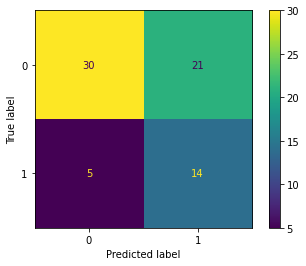

In [29]:
# Asssess the accuracy of your model and explain your key findings
# Generate confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f} %".format(score*100))
print("Weighted ROC AUC accuracy: {:.2f} %".format(roc_auc_score(y_test, y_pred, average='weighted')*100))
print("Confusion matrix:")
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

# Apply k-fold Cross Validation
# from sklearn.model_selection import cross_val_score
# from numpy import ravel
# accuracies = cross_val_score(estimator = classifier, X = x_train_processed, y = ravel(y_train.values), scoring = 'roc_auc_ovo', cv = 10)
# print("K-fold cross validation results")
# print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
# print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Visualise the loss and accuracy for each epoch

In [30]:
# list all data in history
print(my_model.model.history.keys())
# summarize history for accuracy
plt.plot(my_model.model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

AttributeError: ignored

In [ ]:
# summarize history for loss
plt.plot(my_model.model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model is approx 65-70% accurate at predicting whether cancer recurrence will occur.**

**Crucially, the proportion of False Negatives is low (<15%). In cancer diagnosis these are the outcomes that we want to minimise. False Positives, whilst undesirable, will likely lead to further diagnostic testing before it is realised that cancer is not present.**

### Unit tests:

###Checking training and test data for null values. This will work for both pd dataframes and np arrays, and ensures no null values exist.

In [ ]:
def test_no_nulls(data):
    """ Assert no null values within pd dataframe or np array """
    
    # if data is numpy array, handle accordingly
    if isinstance(data, (np.ndarray)):
        assert not np.isnan(np.min(data))
    
    # if not np array, assume data is pandas dataframe
    else:
        assert data.isna().sum().sum() == 0

In [ ]:
# run null data unit test on both training and test data
test_no_nulls(x_train_processed)
test_no_nulls(x_test_processed)